In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import warnings as wa
wa.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statsmodels.api as sm
import scipy.stats as ss

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# data import

In [3]:
base = pd.read_csv('LA_Unclean.csv')

In [4]:
df = base.copy(deep = True)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20211205213202,2021-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20211205213202,2021-12-06,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,4.97,5.00,4.85,NaN,t,3,0,3,0,0.69
2,2732,https://www.airbnb.com/rooms/2732,20211205213202,2021-12-06,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.70,4.90,4.40,228269,f,2,1,1,0,0.35
3,2864,https://www.airbnb.com/rooms/2864,20211205213202,2021-12-06,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,3021,https://www.airbnb.com/rooms/3021,20211205213202,2021-12-07,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,https://www.airbnb.com/users/show/3415,...,4.30,4.64,4.00,NaN,f,4,1,3,0,0.23


In [5]:
df.describe(include=np.number).transpose()

# Bathrooms and calendar_updated has 100% null values
# Most numerical variables are skewed.

,count,mean,std,min,25%,50%,75%,max
id,33329.00,32816922.06,16506422.09,109.00,19412438.00,35999702.00,48352400.00,53686384.00
scrape_id,33329.00,20211205213194.32,7.68,20211205213202.00,20211205213202.00,20211205213202.00,20211205213202.00,20211205213202.00
host_id,33329.00,124395381.19,127501467.95,521.00,18096454.00,74329020.00,203316558.00,434582860.00
host_listings_count,33322.00,48.74,268.37,0.00,1.00,2.00,7.00,3382.00
host_total_listings_count,33322.00,48.74,268.37,0.00,1.00,2.00,7.00,3382.00
latitude,33329.00,34.05,0.13,33.34,34.00,34.06,34.11,34.81
longitude,33329.00,-118.32,0.17,-118.93,-118.42,-118.35,-118.25,-117.65
accommodates,33329.00,3.67,2.58,0.00,2.00,3.00,5.00,16.00
bathrooms,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,29584.00,1.69,1.11,1.00,1.00,1.00,2.00,15.00


In [6]:
df.describe(include=object).transpose()

# listing_url, name, description, picture_url,host_url, host_name, host_since, host_location, host_about, host_thumbnail_url
# host_picture_url, amenities, first_review, last_review, license
# has to many unique values to have any impact on the model

# host_response_rate, host_acceptance_rate and price are all numerical values but is present as categorical. Hence we can treat them first.

,count,unique,top,freq
listing_url,33329,33329,https://www.airbnb.com/rooms/50788748,1
last_scraped,33329,4,2021-12-07,17923
name,33327,31996,Comfortable place to call home | 2 BR in Los A...,57
description,32231,29770,<b>License number</b><br />Exempt - This listi...,91
neighborhood_overview,20108,16805,The neighborhood of Sherman Oaks is a very aff...,235
picture_url,33329,31734,https://a0.muscache.com/pictures/f0a30f76-6e7e...,43
host_url,33329,18475,https://www.airbnb.com/users/show/107434423,375
host_name,33322,7085,Blueground,375
host_since,33322,3978,2016-12-16,387
host_location,33246,1054,"Los Angeles, California, United States",13919


In [7]:
# Remove special symbol from Price column and convert to numeric dtype

df['price']=df['price'].str.replace('$','').str.replace(',','').astype(float)

In [8]:
# Remove special symbol from host response rate & host acceptance rate column and convert to numeric dtype

df['host_response_rate']=df['host_response_rate'].str.replace('%','').str.replace(',','').astype(float)

df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('%','').str.replace(',','').astype(float)

In [9]:
# Droping columns with 100% nulL values

df=df.drop(['calendar_updated','bathrooms'],axis=1)

In [10]:
# Removing irrelevant columns:

df=df.drop([ 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview','picture_url',
 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'neighbourhood', 'neighbourhood_cleansed',
 'property_type', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'host_identity_verified'],axis=1)

In [11]:
df.shape

(33329, 44)

In [12]:
# list of columns

In [13]:
df.columns.tolist()

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',


In [14]:
# Data Pre_processing

In [15]:
# Treating Null values

In [16]:
df.isnull().sum()[df.isnull().sum()  > 0 ]

host_response_time             10862
host_response_rate             10862
host_acceptance_rate           10323
host_is_superhost                  7
host_total_listings_count          7
bathrooms_text                    62
bedrooms                        3745
beds                            1810
minimum_minimum_nights             4
maximum_minimum_nights             4
minimum_maximum_nights             4
maximum_maximum_nights             4
minimum_nights_avg_ntm             4
maximum_nights_avg_ntm             4
review_scores_rating            8010
review_scores_accuracy          8338
review_scores_cleanliness       8337
review_scores_checkin           8346
review_scores_communication     8338
review_scores_location          8349
review_scores_value             8351
reviews_per_month               8010
dtype: int64

In [17]:
data=pd.DataFrame({'Dtype':df.dtypes,'Null':np.round(df.isnull().sum()/len(df)*100,2),'Unique':df.nunique()})
data=data[data.Null>0]

In [18]:
data.to_excel('Null.xlsx')

In [136]:
# Categorical Variables

In [137]:
# host_response_time

In [138]:
(df.host_response_time.value_counts() / len(df.host_response_time)) * 100

within an hour       45.96
within a few hours   10.85
within a day          6.88
a few days or more    3.72
Name: host_response_time, dtype: float64

In [139]:
# Proportion Imputation

df['host_response_time'] = df['host_response_time'].fillna(pd.Series(np.random.choice(['within an hour','within a few hours', 'within a day', 'a few days or more'], p = [0.60,0.30,0.07,0.03], size = len(df))))

In [140]:
# host_is_superhost

df.host_is_superhost.fillna(value = df.host_is_superhost.mode()[0], inplace = True)

In [141]:
# bathrooms_text

df.bathrooms_text.fillna(value = df.bathrooms_text.mode()[0], inplace = True)

In [142]:
# Numerical Variable

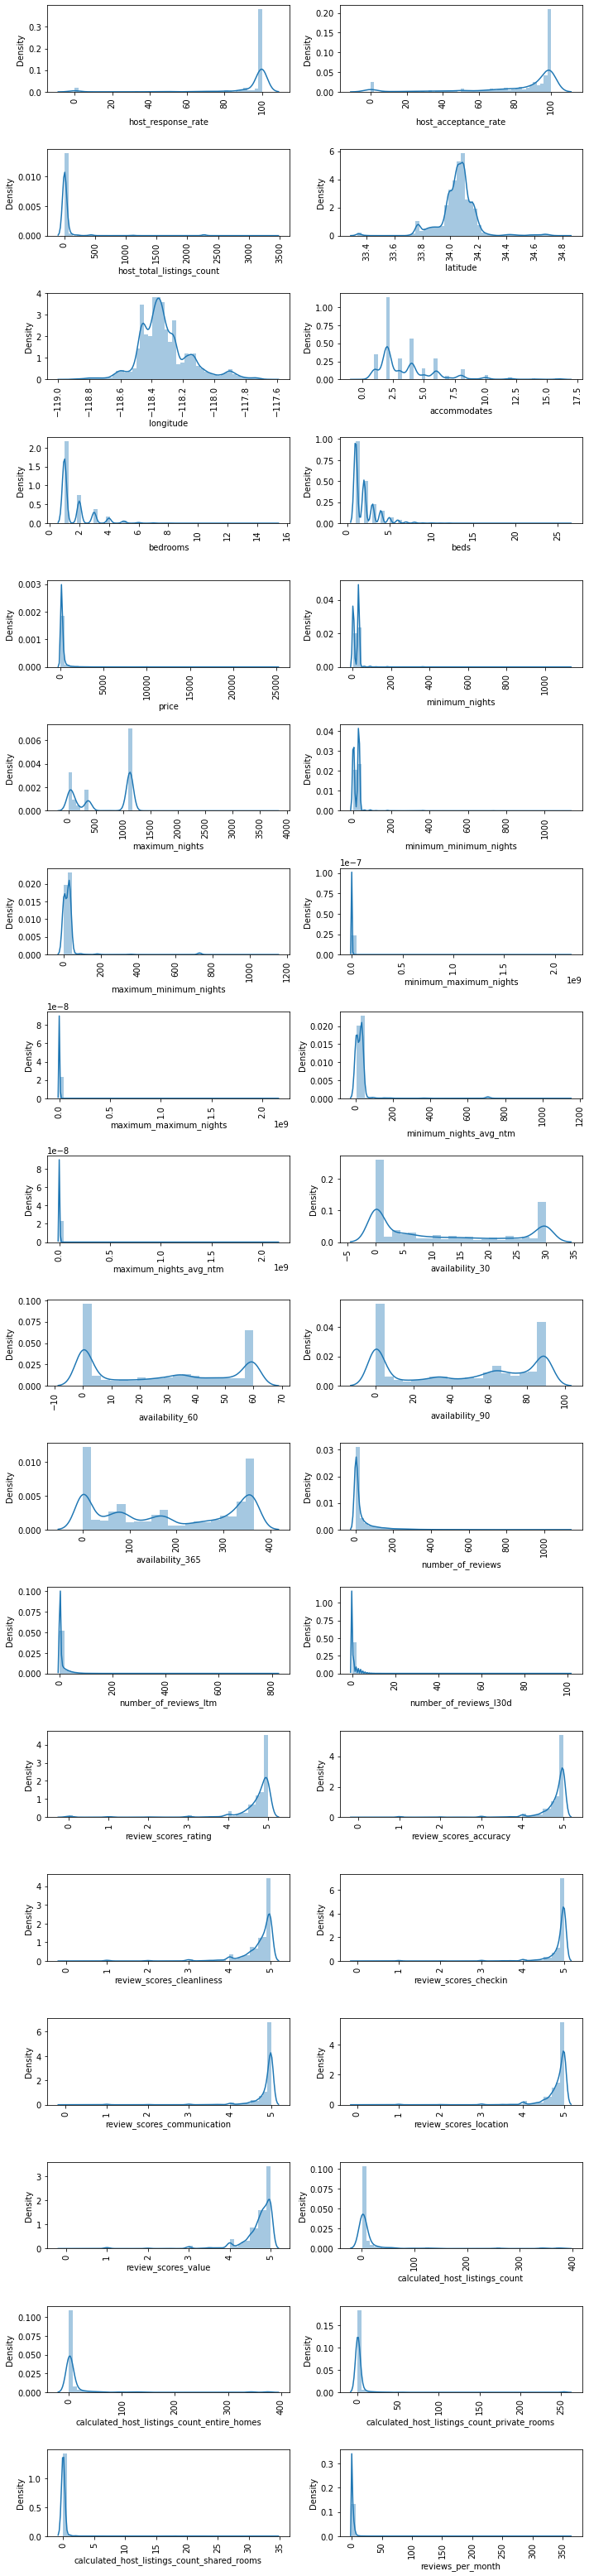

In [143]:
count=1
plt.figure(figsize=(10,50))
for i in df.select_dtypes(np.number):
    plt.subplot(21,2,count)
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout()
    count+=1

In [144]:
# The numerical variables are skewed hence median imputation will have better result.

In [145]:
((df.select_dtypes(np.number).isnull().sum()[df.select_dtypes(np.number).isnull().sum() > 0 ] / len(df) ) * 100)[((df.select_dtypes(np.number).isnull().sum()[df.select_dtypes(np.number).isnull().sum() > 0 ] / len(df) ) * 100).values < 10]

host_total_listings_count   0.02
beds                        5.43
minimum_minimum_nights      0.01
maximum_minimum_nights      0.01
minimum_maximum_nights      0.01
maximum_maximum_nights      0.01
minimum_nights_avg_ntm      0.01
maximum_nights_avg_ntm      0.01
dtype: float64

In [146]:
# Imputing variables with less than 5% missing values with median.

In [147]:
df.host_total_listings_count.fillna(value=df.host_total_listings_count.median(), inplace = True)

In [148]:
df.beds.fillna(value = df.beds.median(), inplace = True)

In [149]:
df.minimum_minimum_nights.fillna(value = df.minimum_maximum_nights.median(), inplace = True)

In [150]:
df.maximum_minimum_nights.fillna(value = df.maximum_minimum_nights.median(), inplace = True)

In [151]:
df.minimum_maximum_nights.fillna(value = df.minimum_maximum_nights.median(), inplace = True)

In [152]:
df.minimum_nights_avg_ntm.fillna(value = df.minimum_nights_avg_ntm.median(), inplace = True)

In [153]:
df.maximum_nights_avg_ntm.fillna(value = df.maximum_nights_avg_ntm.median(), inplace = True)

In [154]:
df.maximum_maximum_nights.fillna(value = df.maximum_maximum_nights.median(), inplace = True)

In [155]:
df.isnull().sum()[df.isnull().sum() > 0]

host_response_rate             10862
host_acceptance_rate           10323
bedrooms                        3745
review_scores_rating            8010
review_scores_accuracy          8338
review_scores_cleanliness       8337
review_scores_checkin           8346
review_scores_communication     8338
review_scores_location          8349
review_scores_value             8351
reviews_per_month               8010
dtype: int64

In [156]:
# Imputing numerical variables with more than 5% missing values with logical imputation

In [157]:
# The host_response_rate and host_acceptance_rate can be imputed with logical imputation using host_response_time

# host_response_rate

df.host_response_rate = df.groupby(by = 'host_response_time')['host_response_rate'].apply(lambda x : x.fillna(x.median()))

In [158]:
# Acceptance_response_rate

df.host_acceptance_rate = df.groupby(by = 'host_response_time')['host_acceptance_rate'].apply(lambda x : x.fillna(x.median()))

In [159]:
# The bedrooms,review_scores_accuracy, review_scores_rating, review_scores_cleanliness,
# review_scores_checkin, review_scores_communication, review_scores_location ,review_scores_value and reviews_per_month 
# can be imputed with logical imputation using room_type

In [160]:
df.bedrooms = df.groupby('room_type')['bedrooms'].apply(lambda x : x.fillna(x.median()))

In [161]:
df.review_scores_accuracy = df.groupby('room_type')['review_scores_accuracy'].apply(lambda x : x.fillna(x.median()))

In [162]:
df.review_scores_rating = df.groupby('room_type')['review_scores_rating'].apply(lambda x : x.fillna(x.median()))

In [163]:
df.review_scores_cleanliness = df.groupby('room_type')['review_scores_cleanliness'].apply(lambda x : x.fillna(x.median()))

In [164]:
df.review_scores_checkin = df.groupby('room_type')['review_scores_checkin'].apply(lambda x : x.fillna(x.median()))

In [165]:
df.review_scores_communication = df.groupby('room_type')['review_scores_communication'].apply(lambda x : x.fillna(x.median()))

In [166]:
df.review_scores_location = df.groupby('room_type')['review_scores_location'].apply(lambda x : x.fillna(x.median()))

In [167]:
df.review_scores_value = df.groupby('room_type')['review_scores_value'].apply(lambda x : x.fillna(x.median()))

In [168]:
df.reviews_per_month = df.groupby('room_type')['reviews_per_month'].apply(lambda x : x.fillna(x.median()))

In [169]:
# Feature Engineering

# Creating 2 new variable from the amenities and bathroom_text columns

In [170]:
# Creating a new variable amenities with the len of the variables present in amenities

df.amenities = df.amenities.apply(lambda x : len(x.split(',')))

#Change datatype to int

df.amenities=df.amenities.astype(int)

In [176]:
# Creating a new variable bathrooms_text with the numerical part from bathrooms_text

df.bathrooms_text.value_counts()

1.00     21615
2.00      5335
1.50      1917
2.50      1381
3.00      1114
3.50       479
4.00       369
4.50       283
5.00       169
5.50       144
0.00       119
6.00        77
0.50        73
8.00        62
6.50        43
7.00        35
11.00       28
7.50        22
8.50        20
10.00       13
9.00        12
11.50        4
10.50        3
12.00        3
9.50         3
12.50        2
13.00        2
15.50        1
25.00        1
Name: bathrooms_text, dtype: int64

In [172]:
for i in range(len(df.bathrooms_text)):
    df.bathrooms_text[i] = df.bathrooms_text[i].split()[0]

In [173]:
df.bathrooms_text.replace(to_replace=['Half-bath','Shared','Private'], value = '0.5' , inplace=True )

# Changing datatype to float

df.bathrooms_text = df.bathrooms_text.astype(float)

In [174]:
df.shape

(33329, 44)

In [177]:
df.isnull().sum()

host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0


### Checking for Outliers

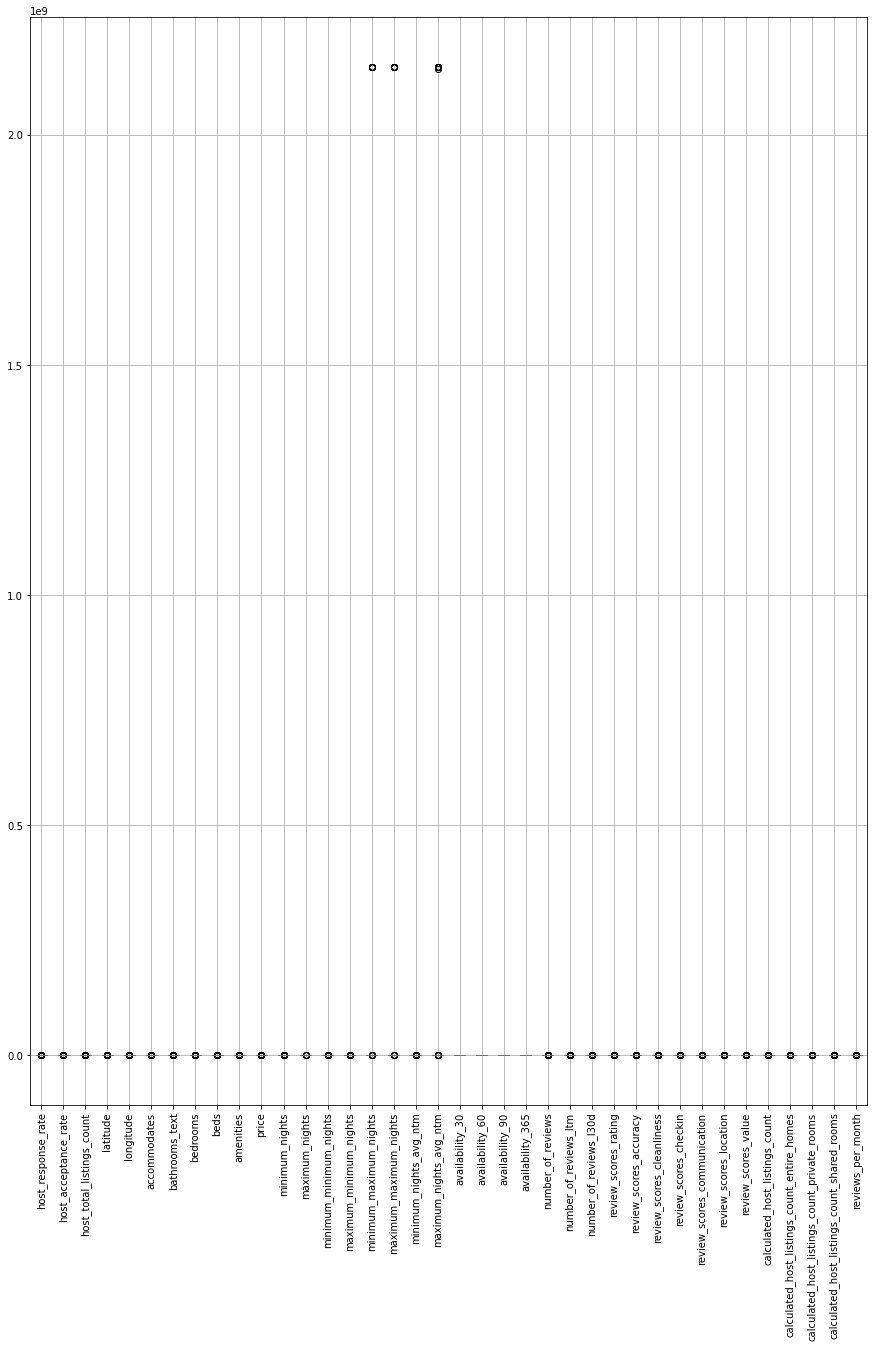

In [455]:
plt.figure(figsize=(15,20))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

From the above boxplot we can clearly see that there are outliers in the all most all the columns.
For the moment we will not treat the outliers, we can see the impact of outliers have on the model and chose a better method to treat them.

In [175]:
# Saving a copy of dataset

df.to_csv('LA_Clean.csv',index=False)

## Exploratory Data Analysis

### Univariate analysis

#### Categorical variable

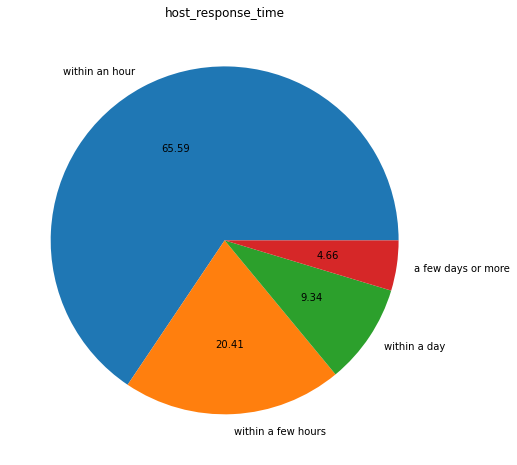

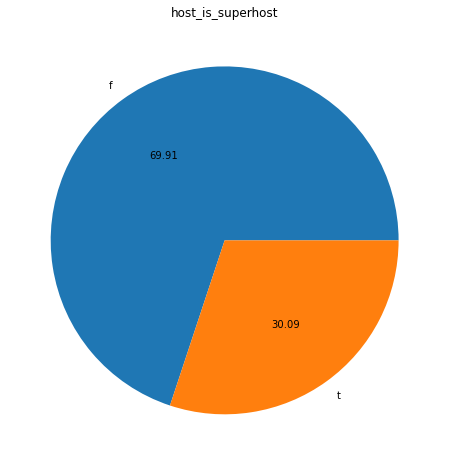

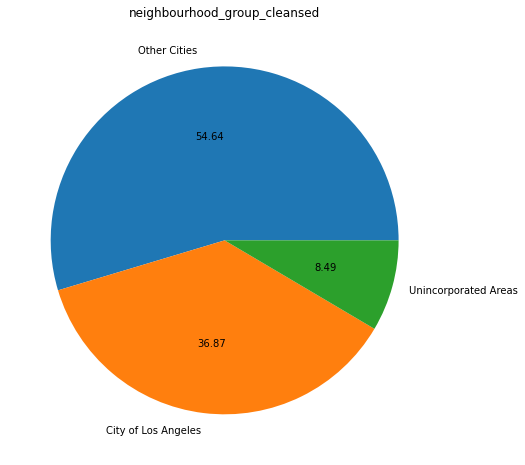

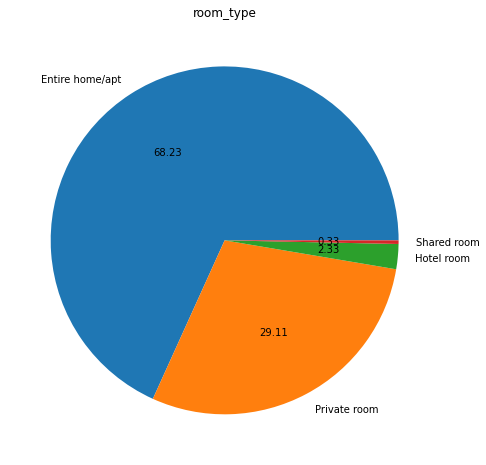

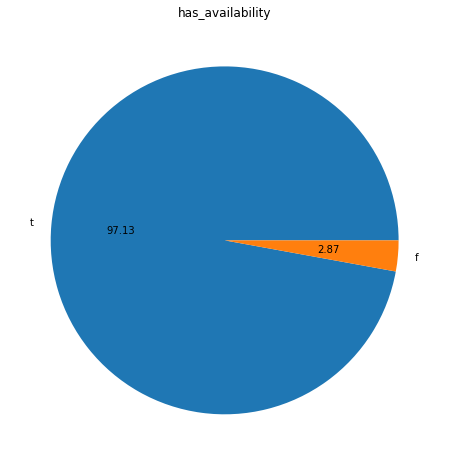

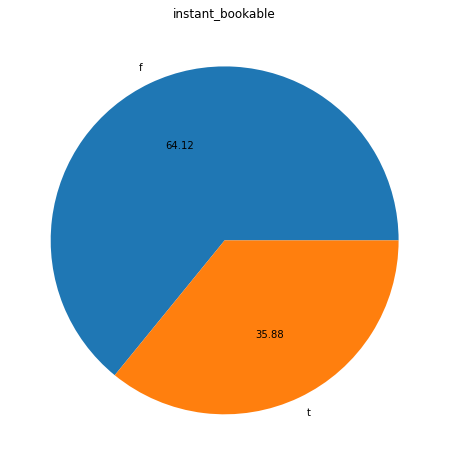

In [178]:
for i in df.select_dtypes(include=object):
    plt.figure(figsize=(10,8))
    plt.pie(x=df[i].value_counts(),labels=df[i].unique(),autopct='%.2f')
    plt.title(i)
    plt.show()

#### Numerical variable

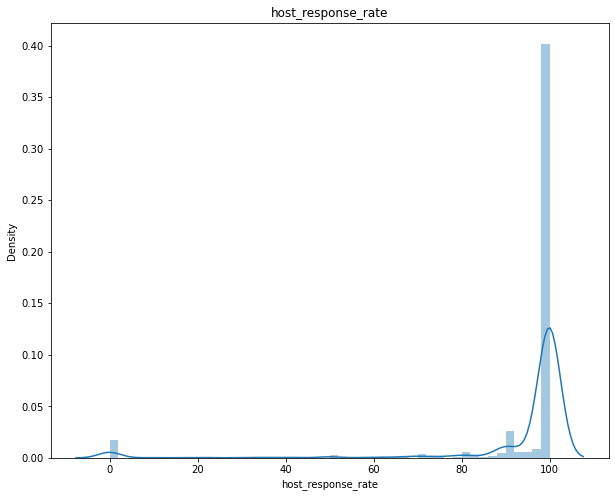

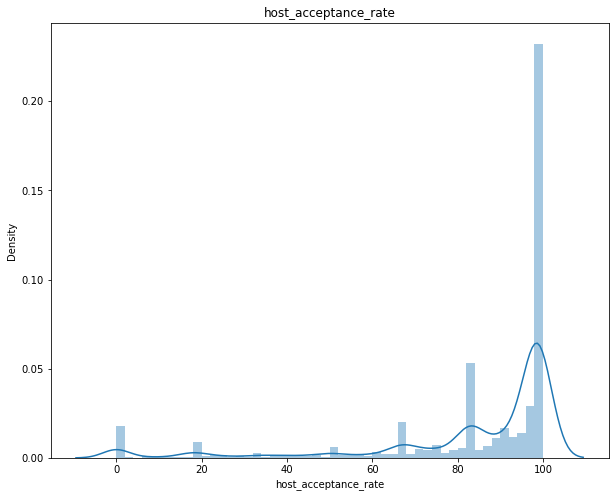

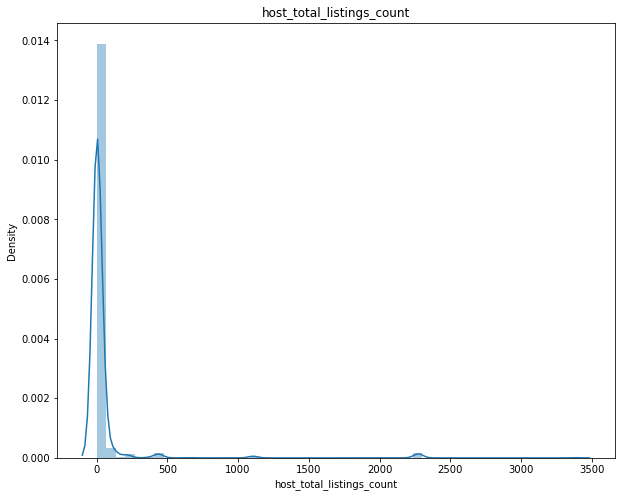

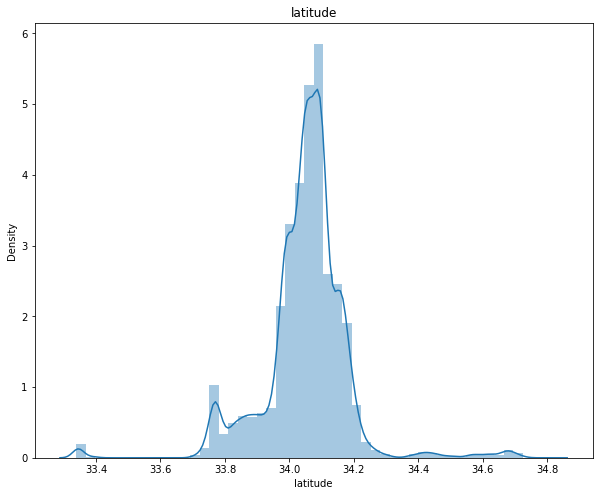

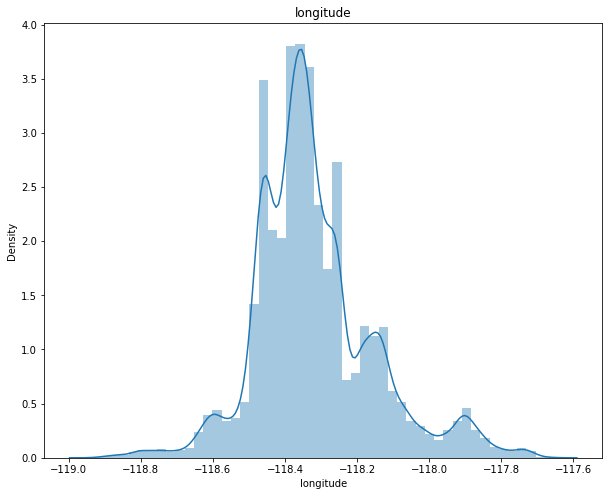

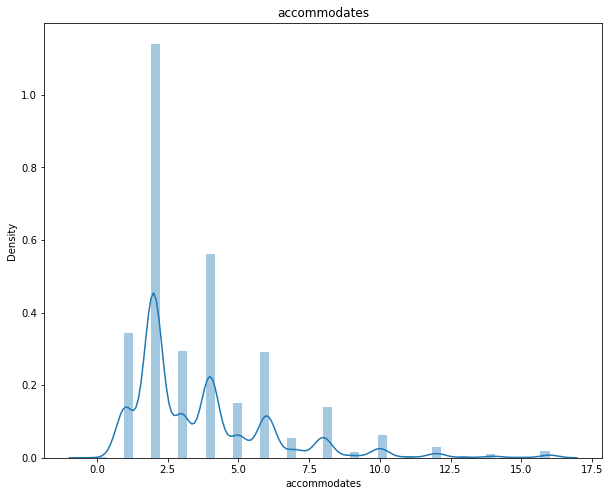

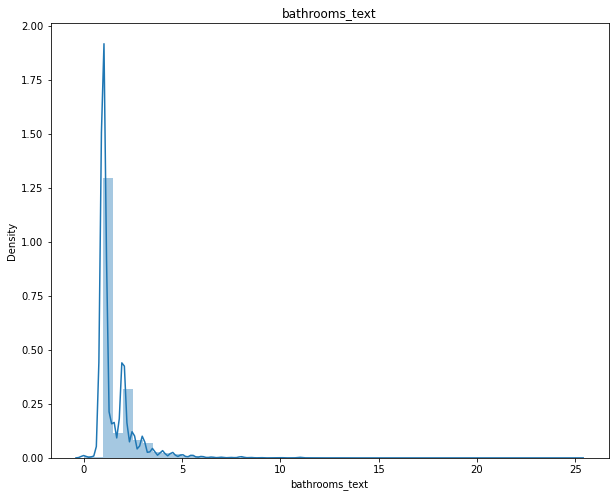

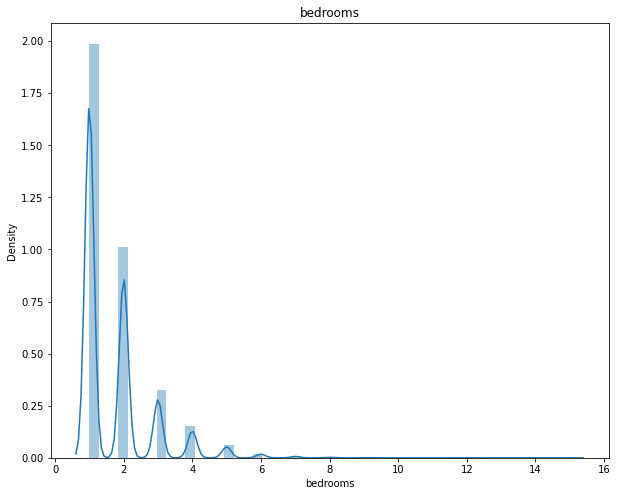

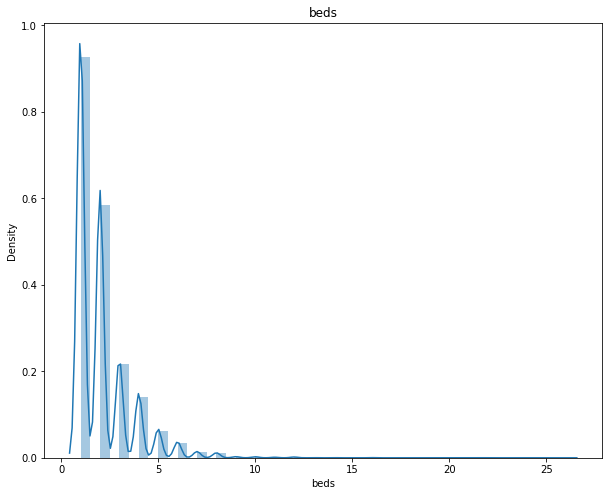

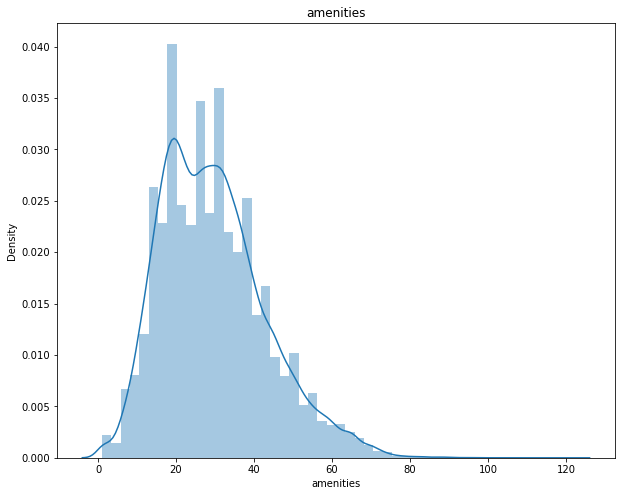

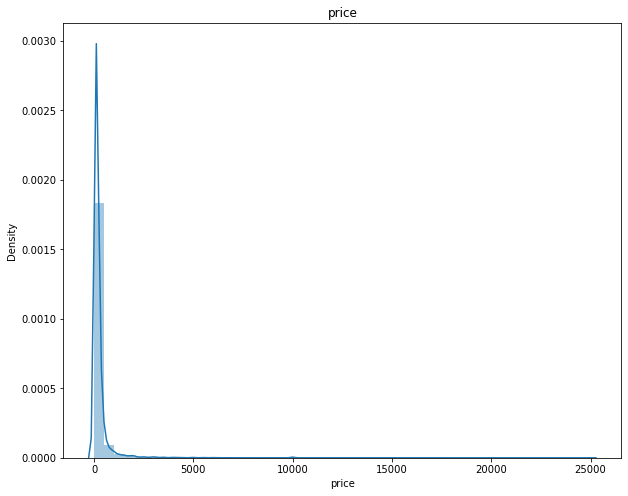

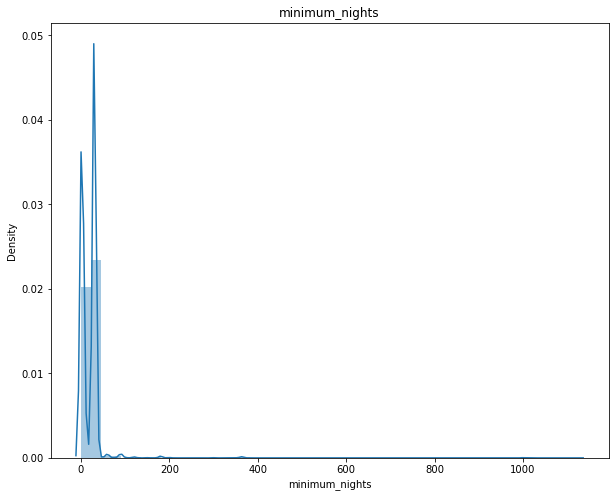

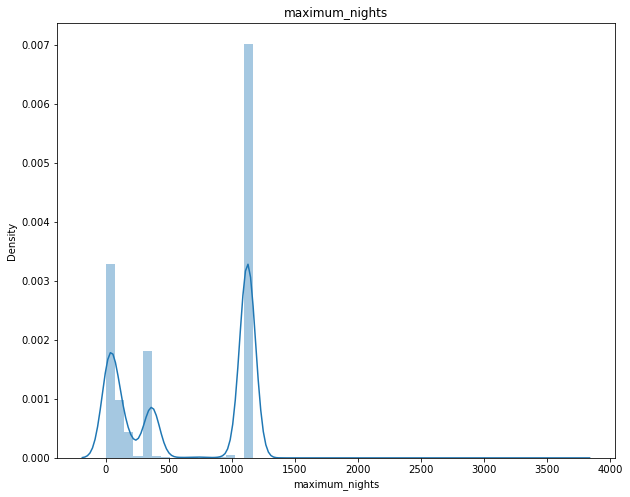

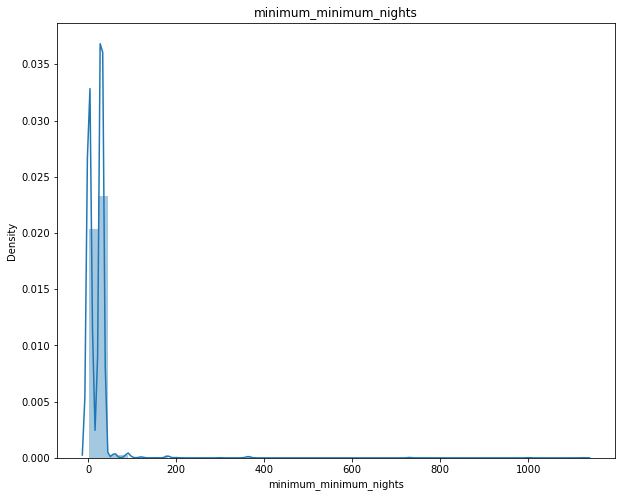

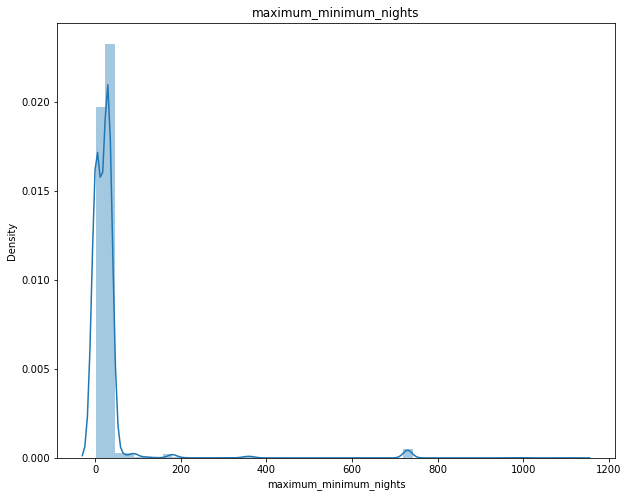

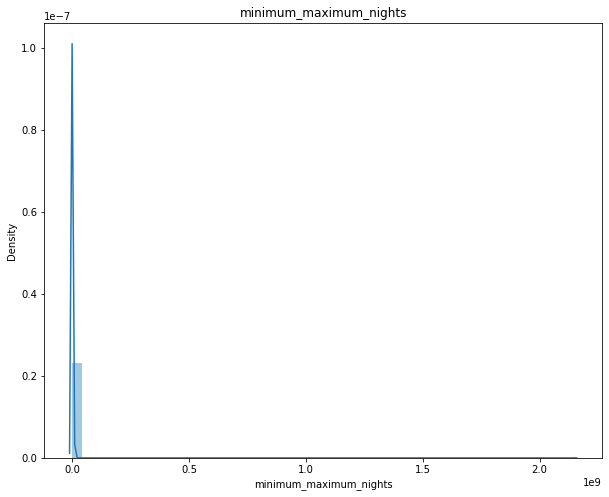

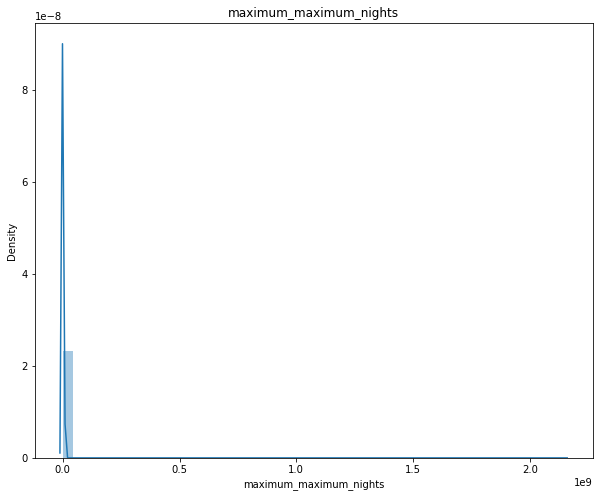

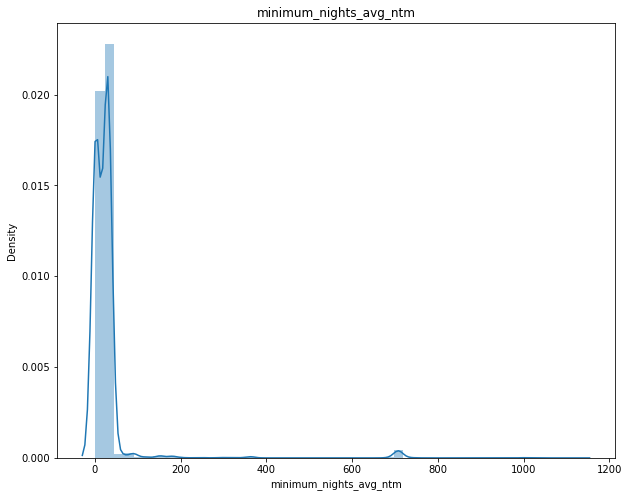

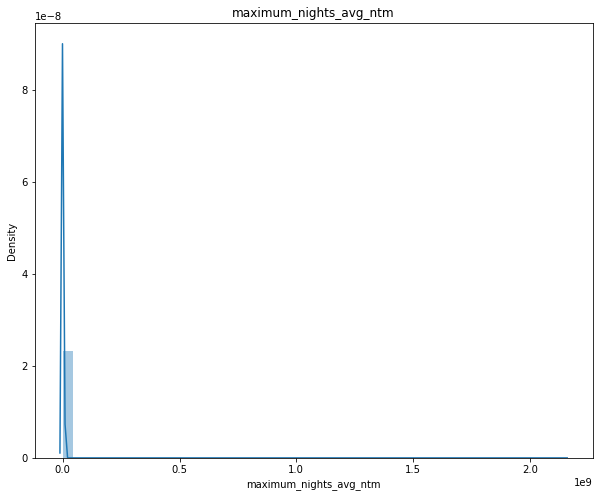

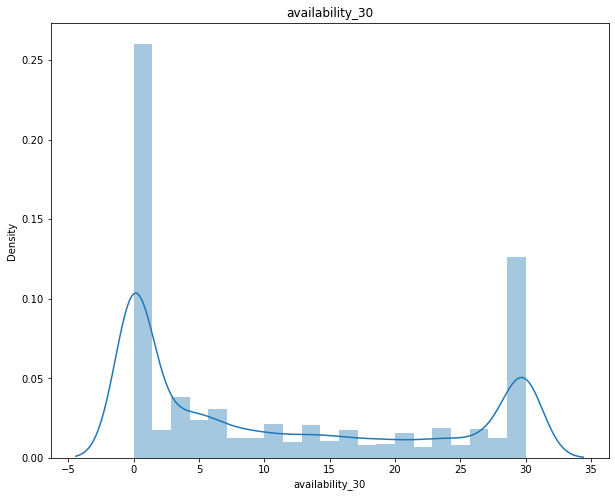

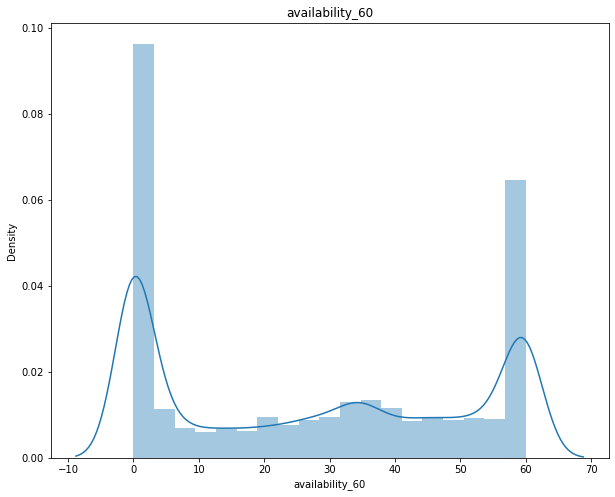

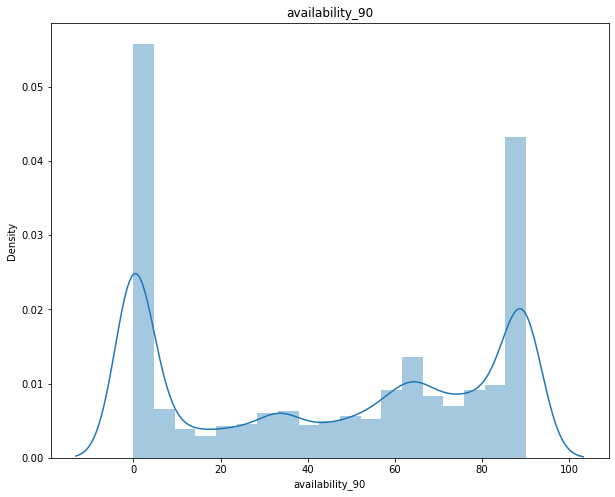

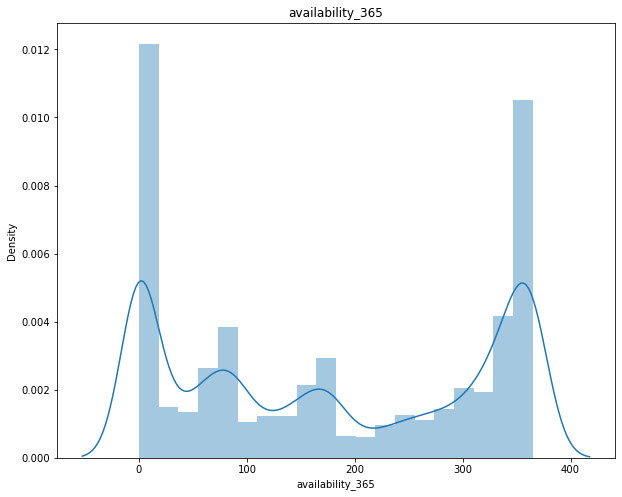

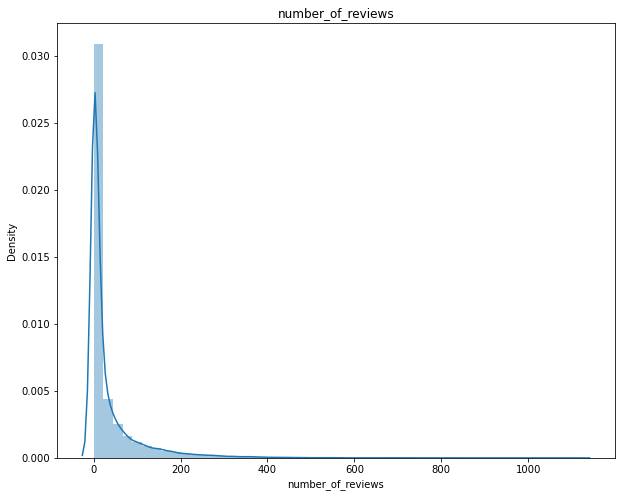

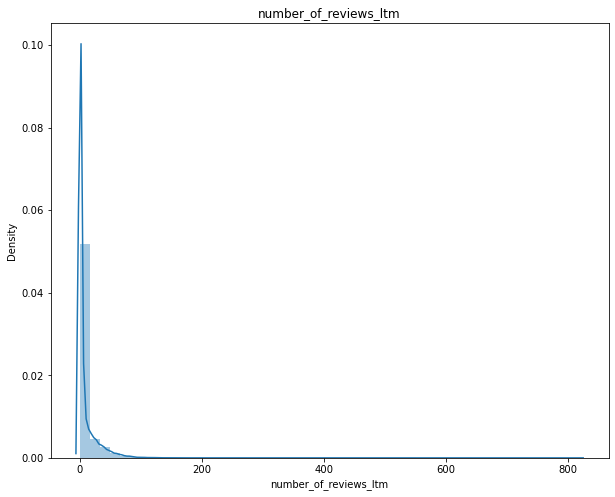

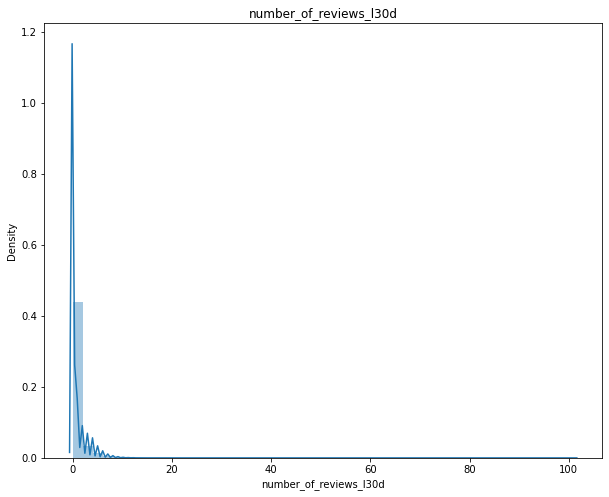

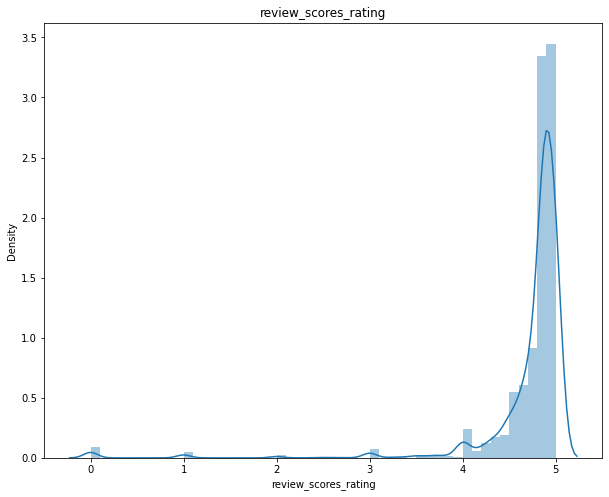

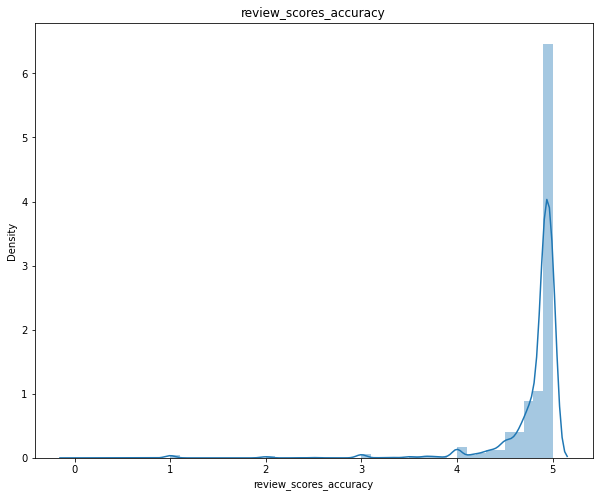

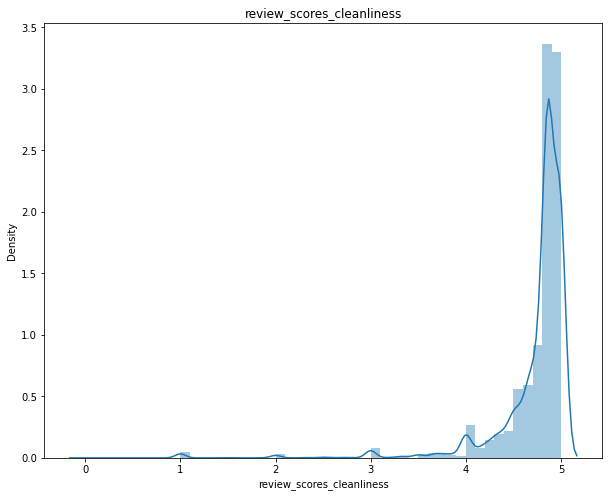

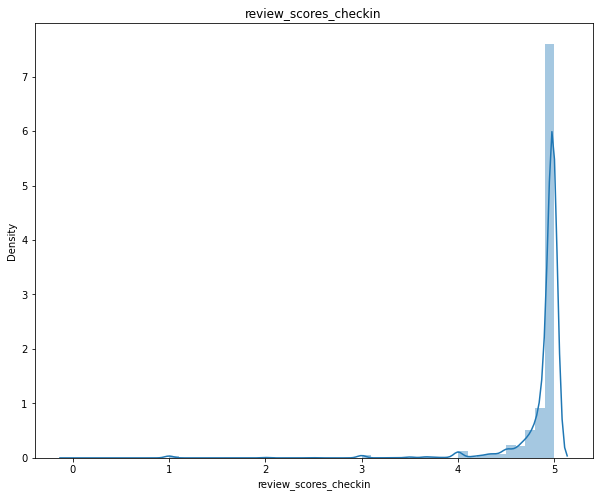

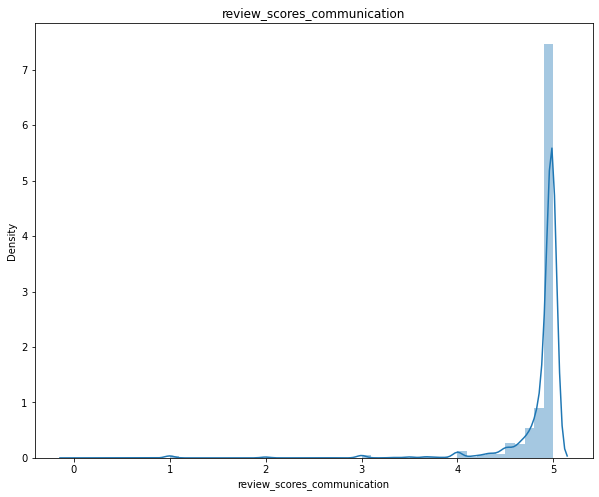

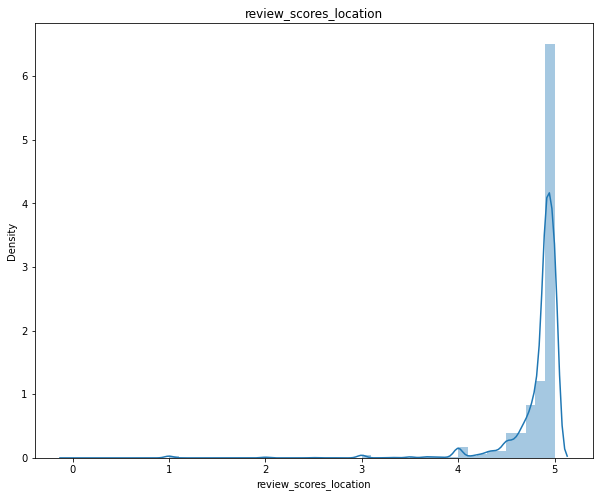

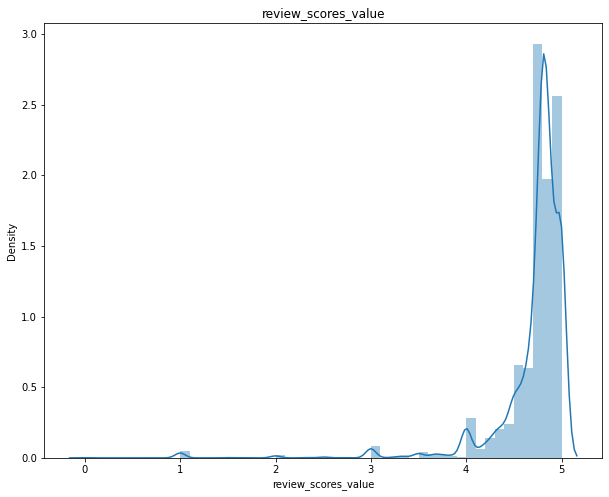

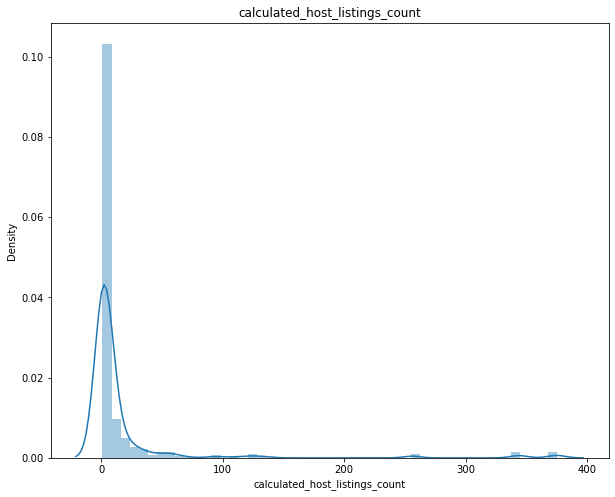

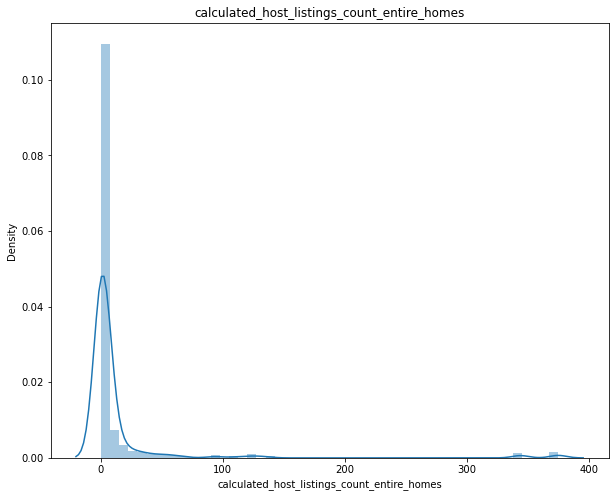

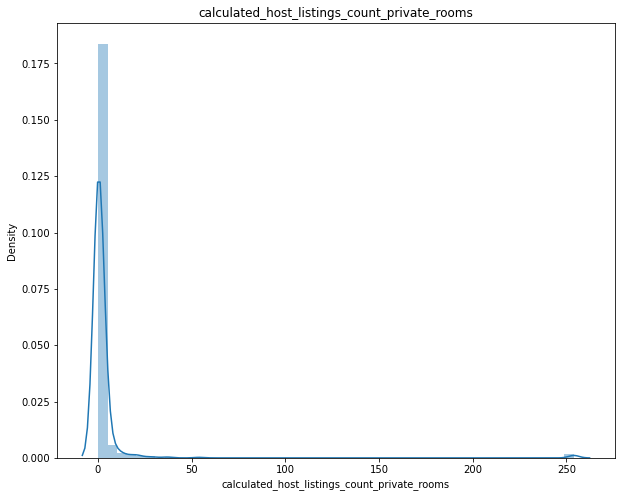

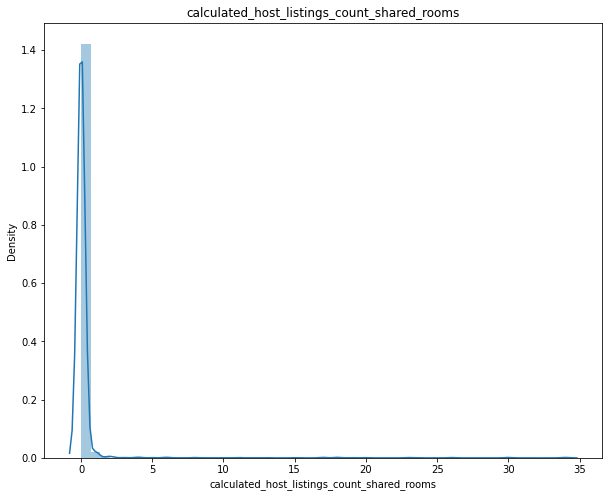

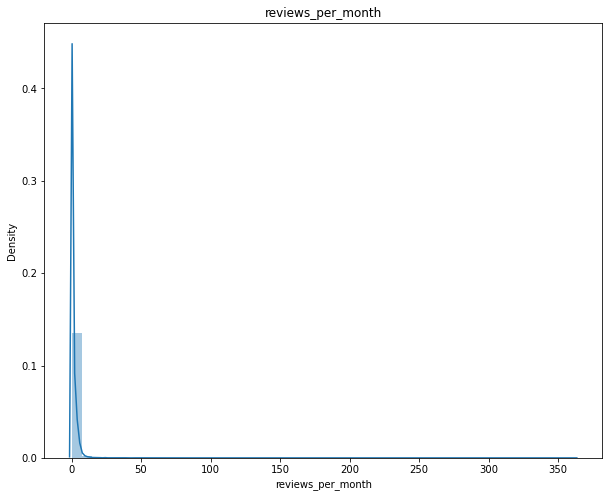

In [179]:
# Distribution of numerical variables

for i in df.select_dtypes(np.number).columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()

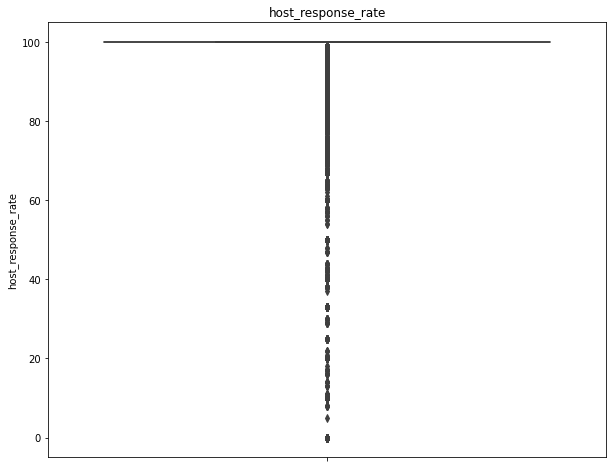

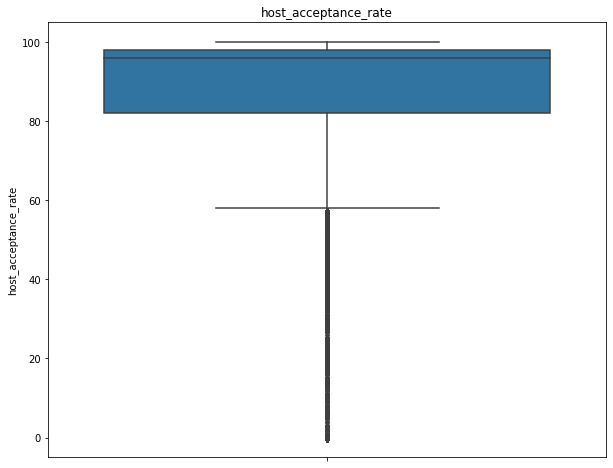

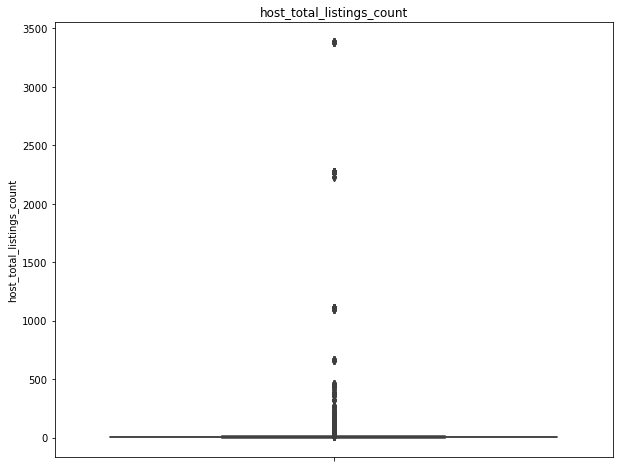

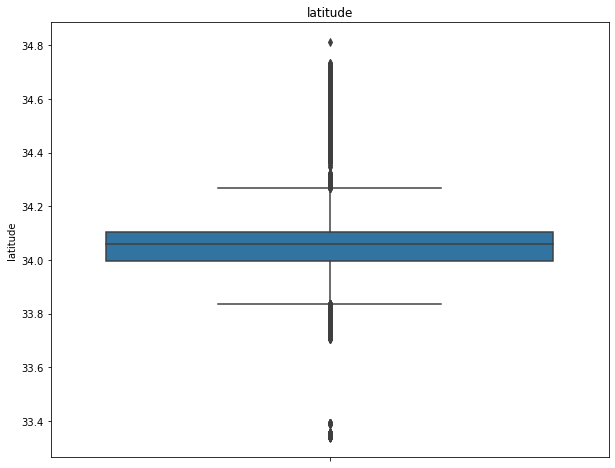

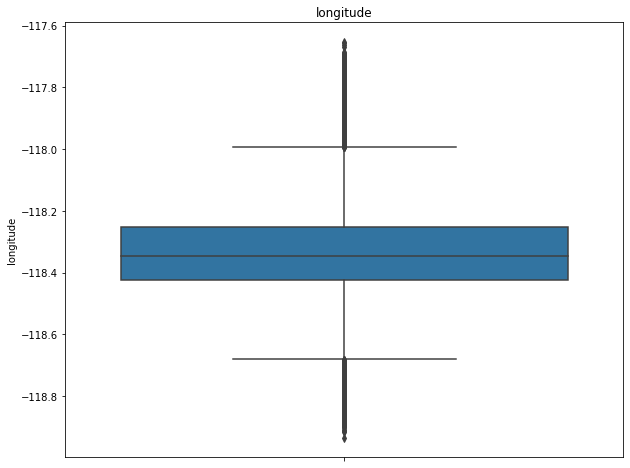

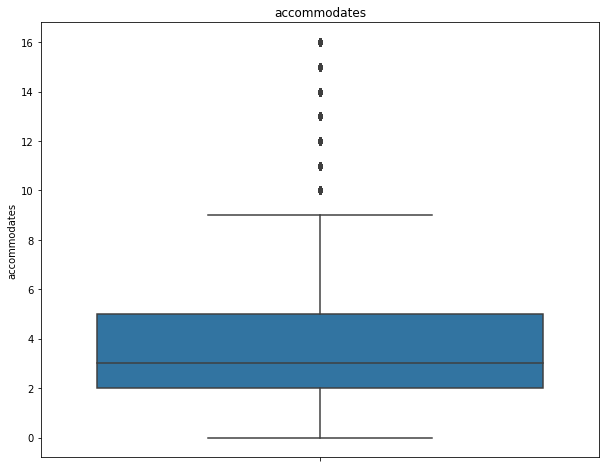

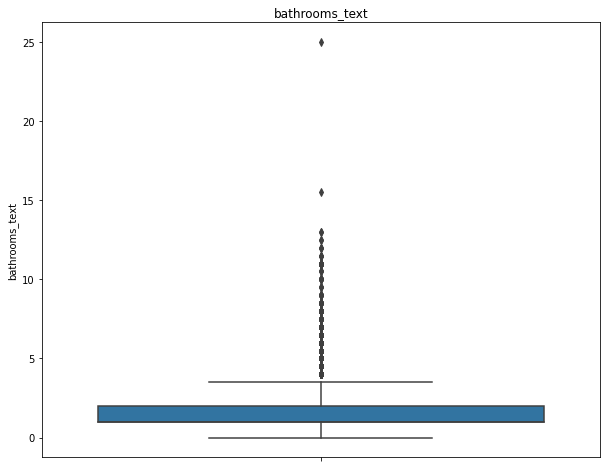

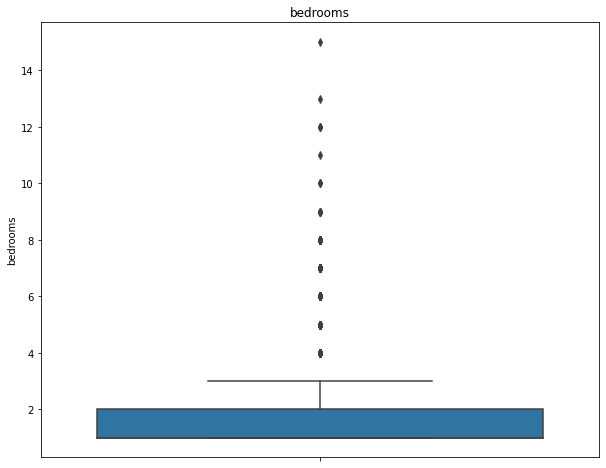

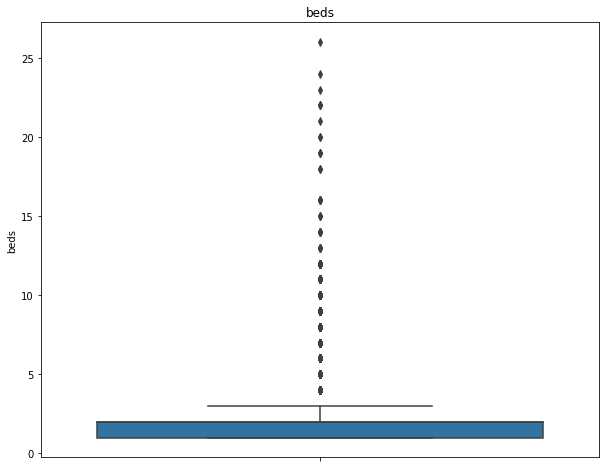

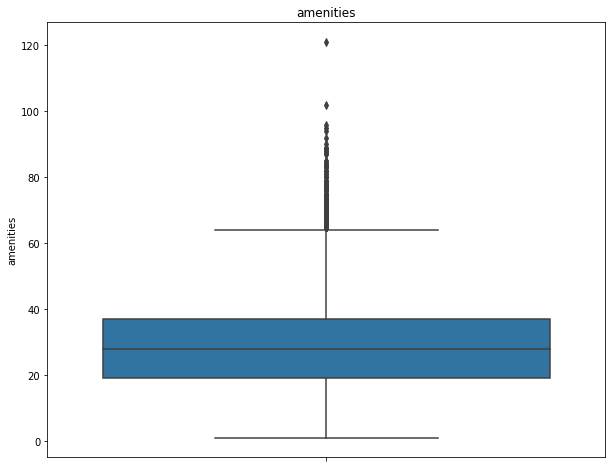

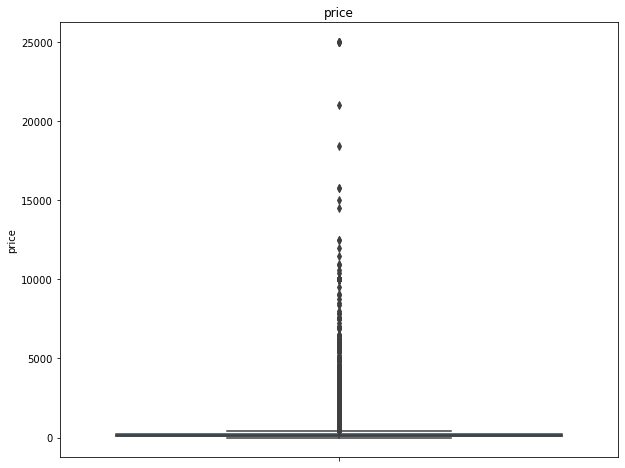

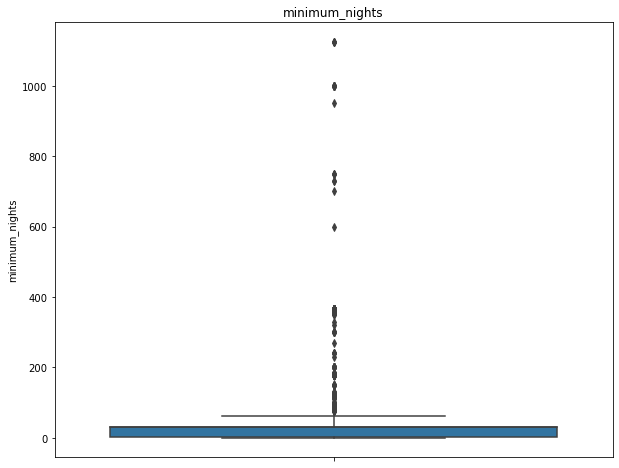

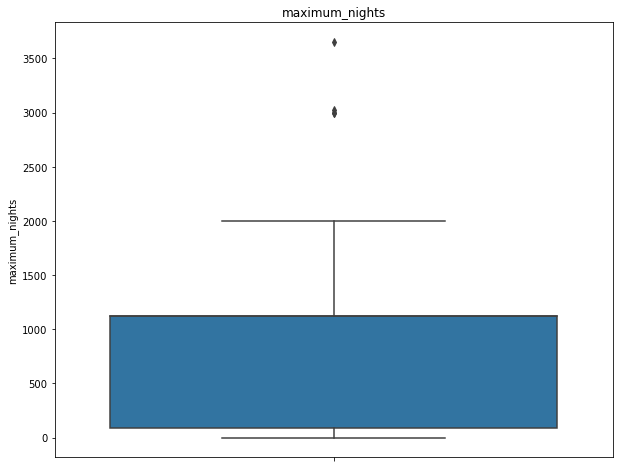

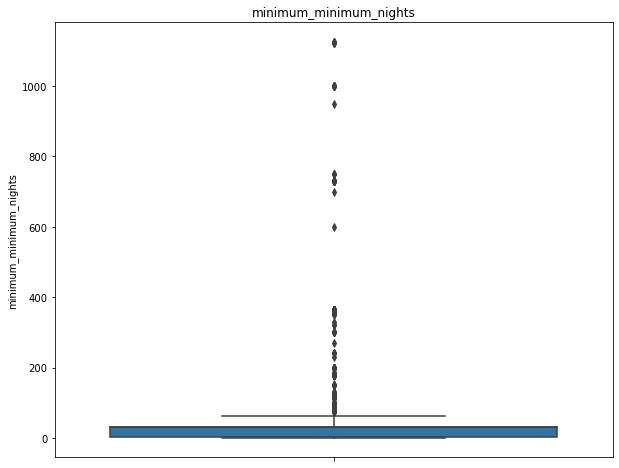

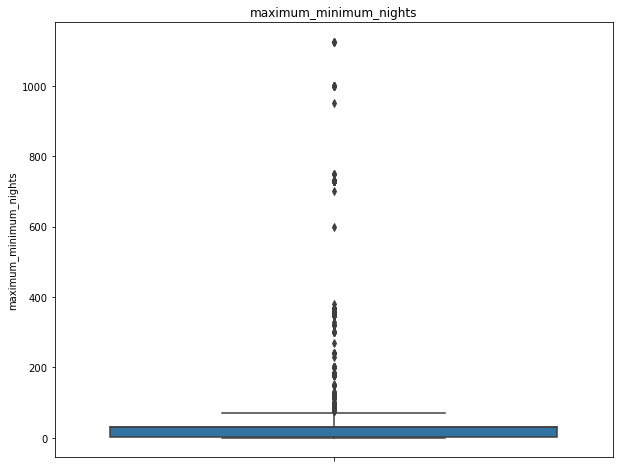

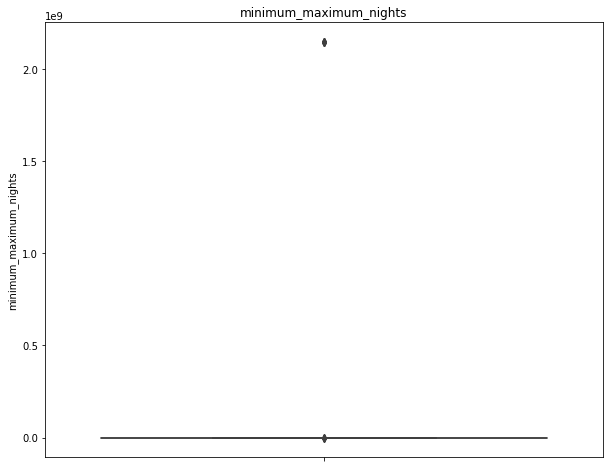

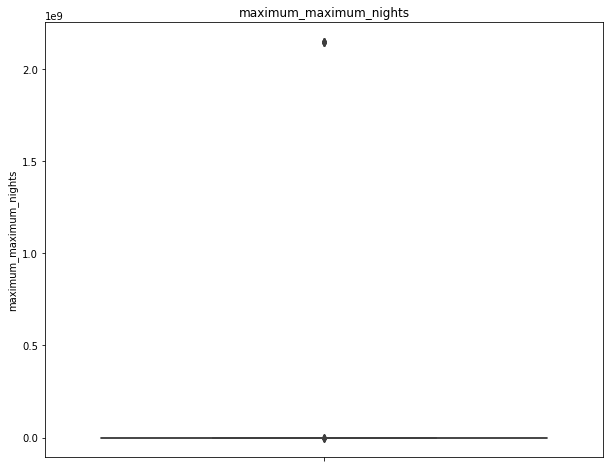

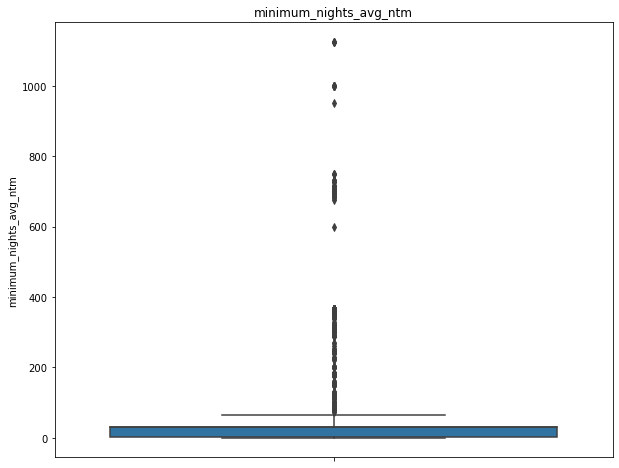

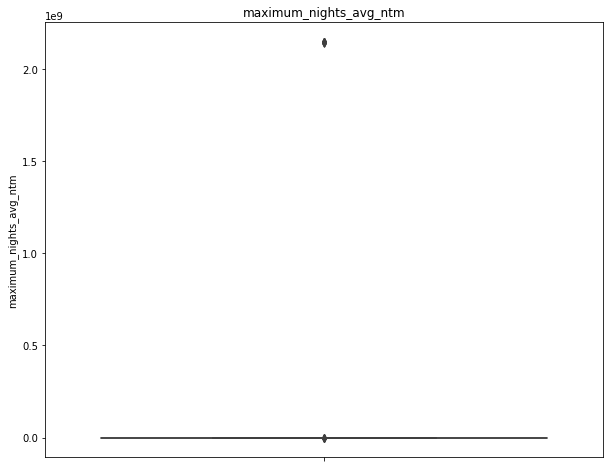

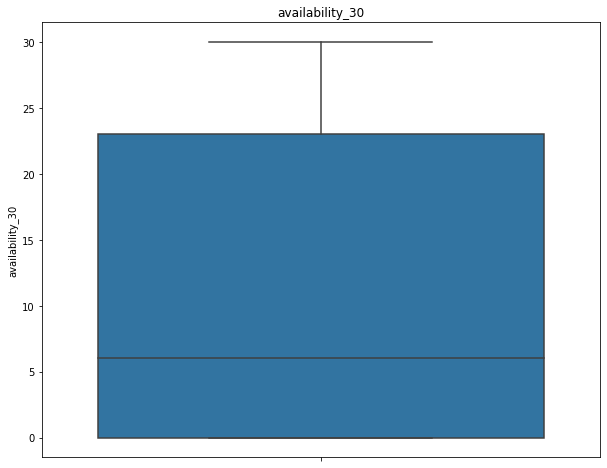

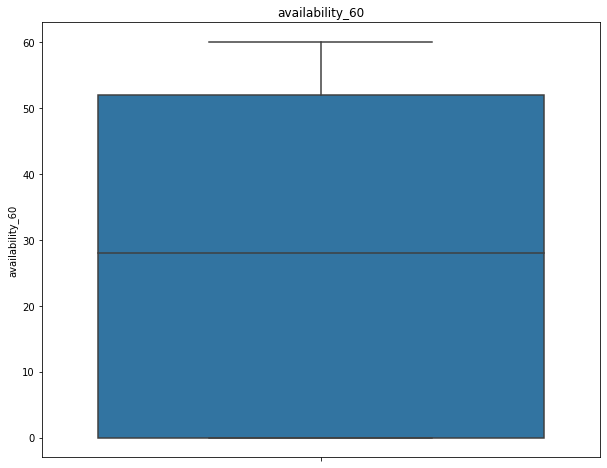

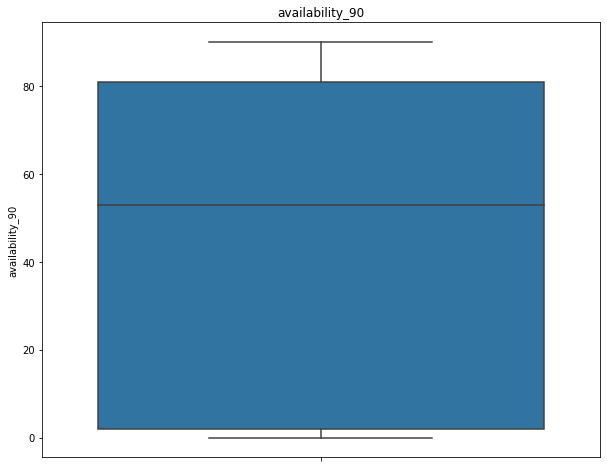

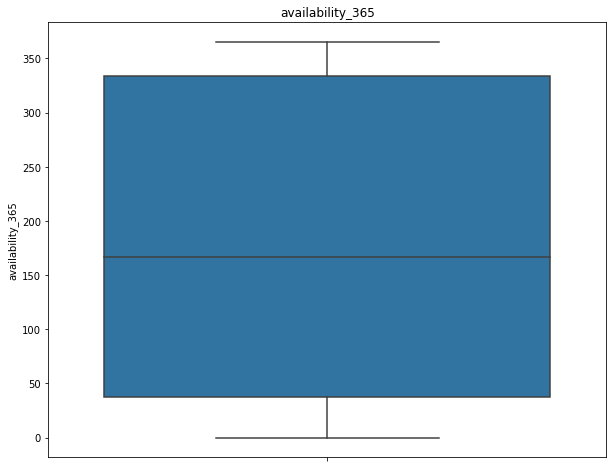

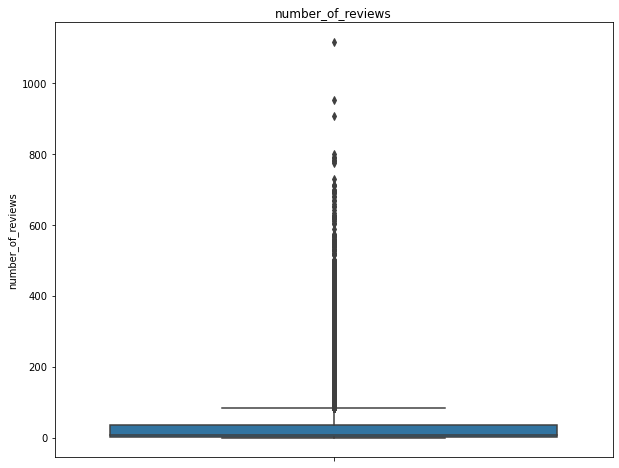

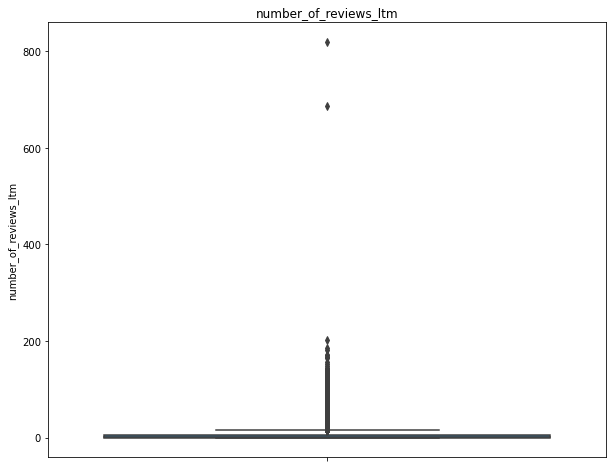

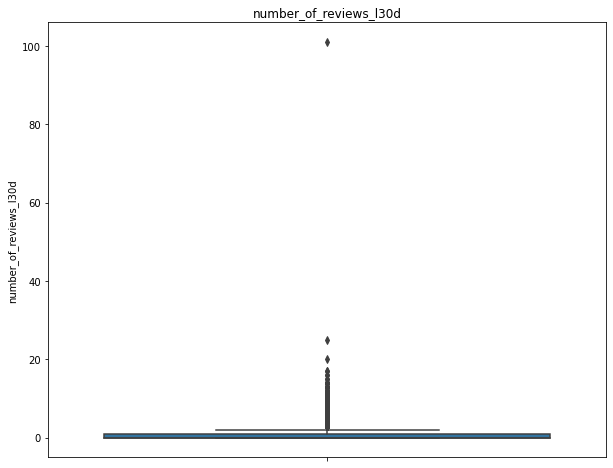

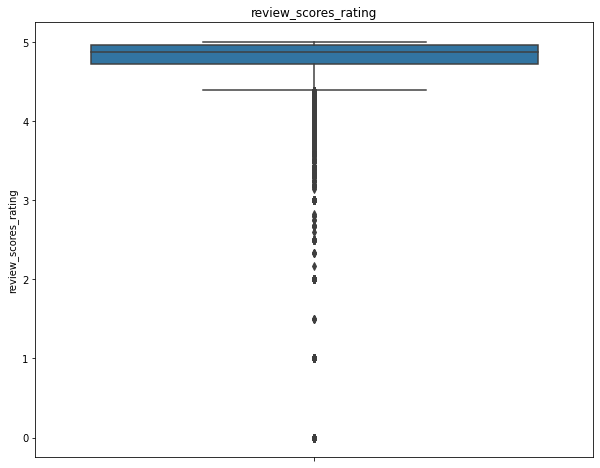

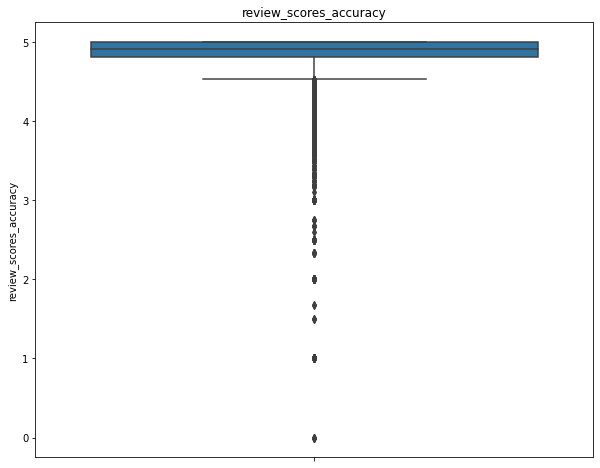

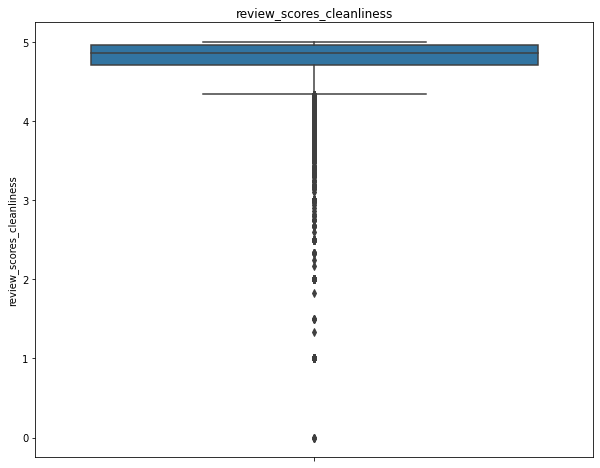

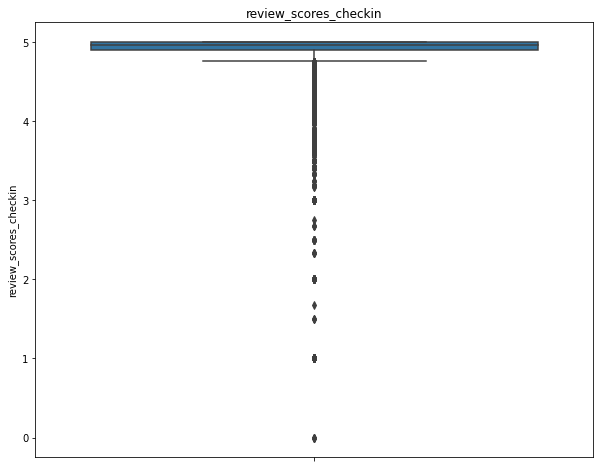

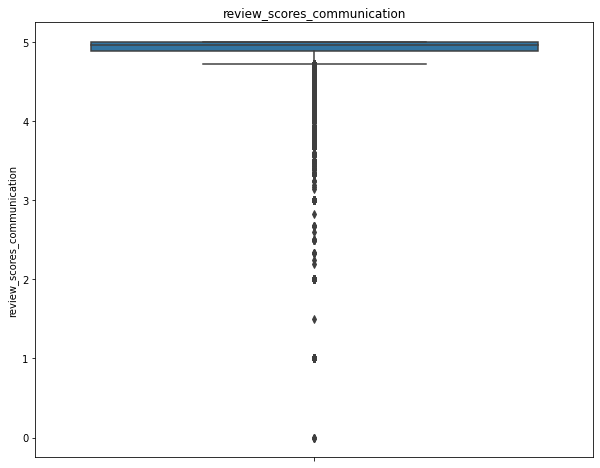

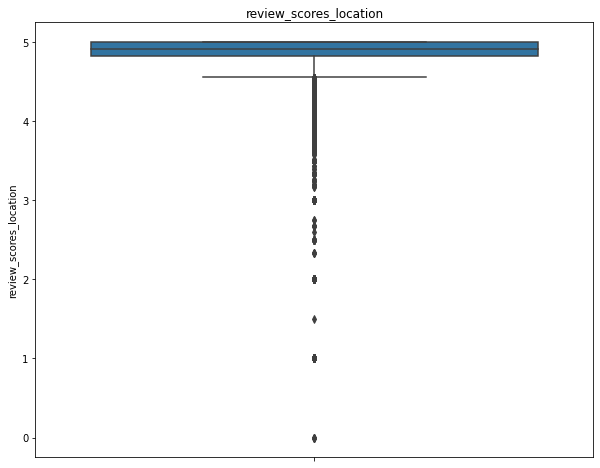

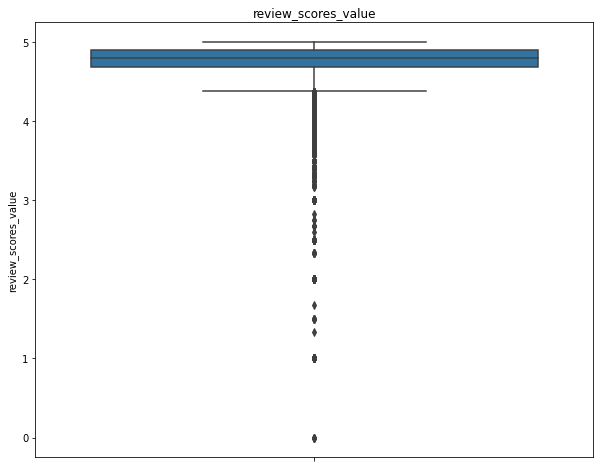

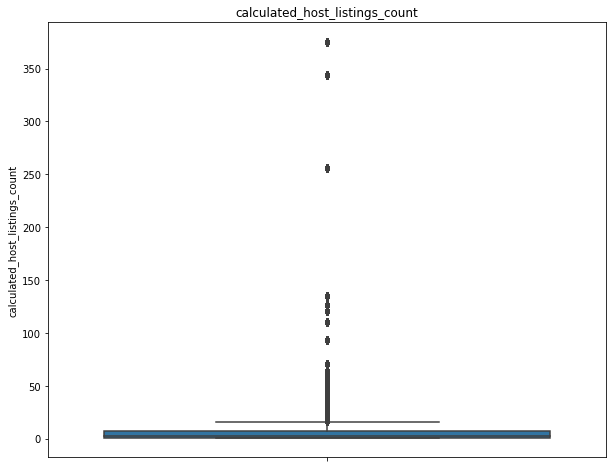

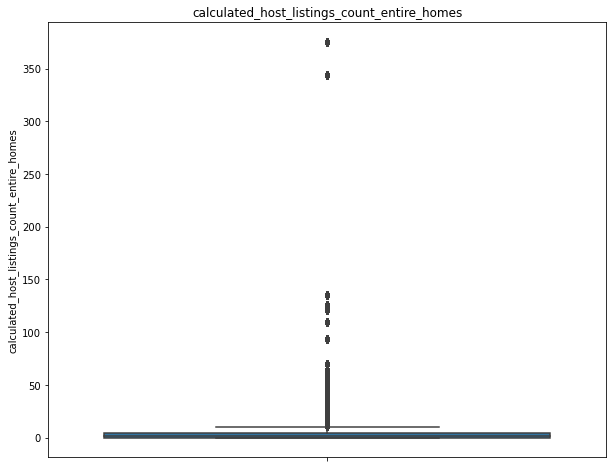

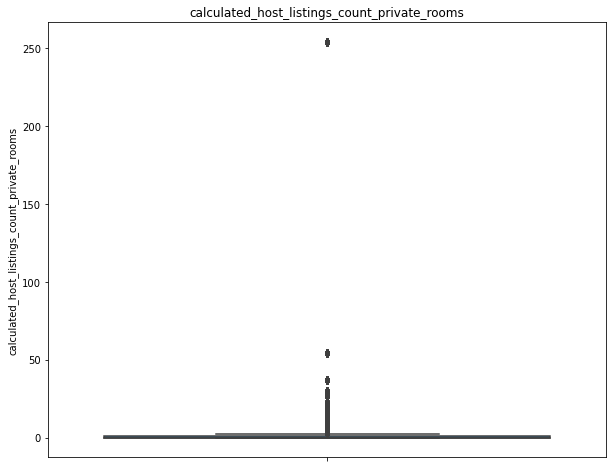

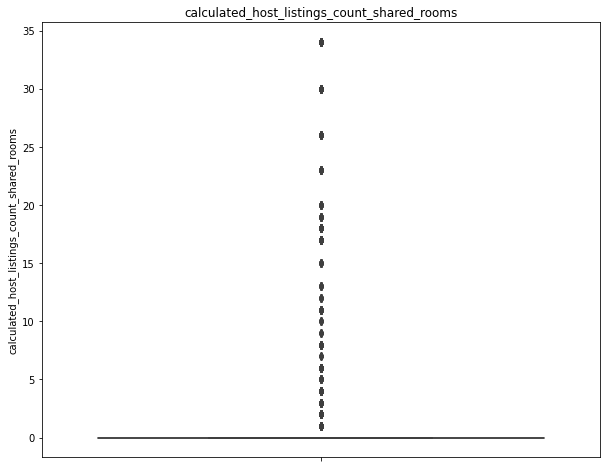

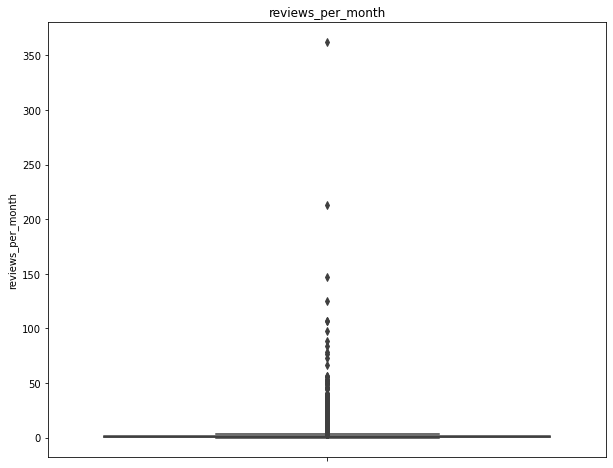

In [181]:
# Box Plot

for i in df.select_dtypes(np.number).columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

### Bivariate analysis

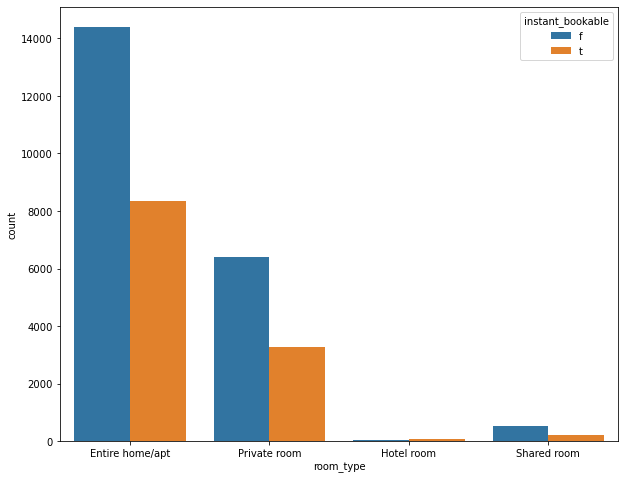

In [183]:
# Room_type vs instant_bookable

plt.figure(figsize=(10,8))
sns.countplot(x=df.room_type,hue=df.instant_bookable)
plt.show()

In [ ]:
# We can see that the majority of the business is done in the Entire home/apt session and Private rooms

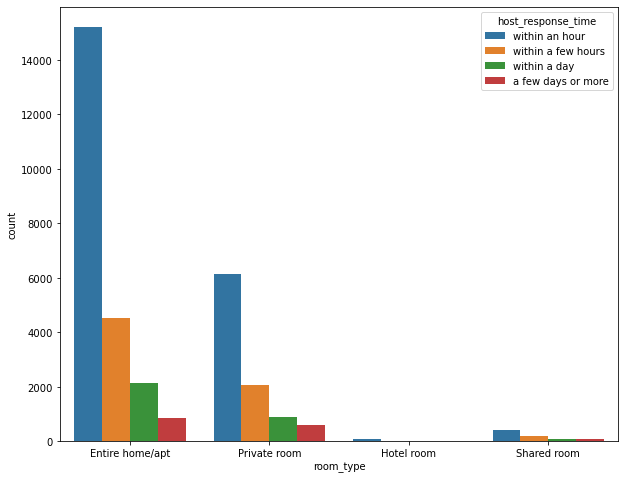

In [185]:
# Room_type vs Host_response_time

plt.figure(figsize=(10,8))
sns.countplot(x=df.room_type,hue=df.host_response_time)
plt.show()

In [ ]:
# Clearly we can see that most host in Entire home/apt segment response within an hour of the booking request

#### Multivariate analysis

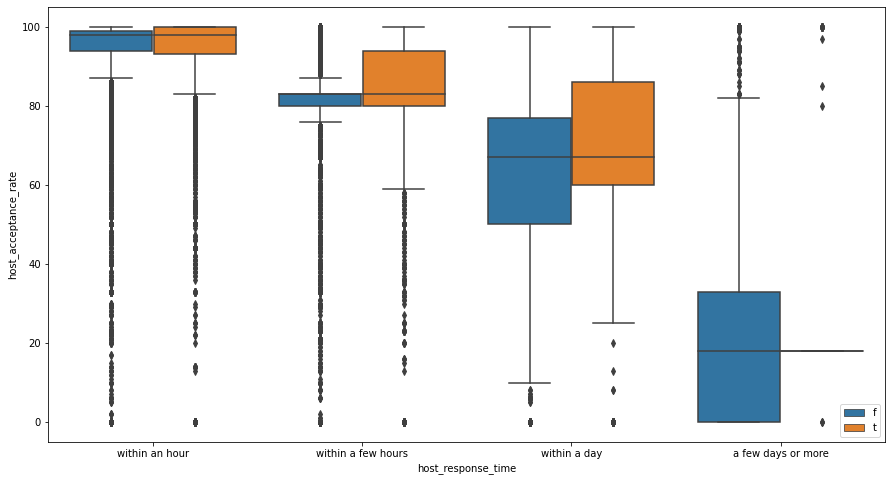

In [187]:
# Host_response_time vs host_acceptance_rate vs host_is_superhost

plt.figure(figsize=(15,8))
sns.boxplot(x=df.host_response_time,y=df['host_acceptance_rate'],hue=df.host_is_superhost)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Most host who respond to a booking within an hour tends to have high acceptance rate and are more likely to be super_host.

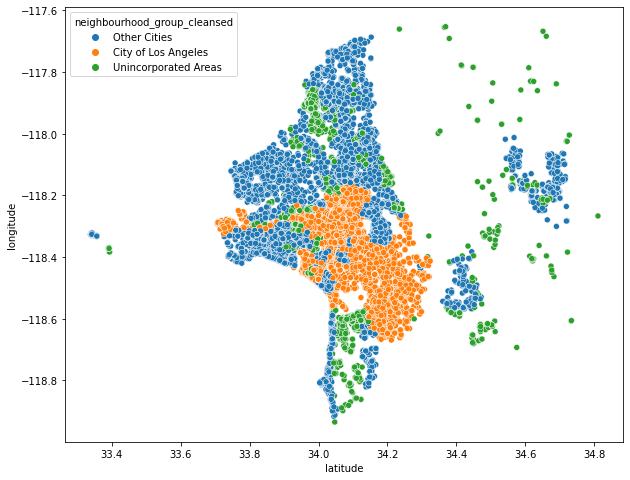

In [189]:
# Latitude vs Longitude vs neighbourhood_group_cleansed
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.latitude,y=df.longitude,hue=df.neighbourhood_group_cleansed)
plt.show()

In [ ]:
# We can see than some of the host who is not located in city of Los_Angeles is classified as in city of Los_Angeles.

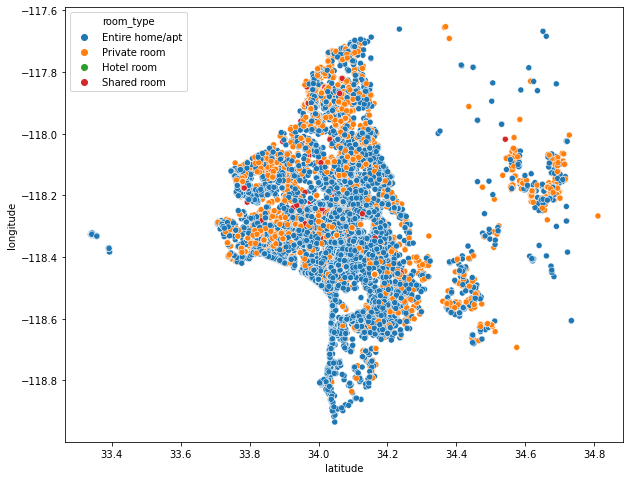

In [190]:
# Latitude vs Longitude vs Room_type

plt.figure(figsize=(10,8))
sns.scatterplot(x=df.latitude,y=df.longitude,hue=df.room_type)
plt.savefig('Lat-Long-Room.png')
plt.show()

In [ ]:
# The major part of the city of Los_Angeles os covered with Enitre home/apt and as we move aways from the
# city center we get to see a mixture of type of rooms

#### Correlation matrix

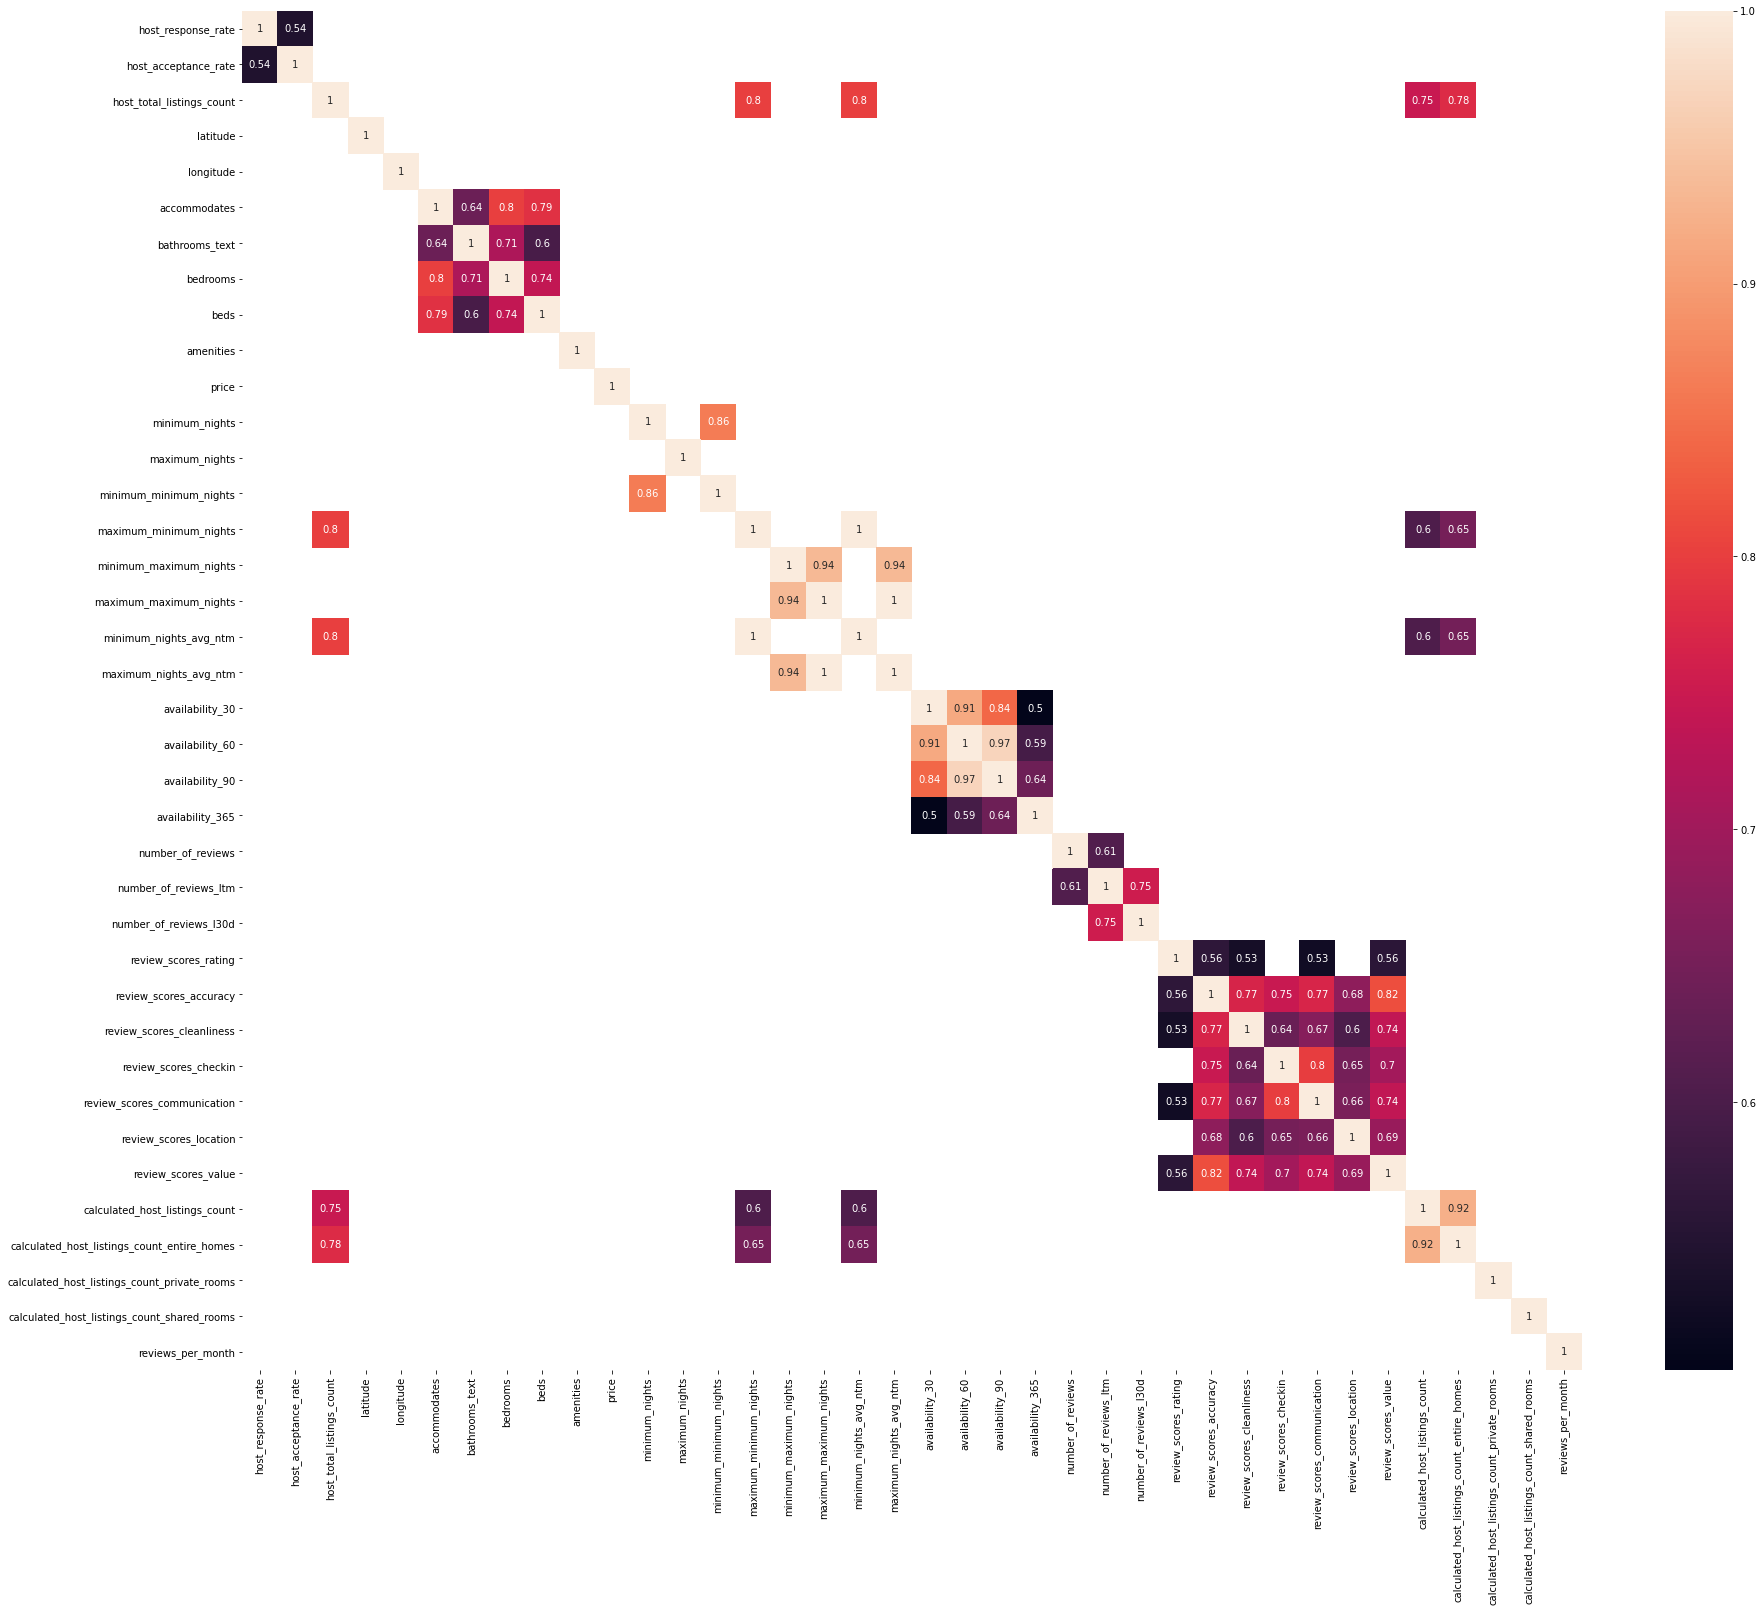

In [193]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr()[(df.corr() > 0.5) | (df.corr() < -0.5)], annot = True)
plt.show()

### Statistical Analysis

In [ ]:
# Checking the dependency of Target on the independent variables.Categorical Variables with Target

In [ ]:
# Normality test for price

# Null: The data is normally distributed
# Alternate: The data is not normally distributed

In [ ]:
j,p = ss.jarque_bera(df.price)
print('The test statistics: ',j,'\n')
print("The p_value: ",p)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude price is not normally distributed. Hence we can use the non-parametric test like Mann-Whitney and Kruskal-Wallis test for checking dependency.

In [ ]:
# Categorical Variables with Target

In [194]:
df.select_dtypes(include=object).describe()

,host_response_time,host_is_superhost,neighbourhood_group_cleansed,room_type,has_availability,instant_bookable
count,33329,33329,33329,33329,33329,33329
unique,4,2,3,4,2,2
top,within an hour,f,City of Los Angeles,Entire home/apt,t,f
freq,21859,23301,18210,22741,32374,21370


In [ ]:
# 1. host_response_time vs price

In [ ]:
# Since it is Categorical vs numerical and has more than 2 categories, using Kruskal-Wallis test 

# Null: The host_response_time and price are independent
# Alternate: The host_response_time and price are dependent

# alpha=0.05 (Assume)

In [196]:
df.host_response_time.value_counts()

within an hour        21859
within a few hours     6804
within a day           3112
a few days or more     1554
Name: host_response_time, dtype: int64

In [197]:
df1=df[df.host_response_time=='within an hour']['price']
df2=df[df.host_response_time=='within a few hours']['price']
df3=df[df.host_response_time=='within a day']['price']
df4=df[df.host_response_time=='a few days or more']['price']

In [198]:
k,p=ss.kruskal(df1,df2,df3,df4)
print('The test statistics: ',k,'\n')
print("The p_value: ",p)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude price is dependent on host_response_time.

In [ ]:
# 2.host_is_superhost vs price

In [ ]:
# Since it is Categorical vs numerical and has only 2 category, using Mann-Whitney test.

# Null: The host_is_superhost and price are independent
# Alternate: The host_is_superhost and price are dependent

# alpha = 0.05

In [201]:
df.host_is_superhost.value_counts()

f    23301
t    10028
Name: host_is_superhost, dtype: int64

In [202]:
df1=df[df.host_is_superhost=='f']['price']
df2=df[df.host_is_superhost=='t']['price']

In [204]:
m,p=ss.mannwhitneyu(df1,df2)
print('The test statistics: ',m,'\n')
print("The p_value: ",p)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude price is dependent on host_is_superhost.

In [ ]:
# 3.neighbourhood_group_cleansed vs price

# Since it is Categorical vs numerical and has more than 2 categories, using Kruskal-Wallis test 

# Null: The neighbourhood_group_cleansed and price are independent
# Alternate: The neighbourhood_group_cleansed and price are dependent

# alpha=0.05 (Assume)

In [206]:
df.neighbourhood_group_cleansed.value_counts()

City of Los Angeles     18210
Other Cities            12289
Unincorporated Areas     2830
Name: neighbourhood_group_cleansed, dtype: int64

In [207]:
df1=df[df.neighbourhood_group_cleansed=='City of Los Angeles']['price']
df2=df[df.neighbourhood_group_cleansed=='Other Cities']['price']
df3=df[df.neighbourhood_group_cleansed=='Unincorporated Areas']['price']

In [208]:
k,p=ss.kruskal(df1,df2,df3)
print('The test statistics: ',k,'\n')
print("The p_value: ",p)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude price is dependent on neighbourhood_group_cleansed.

In [ ]:
# 4.room_type vs price

# Since it is Categorical vs numerical and has more than 2 categories, using Kruskal-Wallis test 

# Null: The room_type and price are independent
# Alternate: The room_type and price are dependent

# alpha=0.05 (Assume)

In [210]:
df.room_type.value_counts()

Entire home/apt    22741
Private room        9702
Shared room          775
Hotel room           111
Name: room_type, dtype: int64

In [212]:
df1=df[df.room_type=='Entire home/apt']['price']
df2=df[df.room_type=='Private room']['price']
df3=df[df.room_type=='Shared room']['price']
df4=df[df.room_type=='Hotel room']['price']

In [213]:
k,p=ss.kruskal(df1,df2,df3,df4)
print('The test statistics: ',k,'\n')
print("The p_value: ",p)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude price is dependent on room_type.

In [ ]:
# 5. has_availability vs price

# Since it is Categorical vs numerical and has only 2 category, using Mann-Whitney test.

# Null: The has_availability and price are independent
# Alternate: The has_availability and price are dependent

# alpha = 0.05

In [215]:
df.has_availability.value_counts()

t    32374
f      955
Name: has_availability, dtype: int64

In [216]:
df1=df[df.has_availability=='f']['price']
df2=df[df.has_availability=='t']['price']

In [217]:
m,p=ss.mannwhitneyu(df1,df2)
print('The test statistics: ',m,'\n')
print("The p_value: ",p)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude price is dependent on has_availability.

In [ ]:
# 6.instant_bookable vs price

# Since it is Categorical vs numerical and has only 2 category, using Mann-Whitney test.

# Null: The instant_bookable and price are independent
# Alternate: The instant_bookable and price are dependent

# alpha = 0.05

In [219]:
df.instant_bookable.value_counts()

f    21370
t    11959
Name: instant_bookable, dtype: int64

In [220]:
df1=df[df.instant_bookable=='f']['price']
df2=df[df.instant_bookable=='t']['price']

In [221]:
m,p=ss.mannwhitneyu(df1,df2)
print('The test statistics: ',m,'\n')
print("The p_value: ",p)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude price is dependent on instant_bookable.

In [ ]:
# Numerical Variables

In [449]:
df_num = df.select_dtypes(np.number)
df_num.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00,98.00,1.00,33.98,-118.39,6,2.00,2.00,3.00,25,...,5.00,3.00,4.00,5.00,4.00,1,1,0,0,0.02
1,100.00,100.00,2.00,34.10,-118.35,1,1.00,1.00,1.00,42,...,4.91,5.00,4.97,5.00,4.85,3,0,3,0,0.69
2,100.00,37.00,2.00,34.00,-118.48,1,1.00,1.00,1.00,18,...,4.57,4.65,4.70,4.90,4.40,2,1,1,0,0.35
3,100.00,98.00,1.00,33.87,-118.12,2,1.00,1.00,1.00,23,...,4.86,4.97,4.97,4.92,4.80,1,1,0,0,0.95
4,100.00,98.00,6.00,34.11,-118.38,2,1.00,1.00,2.00,21,...,3.83,3.96,4.30,4.64,4.00,4,1,3,0,0.23


In [454]:
a = df_num.drop(columns = ['price'])
b = df_num.price
c = 1
for i in a.columns:
    z = c
    c = z + 1
    e = a[i]
    n = b
    print('\n',z,'Independent Variable =',i, ' : ', 'Target Variable = Price')
    print('\n Hypothesis for normality')
    print('\n\tH0: The data is normally distributed')
    print('\tHA: The data is not normally distributed')
    t1,p1 = ss.jarque_bera(e)
    t2,p2 = ss.jarque_bera(n)
    if p1 < 0.05 or p2 < 0.05: 
        print('\n Inference : The data is not normally distributed, hence using non parametric test - SpearMan Correlation.')
        print('\nHypothesis for SpearMan Correlation test')
        print('\n\tH0: There is no relationship between', i ,'and Price.')
        print('\tHA: There is a relationship between', i ,'and Price.')
        t3,p3 = ss.spearmanr(e,n)
        if p3< 0.05:
            print('\n Inference : Accepting to reject null hypothesis, the variable -',i,'is a significant feature to predict the target column - Price')
        else:
            print('\n Inference : Accept null hypothesis, the variable -',i,'is not a significant feature to predict the target column - Price')
    else:
        print('The data is normally distributed, hence using Parametric test - Pearson Correlation.')
        print('\nHypothesis for pearson test')
        print('\n\tH0: There is no relationship between', i ,'and Price.')
        print('\tHA: There is a relationship between', i ,'and Price.')
        t4,p4 = ss.pearsonr(e,n)
        if p4< 0.05:
             print('\n Inference : Accepting to reject null hypothesis, the variable -',i,'is a significant feature to predict the target column - Price.')
        else:
            print('\n  Inference : Accept null hypothesis, the variable -',i,'is not a significant feature to predict the target column - Price')


 1 Independent Variable = host_response_rate  :  Target Variable = Price

 Hypothesis for normality

	H0: The data is normally distributed
	HA: The data is not normally distributed

 Inference : The data is not normally distributed, hence using non parametric test - SpearMan Correlation.

Hypothesis for SpearMan Correlation test

	H0: There is no relationship between host_response_rate and Price.
	HA: There is a relationship between host_response_rate and Price.

 Inference : Accept null hypothesis, the variable - host_response_rate is not a significant feature to predict the target column - Price

 2 Independent Variable = host_acceptance_rate  :  Target Variable = Price

 Hypothesis for normality

	H0: The data is normally distributed
	HA: The data is not normally distributed

 Inference : The data is not normally distributed, hence using non parametric test - SpearMan Correlation.

Hypothesis for SpearMan Correlation test

	H0: There is no relationship between host_acceptance_rate 


 Inference : The data is not normally distributed, hence using non parametric test - SpearMan Correlation.

Hypothesis for SpearMan Correlation test

	H0: There is no relationship between maximum_maximum_nights and Price.
	HA: There is a relationship between maximum_maximum_nights and Price.

 Inference : Accept null hypothesis, the variable - maximum_maximum_nights is not a significant feature to predict the target column - Price

 17 Independent Variable = minimum_nights_avg_ntm  :  Target Variable = Price

 Hypothesis for normality

	H0: The data is normally distributed
	HA: The data is not normally distributed

 Inference : The data is not normally distributed, hence using non parametric test - SpearMan Correlation.

Hypothesis for SpearMan Correlation test

	H0: There is no relationship between minimum_nights_avg_ntm and Price.
	HA: There is a relationship between minimum_nights_avg_ntm and Price.

 Inference : Accepting to reject null hypothesis, the variable - minimum_nights_av


 Inference : Accepting to reject null hypothesis, the variable - review_scores_communication is a significant feature to predict the target column - Price

 31 Independent Variable = review_scores_location  :  Target Variable = Price

 Hypothesis for normality

	H0: The data is normally distributed
	HA: The data is not normally distributed

 Inference : The data is not normally distributed, hence using non parametric test - SpearMan Correlation.

Hypothesis for SpearMan Correlation test

	H0: There is no relationship between review_scores_location and Price.
	HA: There is a relationship between review_scores_location and Price.

 Inference : Accepting to reject null hypothesis, the variable - review_scores_location is a significant feature to predict the target column - Price

 32 Independent Variable = review_scores_value  :  Target Variable = Price

 Hypothesis for normality

	H0: The data is normally distributed
	HA: The data is not normally distributed

 Inference : The data is no

### Encodeing

In [223]:
# Splitting the dataset into 2 dataset one with only obect datatype and two with numeric

obj = df.select_dtypes(object) 
num = df.select_dtypes(np.number)

In [224]:
obj_dumm = pd.get_dummies(obj, drop_first=True)

In [225]:
# Final concated dataset after encoding

df_final = pd.concat([obj_dumm,num], axis = 1)

In [226]:
df_final

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,0,1,0,1,0,0,0,0,1,...,5.00,3.00,4.00,5.00,4.00,1,1,0,0,0.02
1,0,1,0,1,0,0,0,1,0,1,...,4.91,5.00,4.97,5.00,4.85,3,0,3,0,0.69
2,0,0,1,1,1,0,0,1,0,1,...,4.57,4.65,4.70,4.90,4.40,2,1,1,0,0.35
3,0,0,1,0,1,0,0,0,0,1,...,4.86,4.97,4.97,4.92,4.80,1,1,0,0,0.95
4,0,0,1,0,0,0,0,0,0,1,...,3.83,3.96,4.30,4.64,4.00,4,1,3,0,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33324,0,0,1,0,0,0,0,0,0,1,...,4.86,4.97,4.97,4.92,4.80,5,5,0,0,0.95
33325,0,0,1,0,0,0,0,0,0,1,...,4.86,4.97,4.97,4.92,4.80,5,5,0,0,0.95
33326,0,0,1,0,0,0,0,0,0,1,...,4.86,4.97,4.97,4.92,4.80,5,5,0,0,0.95
33327,0,0,1,0,0,0,0,0,0,1,...,4.86,4.97,4.97,4.92,4.80,11,10,1,0,0.95


## Base model

### Linear Model

In [228]:
#Declaring the X and y.
X = df_final.drop(columns = 'price')
y = df_final.price
# add constant
x = sm.add_constant(X)

In [230]:
# Train & test split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=100)

In [78]:
# Building model

In [231]:
Base_MLR = sm.OLS(y_train,X_train).fit()

In [232]:
Base_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:57:59   Log-Likelihood:            -2.0871e+05
No. Observations:               26663   AIC:                         4.175e+05
Df Residuals:                   26614   BIC:                         4.179e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              -4.43e+04   3036.277    -14.591      0.000   -5.03e+04   -3.84e+04
host_response_time_within a day                     135.6289     48.967      2.770      0.006      39.651     231.607
host_response_time_within a few hours               139.0476     54.208      2.565      0.010      32.797     245.298
host_response_time_within an hour                   134.2812     54.766      2.452      0.014      26.937     241.626
host_is_superhost_t                                  -1.2631      9.391     -0.134      0.893     -19.670      17.143
neighbourhood_group_cleansed_Other Cities            78.0530      8.948      8.723      0.000      60.514      95.592
neighbourhood_group_cleansed_Unincorporated Areas    40.4885     14.718      2.751      0.006      11.640      69.337
room_type_Hotel room                                857.6993     94.186      9.106      0.000     673.090    1042.309
room_type_Private room                               16.5210     10.195      1.621      0.105      -3.461      36.503
room_type_Shared room                               -30.2744     34.361     -0.881      0.378     -97.623      37.074
has_availability_t                                  -39.7824     24.022     -1.656      0.098     -86.866       7.301
instant_bookable_t                                   27.8762      8.547      3.262      0.001      11.124      44.629
host_response_rate                                   -0.2033      0.568     -0.358      0.720      -1.317       0.910
host_acceptance_rate                                 -1.8735      0.196     -9.578      0.000      -2.257      -1.490
host_total_listings_count                            -0.0018      0.034     -0.053      0.958      -0.068       0.065
latitude                                              8.1777     29.050      0.282      0.778     -48.762      65.117
longitude                                          -367.4361     24.416    -15.049      0.000    -415.293    -319.580
accommodates                                         23.0222      2.883      7.985      0.000      17.371      28.673
bathrooms_text                                      255.9578      5.542     46.183      0.000     245.095     266.821
bedrooms                                             95.5175      7.232     13.208      0.000      81.342     109.693
beds                                                -45.9571      4.293    -10.705      0.000     -54.372     -37.542
amenities                                            -0.7596      0.313     -2.428      0.015      -1.373      -0.146
minimum_nights                                       -0.3485      0.253     -1.375      0.169      -0.845       0.148
maximum_nights 

In [234]:
# The significant variable according to p_value is:

Base_MLR.pvalues[Base_MLR.pvalues < 0.05]

const                                               0.00
host_response_time_within a day                     0.01
host_response_time_within a few hours               0.01
host_response_time_within an hour                   0.01
neighbourhood_group_cleansed_Other Cities           0.00
neighbourhood_group_cleansed_Unincorporated Areas   0.01
room_type_Hotel room                                0.00
instant_bookable_t                                  0.00
host_acceptance_rate                                0.00
longitude                                           0.00
accommodates                                        0.00
bathrooms_text                                      0.00
bedrooms                                            0.00
beds                                                0.00
amenities                                           0.02
availability_30                                     0.00
number_of_reviews_l30d                              0.03
review_scores_cleanliness      

In [235]:
Base_MLR.condition_number

47233034660.850494

### Assumption Check

#### Mutlicolinerity

In [236]:
#Declaring the X and y.
X = df_final.drop(columns = ['price','maximum_nights_avg_ntm','longitude','calculated_host_listings_count',
                           'review_scores_accuracy','review_scores_checkin','minimum_nights_avg_ntm','review_scores_communication',
                          'review_scores_location','review_scores_value','host_response_rate','latitude','review_scores_cleanliness',
                          'availability_60','review_scores_rating','has_availability_t','host_acceptance_rate','availability_90','bedrooms','accommodates',
                          'minimum_maximum_nights','maximum_maximum_nights','host_response_time_within an hour','minimum_nights','amenities','host_total_listings_count'])
y = df_final.price
#VIF
vif = [VIF(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame(vif, index = X.columns, columns = ['VIF_index']).sort_values(by = ['VIF_index'], ascending=False)
vif_df

,VIF_index
bathrooms_text,4.73
beds,4.60
number_of_reviews_ltm,3.83
availability_365,3.65
number_of_reviews_l30d,2.87
availability_30,2.72
maximum_minimum_nights,2.66
maximum_nights,2.43
calculated_host_listings_count_entire_homes,2.22
number_of_reviews,2.08


In [ ]:
# From VIF we can see that there is high multi-collinearity in he data.
# Finding the variable with less that thershold of 5 using VIF

#### Linearity check

In [87]:
# Null hyothesis : It is good linear model 
# ALternate hyothesis : It is not good linear model

In [239]:
sm.stats.linear_rainbow(MLR_Mc)

(1.0463214878684113, 0.004491001525071741)

Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude this model is not a good linear model.

In [240]:
# Model_2 ( Bulding a model with variables from VIF<5)

In [241]:
#Declaring the X and y.
X = df_final.drop(columns = ['price','maximum_nights_avg_ntm','longitude','calculated_host_listings_count',
                           'review_scores_accuracy','review_scores_checkin','minimum_nights_avg_ntm','review_scores_communication',
                          'review_scores_location','review_scores_value','host_response_rate','latitude','review_scores_cleanliness',
                          'availability_60','review_scores_rating','has_availability_t','host_acceptance_rate','availability_90','bedrooms','accommodates',
                          'minimum_maximum_nights','maximum_maximum_nights','host_response_time_within an hour','minimum_nights','amenities','host_total_listings_count'])
y = df_final.price

# add constant
x = sm.add_constant(X)

#train test split
X_train,X_test,y_train,_test = train_test_split(x,y,test_size=0.20, random_state=100)

MLR_Mc = sm.OLS(y_train,X_train).fit()

In [242]:
MLR_Mc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     387.5
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:07:53   Log-Likelihood:            -2.0912e+05
No. Observations:               26663   AIC:                         4.183e+05
Df Residuals:                   26639   BIC:                         4.185e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              -258.1019     12.994    -19.863      0.000    -283.571    -232.633
host_response_time_within a day                      60.1530     13.486      4.460      0.000      33.720      86.586
host_response_time_within a few hours                34.4866      9.711      3.551      0.000      15.453      53.520
host_is_superhost_t                                   5.5484      9.067      0.612      0.541     -12.224      23.321
neighbourhood_group_cleansed_Other Cities            43.6812      8.483      5.149      0.000      27.055      60.308
neighbourhood_group_cleansed_Unincorporated Areas    -1.3513     14.474     -0.093      0.926     -29.721      27.018
room_type_Hotel room                                262.9703     64.849      4.055      0.000     135.863     390.078
room_type_Private room                              -64.4466      9.425     -6.838      0.000     -82.920     -45.973
room_type_Shared room                              -179.0327     33.824     -5.293      0.000    -245.330    -112.735
instant_bookable_t                                    7.6177      8.334      0.914      0.361      -8.718      23.953
bathrooms_text                                      321.7165      4.588     70.115      0.000     312.723     330.710
beds                                                  2.7988      3.235      0.865      0.387      -3.543       9.140
maximum_nights                                       -0.0032      0.008     -0.413      0.680      -0.018       0.012
minimum_minimum_nights                               -0.3112      0.117     -2.659      0.008      -0.541      -0.082
maximum_minimum_nights                                0.0930      0.070      1.329      0.184      -0.044       0.230
availability_30                                       4.5752      0.384     11.904      0.000       3.822       5.329
availability_365                                     -0.0603      0.032     -1.876      0.061      -0.123       0.003
number_of_reviews                                    -0.1299      0.071     -1.830      0.067      -0.269       0.009
number_of_reviews_ltm                                 0.5285      0.391      1.351      0.177      -0.238       1.295
number_of_reviews_l30d                              -10.7363      3.528     -3.044      0.002     -17.651      -3.822
calculated_host_listings_count_entire_homes          -0.1328      0.099     -1.339      0.181      -0.327       0.062
calculated_host_listings_count_private_rooms         -2.1005      0.182    -11.559      0.000      -2.457      -1.744
calculated_host_listings_count_shared_rooms         -18.3167      2.346     -7.807      0.000     -22.916     -13.718
reviews_per_mon

In [243]:
MLR_Mc.condition_number

14382.890133077612

In [ ]:
# Even after dropping all the variable with VIF > 5 whean the conditional number as 14382. 
# Also the R2 value has gone down from 0.27 to 0.25.
# Hence again we can conclude that this is not a good linear model.

In [ ]:
# Post model assumption check

#### Homoscedacity

Hypothesis_for_goldfeld_test:

 H0: Heteroscedasticity is not present<br>
 H1: Heteroscedasticity is present.

In [245]:
sm.stats.het_goldfeldquandt(y = MLR_Mc.resid, x = X_train)

(0.7986980658518356, 0.9999999999999999, 'increasing')

Inference : Since the p-value is greater than alpha(i.e. 0.05) we fail to reject the null hypothesis. Hence we can conclude that there is same varaince across the residuals.

#### Normality check

Hypothesis for Normality

H0: Residue is normal<br>
H1: Residue is not normal 

In [246]:
ss.shapiro(MLR_Mc.resid)

ShapiroResult(statistic=0.28699231147766113, pvalue=0.0)

<AxesSubplot:ylabel='Density'>

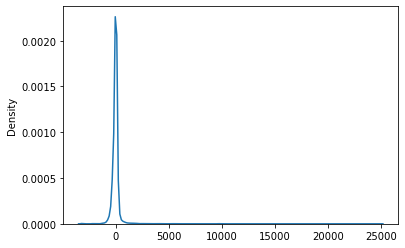

In [247]:
sns.kdeplot(MLR_Mc.resid)

Inference : Since the p-value is less than alpha(i.e. 0.05) we reject the null hypothesis. Hence we can conclude that there is no normal distribution in the residual.

#### Auto-Correlation

In [248]:
MLR_Mc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     387.5
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:15:25   Log-Likelihood:            -2.0912e+05
No. Observations:               26663   AIC:                         4.183e+05
Df Residuals:                   26639   BIC:                         4.185e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              -258.1019     12.994    -19.863      0.000    -283.571    -232.633
host_response_time_within a day                      60.1530     13.486      4.460      0.000      33.720      86.586
host_response_time_within a few hours                34.4866      9.711      3.551      0.000      15.453      53.520
host_is_superhost_t                                   5.5484      9.067      0.612      0.541     -12.224      23.321
neighbourhood_group_cleansed_Other Cities            43.6812      8.483      5.149      0.000      27.055      60.308
neighbourhood_group_cleansed_Unincorporated Areas    -1.3513     14.474     -0.093      0.926     -29.721      27.018
room_type_Hotel room                                262.9703     64.849      4.055      0.000     135.863     390.078
room_type_Private room                              -64.4466      9.425     -6.838      0.000     -82.920     -45.973
room_type_Shared room                              -179.0327     33.824     -5.293      0.000    -245.330    -112.735
instant_bookable_t                                    7.6177      8.334      0.914      0.361      -8.718      23.953
bathrooms_text                                      321.7165      4.588     70.115      0.000     312.723     330.710
beds                                                  2.7988      3.235      0.865      0.387      -3.543       9.140
maximum_nights                                       -0.0032      0.008     -0.413      0.680      -0.018       0.012
minimum_minimum_nights                               -0.3112      0.117     -2.659      0.008      -0.541      -0.082
maximum_minimum_nights                                0.0930      0.070      1.329      0.184      -0.044       0.230
availability_30                                       4.5752      0.384     11.904      0.000       3.822       5.329
availability_365                                     -0.0603      0.032     -1.876      0.061      -0.123       0.003
number_of_reviews                                    -0.1299      0.071     -1.830      0.067      -0.269       0.009
number_of_reviews_ltm                                 0.5285      0.391      1.351      0.177      -0.238       1.295
number_of_reviews_l30d                              -10.7363      3.528     -3.044      0.002     -17.651      -3.822
calculated_host_listings_count_entire_homes          -0.1328      0.099     -1.339      0.181      -0.327       0.062
calculated_host_listings_count_private_rooms         -2.1005      0.182    -11.559      0.000      -2.457      -1.744
calculated_host_listings_count_shared_rooms         -18.3167      2.346     -7.807      0.000     -22.916     -13.718
reviews_per_mon

Inference : Since the Durbin-Watson number is close to 2 we can conclude that there is no autocorrelation in the model.

As we can see 3 out of the 5 assumptions for a linear model is not satisfied by which we can conclude that linear model is not a good fit for this dataset. Now we can try the non-linear model.

### Non linear Models

In [258]:
#Declaring the X and y.
X = df_final.drop(columns = 'price')
y = df_final.price

In [259]:
# Train & test split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20, random_state=100)

#### Decision Tree

In [260]:
dt=DecisionTreeRegressor(random_state=10)
dt.fit(Xtrain,ytrain)
dt_pred=dt.predict(Xtest)

In [261]:
print("Decision tree train r2",dt.score(Xtrain,ytrain),'\n')
print("Decision tree test r2",dt.score(Xtest,ytest),'\n')

Decision tree train r2 0.9999997766577781 

Decision tree test r2 0.380324441658629 



#### Random Forest

In [263]:
rfc=RandomForestRegressor(random_state=10)
rfc.fit(Xtrain,ytrain)
rfc_pred=rfc.predict(Xtest)

In [265]:
print("RandomForest train r2",rfc.score(Xtrain,ytrain),'\n')
print("RandomForest test r2",rfc.score(Xtest,ytest),'\n')

RandomForest train r2 0.9420140513276459 

RandomForest test r2 0.6203929779536403 



#### Ada_boosting

In [267]:
ada=AdaBoostRegressor(random_state=10)
ada.fit(Xtrain,ytrain)
ada_pred=ada.predict(Xtest)

In [269]:
print("Ada-Boost train r2",ada.score(Xtrain,ytrain),'\n')
print("Ada-Boost test r2",ada.score(Xtest,ytest),'\n')

Ada-Boost train r2 -13.028590800069948 

Ada-Boost test r2 -10.909824283849344 



#### Gradient Boosting

In [270]:
gb=GradientBoostingRegressor(random_state=10)
gb.fit(Xtrain,ytrain)
gb_pred=gb.predict(Xtest)

In [271]:
print("Gradient boost train r2",gb.score(Xtrain,ytrain),'\n')
print("Gradient boost test r2",gb.score(Xtest,ytest),'\n')

Gradient boost train r2 0.5927189097968777 

Gradient boost test r2 0.4293242211498578 



#### XG Boosting

In [272]:
xg=XGBRegressor(random_state=10)
xg.fit(Xtrain,ytrain)
xg_pred=xg.predict(Xtest)

In [273]:
print("XG boost train r2",xg.score(Xtrain,ytrain),'\n')
print("XG boost test r2",xg.score(Xtest,ytest),'\n')

XG boost train r2 0.9556800882027592 

XG boost test r2 0.6285701354087327 



In [279]:
Base_Model_Eval=pd.DataFrame(columns=['Model','Train_R2','Test_R2','RMSE'])

In [280]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Decision_tree',
                             'Train_R2':dt.score(Xtrain,ytrain),
                             'Test_R2':dt.score(Xtest,ytest),
                             'RMSE':np.round(mse(ytest,dt_pred,squared=False),2)},ignore_index=True)

In [281]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Random_forest',
                             'Train_R2':rfc.score(Xtrain,ytrain),
                             'Test_R2':rfc.score(Xtest,ytest),
                             'RMSE':np.round(mse(ytest,rfc_pred,squared=False),2)},ignore_index=True)

In [282]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Ada Boosting',
                             'Train_R2':ada.score(Xtrain,ytrain),
                             'Test_R2':ada.score(Xtest,ytest),
                             'RMSE':np.round(mse(ytest,ada_pred,squared=False),2)},ignore_index=True)

In [283]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Gradient_Boosting',
                             'Train_R2':gb.score(Xtrain,ytrain),
                             'Test_R2':gb.score(Xtest,ytest),
                             'RMSE':np.round(mse(ytest,gb_pred,squared=False),2)},ignore_index=True)

In [284]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'XG_Boosting',
                             'Train_R2':xg.score(Xtrain,ytrain),
                             'Test_R2':xg.score(Xtest,ytest),
                             'RMSE':np.round(mse(ytest,xg_pred,squared=False),2)},ignore_index=True)

In [285]:
Base_Model_Eval

,Model,Train_R2,Test_R2,RMSE
0,Decision_tree,1.00,0.38,614.32
1,Random_forest,0.94,0.62,480.82
2,Ada Boosting,-13.03,-10.91,2693.18
3,Gradient_Boosting,0.59,0.43,589.53
4,XG_Boosting,0.96,0.63,475.61


From the model Evaluation we can see that the non-linear base models are either overfitting and all the models are underfitting.

In [291]:
# We can try to reduce the multicolinearity present in the data by keeping variable with VIF<11.

X = df_final.drop(columns = ['price','maximum_nights_avg_ntm','longitude','calculated_host_listings_count',
                           'review_scores_accuracy','review_scores_checkin','minimum_nights_avg_ntm','review_scores_communication',
                          'review_scores_location','review_scores_value','host_response_rate','latitude','review_scores_cleanliness',
                          'availability_60','review_scores_rating','has_availability_t','host_acceptance_rate','availability_90','bedrooms',
                          ])
y = df_final.price

#VIF
vif = [VIF(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame(vif, index = X.columns, columns = ['VIF_index']).sort_values(by = ['VIF_index'], ascending=False)
vif_df

,VIF_index
accommodates,10.63
beds,8.07
minimum_maximum_nights,8.03
maximum_maximum_nights,8.00
host_response_time_within an hour,7.27
amenities,6.68
minimum_nights,6.41
maximum_minimum_nights,5.87
bathrooms_text,5.79
host_total_listings_count,5.78


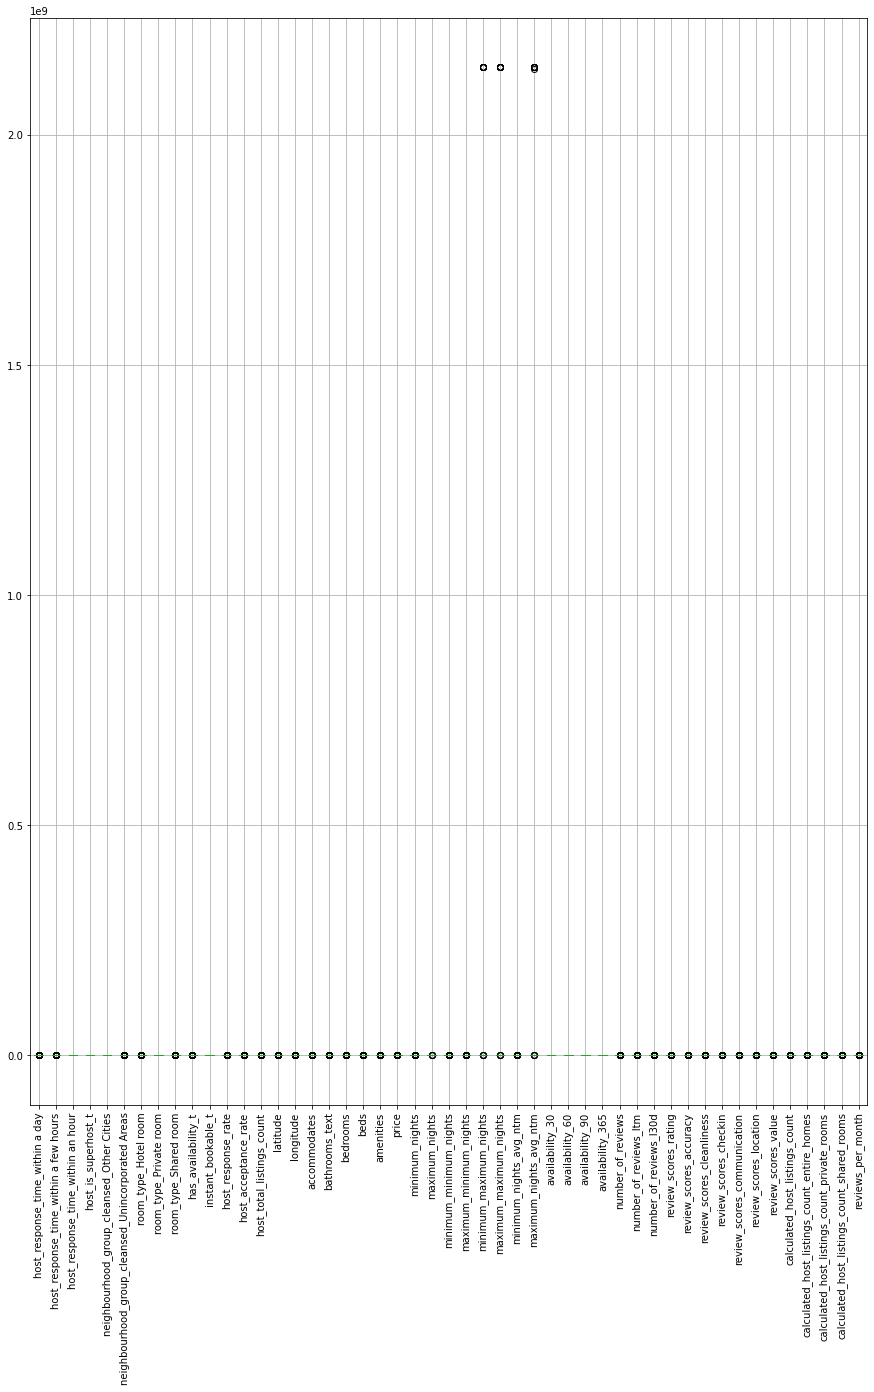

In [294]:
# Also the outliers present in the data is significantly effect the performance of the model,

plt.figure(figsize=(15,20))
df_final.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# We have outlier in 28 out of the 30 columns remaining from VIF.

In [296]:
# Dropping the data with outliers.

df_copy=df_final.copy(deep=True) # Creating a copy

Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1
df_copy = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) | (df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]

In [297]:
df_copy.shape

(3541, 49)

Hence by dropping the rows with outliers we lose close to 90% of the data, Therefore dropping the outliers is not an option.

### Transforming

In [ ]:
# Transforming the data minimise the effect of the outliers.

# As we see that 28 out of 30 variable have outlier it not a good practice to tranform all the independent variable, 
# Hence we can try to tranform the Target to reduce to impact of the outliers

In [303]:
pt=PowerTransformer() # Instantiation

pt.fit(df_final[['price']])
df_final['price_PT']= pt.transform(df_final[['price']])

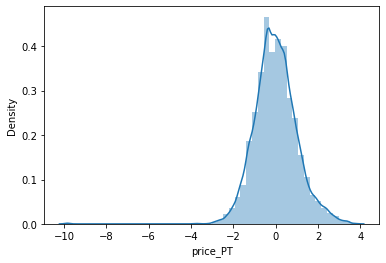

In [501]:
# Checking the distribution of price after tranformation

sns.distplot(df_final.price_PT)

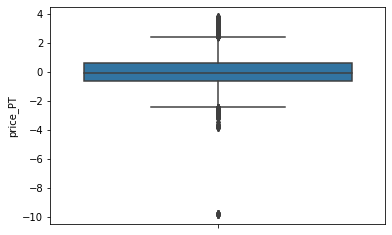

In [499]:
# Checking the outlier in price after tranformation
sns.boxplot(data=df_final,y=df_final.price_PT)

In [457]:
# Declaring X and y

X = df_final.drop(columns = ['price','price_PT','maximum_nights_avg_ntm','longitude','calculated_host_listings_count',
                           'review_scores_accuracy','review_scores_checkin','minimum_nights_avg_ntm','review_scores_communication',
                          'review_scores_location','review_scores_value','host_response_rate','latitude','review_scores_cleanliness',
                          'availability_60','review_scores_rating','has_availability_t','host_acceptance_rate','availability_90','bedrooms',
                          ])
y=df_final['price_PT']

In [458]:
# Train test split

Xtrain,Xtest,ytrain_tran,ytest_tran=train_test_split(X,y,test_size=0.2,random_state=10)

### Non-Linear Base Model using new transformed data

#### Decision tree

In [330]:
dt=DecisionTreeRegressor(random_state=10)
dt.fit(Xtrain,ytrain_tran)
dt_pred=dt.predict(Xtest)

In [308]:
print("train r2",dt.score(Xtrain,ytrain_tran),'\n')
print("test r2",dt.score(Xtest,ytest_tran))

train r2 0.9980812332343478 

test r2 0.45186114687268997


#### Random Forest

In [339]:
rfc=RandomForestRegressor(random_state=10)
rfc.fit(Xtrain,ytrain_tran)
rfc_pred=rfc.predict(Xtest)

In [310]:
print("RandomForest train r2",rfc.score(Xtrain,ytrain_tran),'\n')
print("RandomForest test r2",rfc.score(Xtest,ytest_tran))

RandomForest train r2 0.9608796469779705 

RandomForest test r2 0.7297571926233111


#### Ada Boosting

In [338]:
ada=AdaBoostRegressor(random_state=10)
ada.fit(Xtrain,ytrain_tran)
ada_pred=ada.predict(Xtest)

In [316]:
print("Ada Boost train r2",ada.score(Xtrain,ytrain_tran),'\n')
print("Ada Boost test r2",ada.score(Xtest,ytest_tran))

Ada Boost train r2 0.5233835981994082 

Ada Boost test r2 0.5298408832134248


#### Gradient Boosting

In [337]:
gb=GradientBoostingRegressor(random_state=10)
gb.fit(Xtrain,ytrain_tran)
gb_pred=gb.predict(Xtest)

In [314]:
print("Gradient Boost train r2",gb.score(Xtrain,ytrain_tran),'\n')
print("Gradient boost test r2",gb.score(Xtest,ytest_tran))

Gradient Boost train r2 0.7080542922866698 

Gradient boost test r2 0.6879204128099166


#### XG Boosting

In [336]:
xg=XGBRegressor(random_state=10)
xg.fit(Xtrain,ytrain_tran)
xg_pred=xg.predict(Xtest)

In [318]:
print("XG Boost train r2",xg.score(Xtrain,ytrain_tran),'\n')
print("XG Boost test r2",xg.score(Xtest,ytest_tran))

XG Boost train r2 0.835816524785392 

XG Boost test r2 0.7389928147399825


#### LGBM Boosting

In [333]:
lit=LGBMRegressor(random_state=10)
lit.fit(Xtrain,ytrain_tran)
lit_pred=lit.predict(Xtest)

In [322]:
print("LGBM Boost train r2",lit.score(Xtrain,ytrain_tran),'\n')
print("LGBM Boost test r2",lit.score(Xtest,ytest_tran))

LGBM Boost train r2 0.7679900985446397 

LGBM Boost test r2 0.7310667115509359


#### CAT Boosting

In [334]:
cat=CatBoostRegressor(random_state=10)
cat.fit(Xtrain,ytrain_tran)
cat_pred=cat.predict(Xtest)

Learning rate set to 0.068782
0:	learn: 0.9637190	total: 14.7ms	remaining: 14.7s
1:	learn: 0.9298836	total: 25.6ms	remaining: 12.8s
2:	learn: 0.8978904	total: 36.8ms	remaining: 12.2s
3:	learn: 0.8695270	total: 47.1ms	remaining: 11.7s
4:	learn: 0.8440310	total: 57.7ms	remaining: 11.5s
5:	learn: 0.8210199	total: 67.9ms	remaining: 11.2s
6:	learn: 0.7997151	total: 78.4ms	remaining: 11.1s
7:	learn: 0.7814802	total: 88ms	remaining: 10.9s
8:	learn: 0.7636807	total: 98ms	remaining: 10.8s
9:	learn: 0.7475695	total: 110ms	remaining: 10.9s
10:	learn: 0.7336404	total: 120ms	remaining: 10.8s
11:	learn: 0.7201399	total: 130ms	remaining: 10.7s
12:	learn: 0.7080545	total: 140ms	remaining: 10.6s
13:	learn: 0.6970468	total: 151ms	remaining: 10.6s
14:	learn: 0.6877518	total: 162ms	remaining: 10.6s
15:	learn: 0.6783547	total: 172ms	remaining: 10.6s
16:	learn: 0.6705714	total: 182ms	remaining: 10.5s
17:	learn: 0.6636102	total: 195ms	remaining: 10.6s
18:	learn: 0.6568024	total: 208ms	remaining: 10.7s
19:	le

164:	learn: 0.5207258	total: 2.18s	remaining: 11s
165:	learn: 0.5204141	total: 2.19s	remaining: 11s
166:	learn: 0.5201167	total: 2.21s	remaining: 11s
167:	learn: 0.5198723	total: 2.22s	remaining: 11s
168:	learn: 0.5197071	total: 2.23s	remaining: 11s
169:	learn: 0.5195179	total: 2.25s	remaining: 11s
170:	learn: 0.5192961	total: 2.26s	remaining: 11s
171:	learn: 0.5190748	total: 2.27s	remaining: 11s
172:	learn: 0.5188793	total: 2.29s	remaining: 10.9s
173:	learn: 0.5187302	total: 2.3s	remaining: 10.9s
174:	learn: 0.5183660	total: 2.31s	remaining: 10.9s
175:	learn: 0.5180731	total: 2.32s	remaining: 10.9s
176:	learn: 0.5178860	total: 2.33s	remaining: 10.8s
177:	learn: 0.5176095	total: 2.34s	remaining: 10.8s
178:	learn: 0.5172699	total: 2.35s	remaining: 10.8s
179:	learn: 0.5170914	total: 2.36s	remaining: 10.7s
180:	learn: 0.5168245	total: 2.37s	remaining: 10.7s
181:	learn: 0.5166831	total: 2.38s	remaining: 10.7s
182:	learn: 0.5165056	total: 2.39s	remaining: 10.7s
183:	learn: 0.5163527	total: 

333:	learn: 0.4916027	total: 4.14s	remaining: 8.26s
334:	learn: 0.4915273	total: 4.16s	remaining: 8.25s
335:	learn: 0.4913982	total: 4.17s	remaining: 8.24s
336:	learn: 0.4912567	total: 4.18s	remaining: 8.23s
337:	learn: 0.4911168	total: 4.2s	remaining: 8.22s
338:	learn: 0.4909870	total: 4.21s	remaining: 8.22s
339:	learn: 0.4908511	total: 4.23s	remaining: 8.21s
340:	learn: 0.4907067	total: 4.25s	remaining: 8.21s
341:	learn: 0.4905579	total: 4.26s	remaining: 8.2s
342:	learn: 0.4904094	total: 4.27s	remaining: 8.18s
343:	learn: 0.4902712	total: 4.28s	remaining: 8.16s
344:	learn: 0.4901901	total: 4.29s	remaining: 8.15s
345:	learn: 0.4900674	total: 4.3s	remaining: 8.13s
346:	learn: 0.4899038	total: 4.31s	remaining: 8.11s
347:	learn: 0.4897919	total: 4.32s	remaining: 8.1s
348:	learn: 0.4896613	total: 4.33s	remaining: 8.09s
349:	learn: 0.4895220	total: 4.35s	remaining: 8.07s
350:	learn: 0.4893915	total: 4.36s	remaining: 8.06s
351:	learn: 0.4892836	total: 4.37s	remaining: 8.05s
352:	learn: 0.48

498:	learn: 0.4733555	total: 6.54s	remaining: 6.57s
499:	learn: 0.4732103	total: 6.56s	remaining: 6.56s
500:	learn: 0.4731138	total: 6.57s	remaining: 6.54s
501:	learn: 0.4730569	total: 6.58s	remaining: 6.53s
502:	learn: 0.4729479	total: 6.6s	remaining: 6.52s
503:	learn: 0.4728552	total: 6.61s	remaining: 6.51s
504:	learn: 0.4727794	total: 6.63s	remaining: 6.5s
505:	learn: 0.4726464	total: 6.65s	remaining: 6.49s
506:	learn: 0.4725558	total: 6.66s	remaining: 6.48s
507:	learn: 0.4724347	total: 6.68s	remaining: 6.47s
508:	learn: 0.4723425	total: 6.69s	remaining: 6.46s
509:	learn: 0.4722330	total: 6.71s	remaining: 6.44s
510:	learn: 0.4721592	total: 6.72s	remaining: 6.43s
511:	learn: 0.4720586	total: 6.73s	remaining: 6.42s
512:	learn: 0.4719807	total: 6.75s	remaining: 6.41s
513:	learn: 0.4718555	total: 6.76s	remaining: 6.39s
514:	learn: 0.4717145	total: 6.77s	remaining: 6.38s
515:	learn: 0.4716156	total: 6.79s	remaining: 6.37s
516:	learn: 0.4715184	total: 6.81s	remaining: 6.36s
517:	learn: 0.

668:	learn: 0.4594960	total: 8.69s	remaining: 4.3s
669:	learn: 0.4594337	total: 8.7s	remaining: 4.29s
670:	learn: 0.4593572	total: 8.71s	remaining: 4.27s
671:	learn: 0.4593280	total: 8.72s	remaining: 4.26s
672:	learn: 0.4592767	total: 8.73s	remaining: 4.24s
673:	learn: 0.4592084	total: 8.75s	remaining: 4.23s
674:	learn: 0.4591677	total: 8.76s	remaining: 4.21s
675:	learn: 0.4590835	total: 8.76s	remaining: 4.2s
676:	learn: 0.4590553	total: 8.77s	remaining: 4.19s
677:	learn: 0.4589692	total: 8.78s	remaining: 4.17s
678:	learn: 0.4588745	total: 8.79s	remaining: 4.16s
679:	learn: 0.4587863	total: 8.8s	remaining: 4.14s
680:	learn: 0.4587217	total: 8.81s	remaining: 4.13s
681:	learn: 0.4586751	total: 8.82s	remaining: 4.12s
682:	learn: 0.4585751	total: 8.84s	remaining: 4.1s
683:	learn: 0.4584926	total: 8.85s	remaining: 4.09s
684:	learn: 0.4584212	total: 8.86s	remaining: 4.08s
685:	learn: 0.4583204	total: 8.88s	remaining: 4.06s
686:	learn: 0.4582417	total: 8.89s	remaining: 4.05s
687:	learn: 0.458

835:	learn: 0.4489105	total: 10.7s	remaining: 2.09s
836:	learn: 0.4488566	total: 10.7s	remaining: 2.08s
837:	learn: 0.4488010	total: 10.7s	remaining: 2.07s
838:	learn: 0.4487583	total: 10.7s	remaining: 2.06s
839:	learn: 0.4486875	total: 10.7s	remaining: 2.04s
840:	learn: 0.4486458	total: 10.7s	remaining: 2.03s
841:	learn: 0.4485410	total: 10.8s	remaining: 2.02s
842:	learn: 0.4484410	total: 10.8s	remaining: 2.01s
843:	learn: 0.4483486	total: 10.8s	remaining: 2s
844:	learn: 0.4482907	total: 10.8s	remaining: 1.98s
845:	learn: 0.4482236	total: 10.8s	remaining: 1.97s
846:	learn: 0.4481517	total: 10.8s	remaining: 1.96s
847:	learn: 0.4480952	total: 10.9s	remaining: 1.95s
848:	learn: 0.4480116	total: 10.9s	remaining: 1.93s
849:	learn: 0.4479440	total: 10.9s	remaining: 1.92s
850:	learn: 0.4478878	total: 10.9s	remaining: 1.91s
851:	learn: 0.4477844	total: 10.9s	remaining: 1.89s
852:	learn: 0.4477227	total: 10.9s	remaining: 1.88s
853:	learn: 0.4476588	total: 10.9s	remaining: 1.87s
854:	learn: 0.4

In [320]:
print("Cat Boost train r2",cat.score(Xtrain,ytrain_tran),'\n')
print("Cat Boost test r2",cat.score(Xtest,ytest_tran))

Cat Boost train r2 0.8075481650999742 

Cat Boost test r2 0.7508177297753744


In [354]:
Base_Model_Eval=pd.DataFrame(columns=['Model','Train_R2','Test_R2','RMSE'])

In [355]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Decision_tree',
                             'Train_R2':dt.score(Xtrain,ytrain_tran),
                             'Test_R2':dt.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,dt_pred,squared=False),2)},ignore_index=True)

In [356]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Random_forest',
                             'Train_R2':rfc.score(Xtrain,ytrain_tran),
                             'Test_R2':rfc.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,rfc_pred,squared=False),2)},ignore_index=True)

In [357]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Ada Boosting',
                             'Train_R2':ada.score(Xtrain,ytrain_tran),
                             'Test_R2':ada.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,ada_pred,squared=False),2)},ignore_index=True)

In [358]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'Gradient_Boosting',
                             'Train_R2':gb.score(Xtrain,ytrain_tran),
                             'Test_R2':gb.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,gb_pred,squared=False),2)},ignore_index=True)

In [359]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'XG_Boosting',
                             'Train_R2':xg.score(Xtrain,ytrain_tran),
                             'Test_R2':xg.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,xg_pred,squared=False),2)},ignore_index=True)

In [360]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'LGBM_Boosting',
                             'Train_R2':lit.score(Xtrain,ytrain_tran),
                             'Test_R2':lit.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,lit_pred,squared=False),2)},ignore_index=True)

In [361]:
Base_Model_Eval=Base_Model_Eval.append({'Model':'CAT_Boosting',
                             'Train_R2':cat.score(Xtrain,ytrain_tran),
                             'Test_R2':cat.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,cat_pred,squared=False),2)},ignore_index=True)

In [362]:
Base_Model_Eval

,Model,Train_R2,Test_R2,RMSE
0,Decision_tree,1.00,0.45,0.73
1,Random_forest,0.96,0.73,0.51
2,Ada Boosting,0.52,0.53,0.68
3,Gradient_Boosting,0.71,0.69,0.55
4,XG_Boosting,0.84,0.74,0.51
5,LGBM_Boosting,0.77,0.73,0.51
6,CAT_Boosting,0.81,0.75,0.49


From the above evaluation dataframe we can see that the best possible algrithms are Randomforest,XG Boost and CAT Boost. We cab further improve this models by fine tunning them using GridSearch.

### Hyperparameter Tunning the Final Model

#### Random Forest

In [ ]:
rfs=RandomForestRegressor(random_state=10)
param={'n_estimators':np.arange(100,400,50),'max_depth':np.arange(2,11)}
rfc_tune=GridSearchCV(estimator=rfs,param_grid=param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
rfc_tune.fit(Xtrain,ytrain_tran)
rfc_tune.best_params_

In [366]:
rfc_best=RandomForestRegressor(random_state=10,n_estimators=350,max_depth=10)
rfc_best.fit(Xtrain,ytrain_tran)
rfc_pred=rfc_best.predict(Xtest)
print("Random Forest tuned train r2",rfc_best.score(Xtrain,ytrain_tran))
print("Random Forest tuned test r2",rfc_best.score(Xtest,ytest_tran))

Random Forest tuned train r2 0.752163473628543
Random Forest tuned test r2 0.7050772089035544


#### XG Boosting

In [ ]:
xg=XGBRegressor(random_state=10)
param={'n_estimators':np.arange(80,200,10),'learning_rate':[0.15,0.16,0.17,0.18,0.19],'gamma':(0.5,0.6,0.7,0.8,0.9),
       'max_depth':np.arange(2,10)}
xg_tune=GridSearchCV(estimator=xg,param_grid=param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
xg_tune.fit(Xtrain,ytrain_tran)
xg_tune.best_params_

In [368]:
xg_best=XGBRegressor(random_state=10,n_estimators=160,learning_rate=0.15,gamma=0.5,max_depth=7)
xg_best.fit(Xtrain,ytrain_tran)
xg_pred=xg_best.predict(Xtest)
print("XG Boost tuned train r2",xg_best.score(Xtrain,ytrain_tran))
print("XG Boost tuned test r2",xg_best.score(Xtest,ytest_tran))

XG Boost tuned train r2 0.836356824995569
XG Boost tuned test r2 0.7357165016686051


#### CAT Boosting

In [459]:
cat=CatBoostRegressor(random_state=10)
param={'iterations':np.arange(300,1000,50),'learning_rate':[0.1,0.2,0.3,0.4,0.5],'depth':np.arange(4,11),'l2_leaf_reg':[0,1,2]}
cat_tune=GridSearchCV(estimator=cat,param_grid=param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [460]:
cat_tune.fit(Xtrain,ytrain_tran)
cat_tune.best_params_

0:	learn: 0.9439832	total: 589ms	remaining: 8m 49s
1:	learn: 0.8941117	total: 930ms	remaining: 6m 57s
2:	learn: 0.8504926	total: 1.21s	remaining: 6m 1s
3:	learn: 0.8109079	total: 1.32s	remaining: 4m 55s
4:	learn: 0.7784634	total: 1.35s	remaining: 4m 1s
5:	learn: 0.7495142	total: 1.37s	remaining: 3m 24s
6:	learn: 0.7241048	total: 1.4s	remaining: 2m 58s
7:	learn: 0.7032924	total: 1.42s	remaining: 2m 38s
8:	learn: 0.6842169	total: 1.47s	remaining: 2m 25s
9:	learn: 0.6691217	total: 1.55s	remaining: 2m 17s
10:	learn: 0.6550053	total: 1.68s	remaining: 2m 15s
11:	learn: 0.6429517	total: 1.7s	remaining: 2m 5s
12:	learn: 0.6325940	total: 1.74s	remaining: 1m 59s
13:	learn: 0.6231826	total: 1.8s	remaining: 1m 53s
14:	learn: 0.6156187	total: 1.83s	remaining: 1m 48s
15:	learn: 0.6092894	total: 1.85s	remaining: 1m 42s
16:	learn: 0.6040672	total: 1.87s	remaining: 1m 37s
17:	learn: 0.5986586	total: 1.91s	remaining: 1m 33s
18:	learn: 0.5938612	total: 1.93s	remaining: 1m 29s
19:	learn: 0.5890995	total: 

166:	learn: 0.4771148	total: 5.26s	remaining: 23.1s
167:	learn: 0.4765779	total: 5.28s	remaining: 23s
168:	learn: 0.4759136	total: 5.3s	remaining: 22.9s
169:	learn: 0.4756077	total: 5.32s	remaining: 22.8s
170:	learn: 0.4753544	total: 5.34s	remaining: 22.8s
171:	learn: 0.4750544	total: 5.36s	remaining: 22.7s
172:	learn: 0.4746741	total: 5.38s	remaining: 22.6s
173:	learn: 0.4743540	total: 5.4s	remaining: 22.5s
174:	learn: 0.4739733	total: 5.42s	remaining: 22.4s
175:	learn: 0.4736087	total: 5.43s	remaining: 22.4s
176:	learn: 0.4731013	total: 5.46s	remaining: 22.3s
177:	learn: 0.4726447	total: 5.48s	remaining: 22.2s
178:	learn: 0.4724375	total: 5.5s	remaining: 22.1s
179:	learn: 0.4719107	total: 5.52s	remaining: 22.1s
180:	learn: 0.4715521	total: 5.56s	remaining: 22.1s
181:	learn: 0.4713029	total: 5.58s	remaining: 22s
182:	learn: 0.4708734	total: 5.6s	remaining: 21.9s
183:	learn: 0.4705875	total: 5.62s	remaining: 21.9s
184:	learn: 0.4701710	total: 5.64s	remaining: 21.8s
185:	learn: 0.469615

327:	learn: 0.4332025	total: 9.28s	remaining: 16.2s
328:	learn: 0.4329998	total: 9.3s	remaining: 16.1s
329:	learn: 0.4327809	total: 9.32s	remaining: 16.1s
330:	learn: 0.4326632	total: 9.34s	remaining: 16.1s
331:	learn: 0.4325827	total: 9.36s	remaining: 16s
332:	learn: 0.4323710	total: 9.37s	remaining: 16s
333:	learn: 0.4322787	total: 9.39s	remaining: 15.9s
334:	learn: 0.4321005	total: 9.41s	remaining: 15.9s
335:	learn: 0.4319683	total: 9.43s	remaining: 15.8s
336:	learn: 0.4317949	total: 9.45s	remaining: 15.8s
337:	learn: 0.4315759	total: 9.47s	remaining: 15.7s
338:	learn: 0.4315363	total: 9.48s	remaining: 15.7s
339:	learn: 0.4313019	total: 9.5s	remaining: 15.7s
340:	learn: 0.4309984	total: 9.52s	remaining: 15.6s
341:	learn: 0.4308376	total: 9.57s	remaining: 15.6s
342:	learn: 0.4307201	total: 9.59s	remaining: 15.6s
343:	learn: 0.4305115	total: 9.61s	remaining: 15.5s
344:	learn: 0.4303367	total: 9.64s	remaining: 15.5s
345:	learn: 0.4301897	total: 9.66s	remaining: 15.5s
346:	learn: 0.4300

492:	learn: 0.4051265	total: 13.8s	remaining: 11.4s
493:	learn: 0.4049472	total: 13.9s	remaining: 11.4s
494:	learn: 0.4047914	total: 13.9s	remaining: 11.4s
495:	learn: 0.4046215	total: 13.9s	remaining: 11.3s
496:	learn: 0.4044331	total: 13.9s	remaining: 11.3s
497:	learn: 0.4043576	total: 14s	remaining: 11.3s
498:	learn: 0.4041236	total: 14s	remaining: 11.2s
499:	learn: 0.4038379	total: 14s	remaining: 11.2s
500:	learn: 0.4037059	total: 14s	remaining: 11.2s
501:	learn: 0.4035673	total: 14.1s	remaining: 11.1s
502:	learn: 0.4034873	total: 14.1s	remaining: 11.1s
503:	learn: 0.4032499	total: 14.1s	remaining: 11.1s
504:	learn: 0.4031093	total: 14.1s	remaining: 11.1s
505:	learn: 0.4029265	total: 14.2s	remaining: 11s
506:	learn: 0.4027520	total: 14.2s	remaining: 11s
507:	learn: 0.4026239	total: 14.2s	remaining: 11s
508:	learn: 0.4025395	total: 14.3s	remaining: 11s
509:	learn: 0.4024504	total: 14.3s	remaining: 10.9s
510:	learn: 0.4023779	total: 14.3s	remaining: 10.9s
511:	learn: 0.4022263	total:

655:	learn: 0.3827421	total: 17.4s	remaining: 6.49s
656:	learn: 0.3826531	total: 17.5s	remaining: 6.46s
657:	learn: 0.3825141	total: 17.5s	remaining: 6.43s
658:	learn: 0.3824076	total: 17.5s	remaining: 6.4s
659:	learn: 0.3822446	total: 17.5s	remaining: 6.37s
660:	learn: 0.3821784	total: 17.5s	remaining: 6.34s
661:	learn: 0.3820251	total: 17.6s	remaining: 6.31s
662:	learn: 0.3819864	total: 17.6s	remaining: 6.28s
663:	learn: 0.3819206	total: 17.6s	remaining: 6.25s
664:	learn: 0.3817094	total: 17.6s	remaining: 6.22s
665:	learn: 0.3815844	total: 17.6s	remaining: 6.19s
666:	learn: 0.3814450	total: 17.6s	remaining: 6.17s
667:	learn: 0.3813635	total: 17.7s	remaining: 6.14s
668:	learn: 0.3810932	total: 17.7s	remaining: 6.11s
669:	learn: 0.3808724	total: 17.7s	remaining: 6.08s
670:	learn: 0.3807575	total: 17.7s	remaining: 6.05s
671:	learn: 0.3806446	total: 17.7s	remaining: 6.02s
672:	learn: 0.3805051	total: 17.8s	remaining: 5.99s
673:	learn: 0.3804214	total: 17.8s	remaining: 5.96s
674:	learn: 0

817:	learn: 0.3651440	total: 20.6s	remaining: 2.07s
818:	learn: 0.3650266	total: 20.6s	remaining: 2.04s
819:	learn: 0.3649071	total: 20.7s	remaining: 2.02s
820:	learn: 0.3648003	total: 20.7s	remaining: 1.99s
821:	learn: 0.3647411	total: 20.7s	remaining: 1.96s
822:	learn: 0.3646638	total: 20.7s	remaining: 1.94s
823:	learn: 0.3645160	total: 20.7s	remaining: 1.91s
824:	learn: 0.3644771	total: 20.8s	remaining: 1.89s
825:	learn: 0.3643523	total: 20.8s	remaining: 1.86s
826:	learn: 0.3642812	total: 20.8s	remaining: 1.83s
827:	learn: 0.3641282	total: 20.8s	remaining: 1.81s
828:	learn: 0.3639752	total: 20.9s	remaining: 1.79s
829:	learn: 0.3638882	total: 20.9s	remaining: 1.76s
830:	learn: 0.3637604	total: 20.9s	remaining: 1.74s
831:	learn: 0.3636575	total: 20.9s	remaining: 1.71s
832:	learn: 0.3635479	total: 21s	remaining: 1.69s
833:	learn: 0.3634046	total: 21s	remaining: 1.66s
834:	learn: 0.3632897	total: 21s	remaining: 1.64s
835:	learn: 0.3632022	total: 21s	remaining: 1.61s
836:	learn: 0.363074

{'depth': 8, 'iterations': 900, 'l2_leaf_reg': 2, 'learning_rate': 0.1}

In [461]:
cat_best=CatBoostRegressor(depth= 8, iterations= 900, learning_rate= 0.1,l2_leaf_reg=2,random_state=10)
cat_best.fit(Xtrain,ytrain_tran)
cat_pred=cat_best.predict(Xtest)

0:	learn: 0.9439832	total: 143ms	remaining: 2m 8s
1:	learn: 0.8941117	total: 177ms	remaining: 1m 19s
2:	learn: 0.8504926	total: 235ms	remaining: 1m 10s
3:	learn: 0.8109079	total: 255ms	remaining: 57s
4:	learn: 0.7784634	total: 274ms	remaining: 49s
5:	learn: 0.7495142	total: 293ms	remaining: 43.7s
6:	learn: 0.7241048	total: 313ms	remaining: 40s
7:	learn: 0.7032924	total: 333ms	remaining: 37.1s
8:	learn: 0.6842169	total: 358ms	remaining: 35.4s
9:	learn: 0.6691217	total: 381ms	remaining: 33.9s
10:	learn: 0.6550053	total: 408ms	remaining: 32.9s
11:	learn: 0.6429517	total: 428ms	remaining: 31.7s
12:	learn: 0.6325940	total: 448ms	remaining: 30.5s
13:	learn: 0.6231826	total: 467ms	remaining: 29.6s
14:	learn: 0.6156187	total: 487ms	remaining: 28.7s
15:	learn: 0.6092894	total: 505ms	remaining: 27.9s
16:	learn: 0.6040672	total: 529ms	remaining: 27.5s
17:	learn: 0.5986586	total: 560ms	remaining: 27.5s
18:	learn: 0.5938612	total: 587ms	remaining: 27.2s
19:	learn: 0.5890995	total: 611ms	remaining: 

170:	learn: 0.4753544	total: 3.98s	remaining: 17s
171:	learn: 0.4750544	total: 4.01s	remaining: 17s
172:	learn: 0.4746741	total: 4.03s	remaining: 16.9s
173:	learn: 0.4743540	total: 4.05s	remaining: 16.9s
174:	learn: 0.4739733	total: 4.08s	remaining: 16.9s
175:	learn: 0.4736087	total: 4.09s	remaining: 16.8s
176:	learn: 0.4731013	total: 4.11s	remaining: 16.8s
177:	learn: 0.4726447	total: 4.13s	remaining: 16.8s
178:	learn: 0.4724375	total: 4.15s	remaining: 16.7s
179:	learn: 0.4719107	total: 4.17s	remaining: 16.7s
180:	learn: 0.4715521	total: 4.19s	remaining: 16.7s
181:	learn: 0.4713029	total: 4.21s	remaining: 16.6s
182:	learn: 0.4708734	total: 4.24s	remaining: 16.6s
183:	learn: 0.4705875	total: 4.26s	remaining: 16.6s
184:	learn: 0.4701710	total: 4.28s	remaining: 16.6s
185:	learn: 0.4696151	total: 4.31s	remaining: 16.5s
186:	learn: 0.4692998	total: 4.33s	remaining: 16.5s
187:	learn: 0.4690475	total: 4.34s	remaining: 16.5s
188:	learn: 0.4687458	total: 4.36s	remaining: 16.4s
189:	learn: 0.46

335:	learn: 0.4319683	total: 7.82s	remaining: 13.1s
336:	learn: 0.4317949	total: 7.84s	remaining: 13.1s
337:	learn: 0.4315759	total: 7.87s	remaining: 13.1s
338:	learn: 0.4315363	total: 7.88s	remaining: 13s
339:	learn: 0.4313019	total: 7.91s	remaining: 13s
340:	learn: 0.4309984	total: 7.94s	remaining: 13s
341:	learn: 0.4308376	total: 7.97s	remaining: 13s
342:	learn: 0.4307201	total: 8s	remaining: 13s
343:	learn: 0.4305115	total: 8.03s	remaining: 13s
344:	learn: 0.4303367	total: 8.06s	remaining: 13s
345:	learn: 0.4301897	total: 8.08s	remaining: 12.9s
346:	learn: 0.4300914	total: 8.11s	remaining: 12.9s
347:	learn: 0.4298689	total: 8.13s	remaining: 12.9s
348:	learn: 0.4296664	total: 8.14s	remaining: 12.9s
349:	learn: 0.4294508	total: 8.17s	remaining: 12.8s
350:	learn: 0.4293336	total: 8.19s	remaining: 12.8s
351:	learn: 0.4292214	total: 8.24s	remaining: 12.8s
352:	learn: 0.4290460	total: 8.26s	remaining: 12.8s
353:	learn: 0.4288954	total: 8.28s	remaining: 12.8s
354:	learn: 0.4286196	total: 

496:	learn: 0.4044331	total: 11.4s	remaining: 9.23s
497:	learn: 0.4043576	total: 11.4s	remaining: 9.2s
498:	learn: 0.4041236	total: 11.4s	remaining: 9.18s
499:	learn: 0.4038379	total: 11.4s	remaining: 9.16s
500:	learn: 0.4037059	total: 11.5s	remaining: 9.13s
501:	learn: 0.4035673	total: 11.5s	remaining: 9.11s
502:	learn: 0.4034873	total: 11.5s	remaining: 9.08s
503:	learn: 0.4032499	total: 11.5s	remaining: 9.05s
504:	learn: 0.4031093	total: 11.5s	remaining: 9.03s
505:	learn: 0.4029265	total: 11.6s	remaining: 9s
506:	learn: 0.4027520	total: 11.6s	remaining: 8.98s
507:	learn: 0.4026239	total: 11.6s	remaining: 8.96s
508:	learn: 0.4025395	total: 11.6s	remaining: 8.93s
509:	learn: 0.4024504	total: 11.7s	remaining: 8.91s
510:	learn: 0.4023779	total: 11.7s	remaining: 8.88s
511:	learn: 0.4022263	total: 11.7s	remaining: 8.86s
512:	learn: 0.4020953	total: 11.7s	remaining: 8.84s
513:	learn: 0.4020097	total: 11.7s	remaining: 8.81s
514:	learn: 0.4017773	total: 11.8s	remaining: 8.79s
515:	learn: 0.40

665:	learn: 0.3815844	total: 15s	remaining: 5.27s
666:	learn: 0.3814450	total: 15s	remaining: 5.25s
667:	learn: 0.3813635	total: 15.1s	remaining: 5.23s
668:	learn: 0.3810932	total: 15.1s	remaining: 5.2s
669:	learn: 0.3808724	total: 15.1s	remaining: 5.18s
670:	learn: 0.3807575	total: 15.1s	remaining: 5.16s
671:	learn: 0.3806446	total: 15.1s	remaining: 5.13s
672:	learn: 0.3805051	total: 15.2s	remaining: 5.11s
673:	learn: 0.3804214	total: 15.2s	remaining: 5.09s
674:	learn: 0.3801984	total: 15.2s	remaining: 5.06s
675:	learn: 0.3801248	total: 15.2s	remaining: 5.04s
676:	learn: 0.3800026	total: 15.2s	remaining: 5.02s
677:	learn: 0.3798962	total: 15.3s	remaining: 5s
678:	learn: 0.3797712	total: 15.3s	remaining: 4.97s
679:	learn: 0.3796683	total: 15.3s	remaining: 4.95s
680:	learn: 0.3795482	total: 15.3s	remaining: 4.92s
681:	learn: 0.3794337	total: 15.3s	remaining: 4.9s
682:	learn: 0.3793757	total: 15.4s	remaining: 4.88s
683:	learn: 0.3790632	total: 15.4s	remaining: 4.86s
684:	learn: 0.3790077

824:	learn: 0.3644771	total: 18.4s	remaining: 1.67s
825:	learn: 0.3643523	total: 18.4s	remaining: 1.65s
826:	learn: 0.3642812	total: 18.4s	remaining: 1.62s
827:	learn: 0.3641282	total: 18.4s	remaining: 1.6s
828:	learn: 0.3639752	total: 18.4s	remaining: 1.58s
829:	learn: 0.3638882	total: 18.5s	remaining: 1.56s
830:	learn: 0.3637604	total: 18.5s	remaining: 1.53s
831:	learn: 0.3636575	total: 18.5s	remaining: 1.51s
832:	learn: 0.3635479	total: 18.5s	remaining: 1.49s
833:	learn: 0.3634046	total: 18.5s	remaining: 1.47s
834:	learn: 0.3632897	total: 18.6s	remaining: 1.45s
835:	learn: 0.3632022	total: 18.6s	remaining: 1.42s
836:	learn: 0.3630744	total: 18.6s	remaining: 1.4s
837:	learn: 0.3629652	total: 18.6s	remaining: 1.38s
838:	learn: 0.3628444	total: 18.7s	remaining: 1.36s
839:	learn: 0.3627118	total: 18.7s	remaining: 1.33s
840:	learn: 0.3626542	total: 18.7s	remaining: 1.31s
841:	learn: 0.3624224	total: 18.7s	remaining: 1.29s
842:	learn: 0.3623637	total: 18.7s	remaining: 1.27s
843:	learn: 0.

In [462]:
print("CAT Boost tuned train r2: ",cat_best.score(Xtrain,ytrain_tran))
print("CAT Boost tuned test r2: ",cat_best.score(Xtest,ytest_tran))

CAT Boost tuned train r2:  0.8734667315367685
CAT Boost tuned test r2:  0.7566642881613608


### Model Evaluation

In [463]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [464]:
Model_Eval=pd.DataFrame(columns=['Model','Train_R2','Test_R2','RMSE','MAE','MAPE'])

In [465]:
Model_Eval=Model_Eval.append({'Model':'Random_forest',
                             'Train_R2':rfc_best.score(Xtrain,ytrain_tran),
                             'Test_R2':rfc_best.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,rfc_pred,squared=False),2),
                             'MAE':np.round(mae(ytest_tran,rfc_pred),2),
                             'MAPE':np.round(mape(ytest_tran,rfc_pred),2)},ignore_index=True)

In [466]:
Model_Eval=Model_Eval.append({'Model':'XG_Boosting',
                             'Train_R2':xg_best.score(Xtrain,ytrain_tran),
                             'Test_R2':xg_best.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,xg_pred,squared=False),2),
                             'MAE':np.round(mae(ytest_tran,xg_pred),2),
                             'MAPE':np.round(mape(ytest_tran,xg_pred),2)},ignore_index=True)

In [467]:
Model_Eval=Model_Eval.append({'Model':'CAT_Boosting',
                             'Train_R2':cat_best.score(Xtrain,ytrain_tran),
                             'Test_R2':cat_best.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,cat_pred,squared=False),2),
                             'MAE':np.round(mae(ytest_tran,cat_pred),2),
                             'MAPE':np.round(mape(ytest_tran,cat_pred),2)},ignore_index=True)

In [468]:
Model_Eval

,Model,Train_R2,Test_R2,RMSE,MAE,MAPE
0,Random_forest,0.75,0.71,0.54,0.39,143.94
1,XG_Boosting,0.84,0.74,0.51,0.36,138.22
2,CAT_Boosting,0.87,0.76,0.49,0.35,135.80


### Feature Selection

#### Forward Selection

In [ ]:
cv=KFold(n_splits=5)
for_cat=sfs(estimator=cat_best,k_features='best',forward=True,scoring='r2',cv=cv,n_jobs=-1,verbose = 2)
for_cat.fit(X,y)
for_cat.k_feature_names_

In [422]:
for_best=list(for_cat.k_feature_names_)
for_best

['host_response_time_within a day',
 'host_response_time_within an hour',
 'host_is_superhost_t',
 'neighbourhood_group_cleansed_Other Cities',
 'neighbourhood_group_cleansed_Unincorporated Areas',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'instant_bookable_t',
 'host_total_listings_count',
 'accommodates',
 'bathrooms_text',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'availability_30',
 'availability_365',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

#### Backward Selection

In [ ]:
cv=KFold(n_splits=5)
back_cat=sfs(estimator=cat_best,k_features='best',forward=False,scoring='r2',cv=cv,n_jobs=-1,verbose = 2)
back_cat.fit(X,y)
back_cat.k_feature_names_

In [421]:
back_best=list(back_cat.k_feature_names_)
back_best

['host_response_time_within a day',
 'host_response_time_within an hour',
 'neighbourhood_group_cleansed_Other Cities',
 'neighbourhood_group_cleansed_Unincorporated Areas',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'instant_bookable_t',
 'accommodates',
 'bathrooms_text',
 'beds',
 'amenities',
 'maximum_nights',
 'maximum_minimum_nights',
 'maximum_maximum_nights',
 'availability_30',
 'availability_365',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

In [ ]:
# Checking with feature selection method gives better result

In [471]:
# Forward 

X_for = df_final[for_best]
y_for=df_final['price_PT']
Xtrain,Xtest,ytrain_tran,ytest_tran=train_test_split(X_for,y_for,test_size=0.2,random_state=10)

In [472]:
cat_for_best=CatBoostRegressor(depth= 8, iterations= 900, learning_rate= 0.1,l2_leaf_reg=2,random_state=10)
cat_for_best.fit(Xtrain,ytrain_tran)
cat_For_pred=cat_for_best.predict(Xtest)

0:	learn: 0.9469546	total: 95.6ms	remaining: 1m 25s
1:	learn: 0.8969376	total: 116ms	remaining: 52s
2:	learn: 0.8526671	total: 136ms	remaining: 40.7s
3:	learn: 0.8146015	total: 156ms	remaining: 34.9s
4:	learn: 0.7804952	total: 186ms	remaining: 33.3s
5:	learn: 0.7511485	total: 217ms	remaining: 32.3s
6:	learn: 0.7259917	total: 248ms	remaining: 31.7s
7:	learn: 0.7064658	total: 268ms	remaining: 29.9s
8:	learn: 0.6885718	total: 293ms	remaining: 29s
9:	learn: 0.6716539	total: 332ms	remaining: 29.6s
10:	learn: 0.6576288	total: 356ms	remaining: 28.7s
11:	learn: 0.6459717	total: 376ms	remaining: 27.8s
12:	learn: 0.6358112	total: 396ms	remaining: 27s
13:	learn: 0.6266032	total: 416ms	remaining: 26.3s
14:	learn: 0.6183912	total: 434ms	remaining: 25.6s
15:	learn: 0.6109758	total: 467ms	remaining: 25.8s
16:	learn: 0.6044152	total: 489ms	remaining: 25.4s
17:	learn: 0.5991821	total: 514ms	remaining: 25.2s
18:	learn: 0.5948241	total: 538ms	remaining: 25s
19:	learn: 0.5898752	total: 566ms	remaining: 24

161:	learn: 0.4851838	total: 4.54s	remaining: 20.7s
162:	learn: 0.4847515	total: 4.57s	remaining: 20.6s
163:	learn: 0.4842225	total: 4.6s	remaining: 20.6s
164:	learn: 0.4839829	total: 4.63s	remaining: 20.6s
165:	learn: 0.4835858	total: 4.66s	remaining: 20.6s
166:	learn: 0.4831082	total: 4.69s	remaining: 20.6s
167:	learn: 0.4828781	total: 4.71s	remaining: 20.5s
168:	learn: 0.4828253	total: 4.74s	remaining: 20.5s
169:	learn: 0.4825955	total: 4.77s	remaining: 20.5s
170:	learn: 0.4823081	total: 4.8s	remaining: 20.5s
171:	learn: 0.4819195	total: 4.83s	remaining: 20.4s
172:	learn: 0.4815867	total: 4.86s	remaining: 20.4s
173:	learn: 0.4813273	total: 4.89s	remaining: 20.4s
174:	learn: 0.4809431	total: 4.92s	remaining: 20.4s
175:	learn: 0.4805307	total: 4.95s	remaining: 20.4s
176:	learn: 0.4801453	total: 4.98s	remaining: 20.3s
177:	learn: 0.4798058	total: 5s	remaining: 20.3s
178:	learn: 0.4795741	total: 5.03s	remaining: 20.3s
179:	learn: 0.4792758	total: 5.05s	remaining: 20.2s
180:	learn: 0.478

328:	learn: 0.4441659	total: 9.1s	remaining: 15.8s
329:	learn: 0.4439464	total: 9.12s	remaining: 15.8s
330:	learn: 0.4437758	total: 9.14s	remaining: 15.7s
331:	learn: 0.4436414	total: 9.16s	remaining: 15.7s
332:	learn: 0.4434768	total: 9.19s	remaining: 15.6s
333:	learn: 0.4432648	total: 9.22s	remaining: 15.6s
334:	learn: 0.4430494	total: 9.24s	remaining: 15.6s
335:	learn: 0.4429652	total: 9.27s	remaining: 15.6s
336:	learn: 0.4428133	total: 9.3s	remaining: 15.5s
337:	learn: 0.4426665	total: 9.32s	remaining: 15.5s
338:	learn: 0.4424421	total: 9.35s	remaining: 15.5s
339:	learn: 0.4422788	total: 9.37s	remaining: 15.4s
340:	learn: 0.4420392	total: 9.39s	remaining: 15.4s
341:	learn: 0.4419002	total: 9.42s	remaining: 15.4s
342:	learn: 0.4417777	total: 9.47s	remaining: 15.4s
343:	learn: 0.4415806	total: 9.5s	remaining: 15.4s
344:	learn: 0.4414429	total: 9.56s	remaining: 15.4s
345:	learn: 0.4412387	total: 9.58s	remaining: 15.3s
346:	learn: 0.4410800	total: 9.62s	remaining: 15.3s
347:	learn: 0.4

488:	learn: 0.4216701	total: 13.6s	remaining: 11.4s
489:	learn: 0.4215891	total: 13.6s	remaining: 11.4s
490:	learn: 0.4214213	total: 13.6s	remaining: 11.4s
491:	learn: 0.4212627	total: 13.7s	remaining: 11.3s
492:	learn: 0.4211965	total: 13.7s	remaining: 11.3s
493:	learn: 0.4210622	total: 13.7s	remaining: 11.3s
494:	learn: 0.4208788	total: 13.7s	remaining: 11.2s
495:	learn: 0.4207068	total: 13.8s	remaining: 11.2s
496:	learn: 0.4206846	total: 13.8s	remaining: 11.2s
497:	learn: 0.4205476	total: 13.8s	remaining: 11.1s
498:	learn: 0.4203968	total: 13.8s	remaining: 11.1s
499:	learn: 0.4202980	total: 13.9s	remaining: 11.1s
500:	learn: 0.4202102	total: 13.9s	remaining: 11.1s
501:	learn: 0.4200705	total: 14s	remaining: 11.1s
502:	learn: 0.4200198	total: 14s	remaining: 11.1s
503:	learn: 0.4199742	total: 14s	remaining: 11s
504:	learn: 0.4199573	total: 14s	remaining: 11s
505:	learn: 0.4198318	total: 14.1s	remaining: 11s
506:	learn: 0.4196775	total: 14.1s	remaining: 10.9s
507:	learn: 0.4196110	tota

647:	learn: 0.4026958	total: 18.1s	remaining: 7.03s
648:	learn: 0.4025934	total: 18.1s	remaining: 7s
649:	learn: 0.4024786	total: 18.1s	remaining: 6.97s
650:	learn: 0.4023277	total: 18.2s	remaining: 6.94s
651:	learn: 0.4021999	total: 18.2s	remaining: 6.91s
652:	learn: 0.4020281	total: 18.2s	remaining: 6.88s
653:	learn: 0.4019682	total: 18.2s	remaining: 6.85s
654:	learn: 0.4019209	total: 18.2s	remaining: 6.82s
655:	learn: 0.4018853	total: 18.3s	remaining: 6.79s
656:	learn: 0.4017597	total: 18.3s	remaining: 6.76s
657:	learn: 0.4016189	total: 18.3s	remaining: 6.74s
658:	learn: 0.4015149	total: 18.4s	remaining: 6.71s
659:	learn: 0.4012776	total: 18.4s	remaining: 6.68s
660:	learn: 0.4011989	total: 18.4s	remaining: 6.65s
661:	learn: 0.4010811	total: 18.4s	remaining: 6.62s
662:	learn: 0.4010145	total: 18.4s	remaining: 6.59s
663:	learn: 0.4010075	total: 18.4s	remaining: 6.55s
664:	learn: 0.4009659	total: 18.5s	remaining: 6.52s
665:	learn: 0.4008852	total: 18.5s	remaining: 6.49s
666:	learn: 0.4

807:	learn: 0.3869526	total: 22.3s	remaining: 2.54s
808:	learn: 0.3868916	total: 22.3s	remaining: 2.51s
809:	learn: 0.3867607	total: 22.3s	remaining: 2.48s
810:	learn: 0.3866859	total: 22.3s	remaining: 2.45s
811:	learn: 0.3864289	total: 22.4s	remaining: 2.43s
812:	learn: 0.3863812	total: 22.4s	remaining: 2.4s
813:	learn: 0.3863066	total: 22.4s	remaining: 2.37s
814:	learn: 0.3863056	total: 22.5s	remaining: 2.34s
815:	learn: 0.3862477	total: 22.5s	remaining: 2.31s
816:	learn: 0.3861682	total: 22.5s	remaining: 2.29s
817:	learn: 0.3861672	total: 22.5s	remaining: 2.26s
818:	learn: 0.3861055	total: 22.5s	remaining: 2.23s
819:	learn: 0.3860227	total: 22.6s	remaining: 2.2s
820:	learn: 0.3859408	total: 22.6s	remaining: 2.17s
821:	learn: 0.3858675	total: 22.6s	remaining: 2.15s
822:	learn: 0.3857911	total: 22.6s	remaining: 2.12s
823:	learn: 0.3856375	total: 22.7s	remaining: 2.09s
824:	learn: 0.3855116	total: 22.7s	remaining: 2.06s
825:	learn: 0.3854409	total: 22.7s	remaining: 2.04s
826:	learn: 0.

In [473]:
print("Forward train r2",cat_for_best.score(Xtrain,ytrain_tran),'\n')
print("Forward test r2",cat_for_best.score(Xtest,ytest_tran))

Forward train r2 0.8569985633753834 

Forward test r2 0.7520275956931872


In [474]:
# Backward

X_back = df_final[back_best]
y_back=df_final['price_PT']
Xtrain,Xtest,ytrain_tran,ytest_tran=train_test_split(X_back,y_back,test_size=0.2,random_state=10)

In [477]:
cat_back_best=CatBoostRegressor(depth= 8, iterations= 900, learning_rate= 0.1,l2_leaf_reg=2,random_state=10)
cat_back_best.fit(Xtrain,ytrain_tran)
cat_back_pred=cat_back_best.predict(Xtest)

0:	learn: 0.9458996	total: 29.3ms	remaining: 26.3s
1:	learn: 0.8970083	total: 56ms	remaining: 25.1s
2:	learn: 0.8529519	total: 84.5ms	remaining: 25.3s
3:	learn: 0.8143717	total: 101ms	remaining: 22.7s
4:	learn: 0.7814696	total: 117ms	remaining: 21s
5:	learn: 0.7521526	total: 134ms	remaining: 19.9s
6:	learn: 0.7267889	total: 150ms	remaining: 19.1s
7:	learn: 0.7048998	total: 166ms	remaining: 18.5s
8:	learn: 0.6874186	total: 182ms	remaining: 18s
9:	learn: 0.6721375	total: 197ms	remaining: 17.5s
10:	learn: 0.6572378	total: 213ms	remaining: 17.2s
11:	learn: 0.6456025	total: 229ms	remaining: 16.9s
12:	learn: 0.6359001	total: 252ms	remaining: 17.2s
13:	learn: 0.6266870	total: 277ms	remaining: 17.5s
14:	learn: 0.6183587	total: 305ms	remaining: 18s
15:	learn: 0.6110338	total: 325ms	remaining: 17.9s
16:	learn: 0.6049792	total: 342ms	remaining: 17.8s
17:	learn: 0.5990287	total: 361ms	remaining: 17.7s
18:	learn: 0.5942543	total: 379ms	remaining: 17.6s
19:	learn: 0.5899882	total: 397ms	remaining: 1

167:	learn: 0.4817046	total: 3.2s	remaining: 13.9s
168:	learn: 0.4814606	total: 3.22s	remaining: 13.9s
169:	learn: 0.4811486	total: 3.24s	remaining: 13.9s
170:	learn: 0.4810034	total: 3.27s	remaining: 13.9s
171:	learn: 0.4808325	total: 3.29s	remaining: 13.9s
172:	learn: 0.4805427	total: 3.31s	remaining: 13.9s
173:	learn: 0.4803231	total: 3.32s	remaining: 13.9s
174:	learn: 0.4801992	total: 3.34s	remaining: 13.8s
175:	learn: 0.4798532	total: 3.35s	remaining: 13.8s
176:	learn: 0.4795903	total: 3.37s	remaining: 13.8s
177:	learn: 0.4792325	total: 3.39s	remaining: 13.8s
178:	learn: 0.4790053	total: 3.41s	remaining: 13.7s
179:	learn: 0.4786145	total: 3.43s	remaining: 13.7s
180:	learn: 0.4783732	total: 3.45s	remaining: 13.7s
181:	learn: 0.4782956	total: 3.46s	remaining: 13.6s
182:	learn: 0.4780328	total: 3.48s	remaining: 13.6s
183:	learn: 0.4775554	total: 3.49s	remaining: 13.6s
184:	learn: 0.4771543	total: 3.51s	remaining: 13.6s
185:	learn: 0.4766297	total: 3.53s	remaining: 13.5s
186:	learn: 0

328:	learn: 0.4458762	total: 6.12s	remaining: 10.6s
329:	learn: 0.4457357	total: 6.14s	remaining: 10.6s
330:	learn: 0.4455563	total: 6.16s	remaining: 10.6s
331:	learn: 0.4454417	total: 6.18s	remaining: 10.6s
332:	learn: 0.4452089	total: 6.2s	remaining: 10.6s
333:	learn: 0.4449096	total: 6.21s	remaining: 10.5s
334:	learn: 0.4446403	total: 6.23s	remaining: 10.5s
335:	learn: 0.4443893	total: 6.25s	remaining: 10.5s
336:	learn: 0.4441495	total: 6.26s	remaining: 10.5s
337:	learn: 0.4440902	total: 6.28s	remaining: 10.4s
338:	learn: 0.4438255	total: 6.29s	remaining: 10.4s
339:	learn: 0.4436067	total: 6.31s	remaining: 10.4s
340:	learn: 0.4434501	total: 6.33s	remaining: 10.4s
341:	learn: 0.4432057	total: 6.35s	remaining: 10.4s
342:	learn: 0.4430020	total: 6.37s	remaining: 10.3s
343:	learn: 0.4428981	total: 6.38s	remaining: 10.3s
344:	learn: 0.4427018	total: 6.4s	remaining: 10.3s
345:	learn: 0.4425749	total: 6.42s	remaining: 10.3s
346:	learn: 0.4425053	total: 6.43s	remaining: 10.3s
347:	learn: 0.

491:	learn: 0.4185250	total: 8.97s	remaining: 7.44s
492:	learn: 0.4183858	total: 8.98s	remaining: 7.42s
493:	learn: 0.4181823	total: 9.01s	remaining: 7.4s
494:	learn: 0.4180388	total: 9.02s	remaining: 7.38s
495:	learn: 0.4178687	total: 9.04s	remaining: 7.36s
496:	learn: 0.4177203	total: 9.05s	remaining: 7.34s
497:	learn: 0.4176312	total: 9.07s	remaining: 7.32s
498:	learn: 0.4174829	total: 9.09s	remaining: 7.3s
499:	learn: 0.4173752	total: 9.1s	remaining: 7.28s
500:	learn: 0.4173247	total: 9.12s	remaining: 7.26s
501:	learn: 0.4171636	total: 9.13s	remaining: 7.24s
502:	learn: 0.4170196	total: 9.15s	remaining: 7.22s
503:	learn: 0.4168920	total: 9.17s	remaining: 7.21s
504:	learn: 0.4168774	total: 9.19s	remaining: 7.19s
505:	learn: 0.4167866	total: 9.21s	remaining: 7.17s
506:	learn: 0.4166556	total: 9.22s	remaining: 7.15s
507:	learn: 0.4165429	total: 9.24s	remaining: 7.13s
508:	learn: 0.4163812	total: 9.26s	remaining: 7.11s
509:	learn: 0.4163028	total: 9.27s	remaining: 7.09s
510:	learn: 0.4

653:	learn: 0.3975262	total: 11.8s	remaining: 4.42s
654:	learn: 0.3974313	total: 11.8s	remaining: 4.41s
655:	learn: 0.3973148	total: 11.8s	remaining: 4.39s
656:	learn: 0.3972171	total: 11.8s	remaining: 4.37s
657:	learn: 0.3971434	total: 11.8s	remaining: 4.35s
658:	learn: 0.3969361	total: 11.8s	remaining: 4.33s
659:	learn: 0.3967111	total: 11.9s	remaining: 4.32s
660:	learn: 0.3965510	total: 11.9s	remaining: 4.3s
661:	learn: 0.3965376	total: 11.9s	remaining: 4.28s
662:	learn: 0.3964544	total: 11.9s	remaining: 4.26s
663:	learn: 0.3962915	total: 11.9s	remaining: 4.24s
664:	learn: 0.3961421	total: 11.9s	remaining: 4.22s
665:	learn: 0.3960972	total: 12s	remaining: 4.2s
666:	learn: 0.3959840	total: 12s	remaining: 4.18s
667:	learn: 0.3958971	total: 12s	remaining: 4.17s
668:	learn: 0.3957041	total: 12s	remaining: 4.15s
669:	learn: 0.3957027	total: 12s	remaining: 4.13s
670:	learn: 0.3955606	total: 12.1s	remaining: 4.11s
671:	learn: 0.3954410	total: 12.1s	remaining: 4.09s
672:	learn: 0.3953352	to

817:	learn: 0.3799425	total: 14.6s	remaining: 1.46s
818:	learn: 0.3797874	total: 14.6s	remaining: 1.45s
819:	learn: 0.3797228	total: 14.7s	remaining: 1.43s
820:	learn: 0.3797159	total: 14.7s	remaining: 1.41s
821:	learn: 0.3797154	total: 14.7s	remaining: 1.39s
822:	learn: 0.3796719	total: 14.7s	remaining: 1.38s
823:	learn: 0.3795343	total: 14.7s	remaining: 1.36s
824:	learn: 0.3794441	total: 14.7s	remaining: 1.34s
825:	learn: 0.3793794	total: 14.7s	remaining: 1.32s
826:	learn: 0.3792238	total: 14.8s	remaining: 1.3s
827:	learn: 0.3790593	total: 14.8s	remaining: 1.28s
828:	learn: 0.3789100	total: 14.8s	remaining: 1.27s
829:	learn: 0.3788357	total: 14.8s	remaining: 1.25s
830:	learn: 0.3787659	total: 14.8s	remaining: 1.23s
831:	learn: 0.3785988	total: 14.8s	remaining: 1.21s
832:	learn: 0.3784587	total: 14.9s	remaining: 1.2s
833:	learn: 0.3783127	total: 14.9s	remaining: 1.18s
834:	learn: 0.3782198	total: 14.9s	remaining: 1.16s
835:	learn: 0.3780856	total: 14.9s	remaining: 1.14s
836:	learn: 0.

In [478]:
print("Backward train r2",cat_back_best.score(Xtrain,ytrain_tran),'\n')
print("Backward test r2",cat_back_best.score(Xtest,ytest_tran))

Backward train r2 0.8619621511660819 

Backward test r2 0.746035003803753


Hence we get the same R2 for both forward and backward selections, but backward selection is a better feature selection method as it gives the same R2 as the forward selection with lower number of variables.
Therefore we can consider Backward selection as our final model.

## Final Model

In [479]:
# Declaring X and y

X = df_final[back_best]
y=df_final['price_PT']
Xtrain,Xtest,ytrain_tran,ytest_tran=train_test_split(X,y,test_size=0.2,random_state=10)

In [480]:
Final_Model=CatBoostRegressor(depth= 8, iterations= 900, learning_rate= 0.1,l2_leaf_reg=2,random_state=10)
Final_Model.fit(Xtrain,ytrain_tran)
Final_Model_pred=Final_Model.predict(Xtest)

0:	learn: 0.9458996	total: 161ms	remaining: 2m 24s
1:	learn: 0.8970083	total: 177ms	remaining: 1m 19s
2:	learn: 0.8529519	total: 192ms	remaining: 57.5s
3:	learn: 0.8143717	total: 208ms	remaining: 46.6s
4:	learn: 0.7814696	total: 224ms	remaining: 40s
5:	learn: 0.7521526	total: 239ms	remaining: 35.6s
6:	learn: 0.7267889	total: 255ms	remaining: 32.5s
7:	learn: 0.7048998	total: 271ms	remaining: 30.2s
8:	learn: 0.6874186	total: 288ms	remaining: 28.5s
9:	learn: 0.6721375	total: 303ms	remaining: 27s
10:	learn: 0.6572378	total: 318ms	remaining: 25.7s
11:	learn: 0.6456025	total: 334ms	remaining: 24.7s
12:	learn: 0.6359001	total: 349ms	remaining: 23.8s
13:	learn: 0.6266870	total: 369ms	remaining: 23.4s
14:	learn: 0.6183587	total: 389ms	remaining: 23s
15:	learn: 0.6110338	total: 413ms	remaining: 22.8s
16:	learn: 0.6049792	total: 429ms	remaining: 22.3s
17:	learn: 0.5990287	total: 445ms	remaining: 21.8s
18:	learn: 0.5942543	total: 461ms	remaining: 21.4s
19:	learn: 0.5899882	total: 477ms	remaining: 

170:	learn: 0.4810034	total: 3.42s	remaining: 14.6s
171:	learn: 0.4808325	total: 3.44s	remaining: 14.6s
172:	learn: 0.4805427	total: 3.46s	remaining: 14.6s
173:	learn: 0.4803231	total: 3.48s	remaining: 14.5s
174:	learn: 0.4801992	total: 3.5s	remaining: 14.5s
175:	learn: 0.4798532	total: 3.52s	remaining: 14.5s
176:	learn: 0.4795903	total: 3.54s	remaining: 14.5s
177:	learn: 0.4792325	total: 3.55s	remaining: 14.4s
178:	learn: 0.4790053	total: 3.57s	remaining: 14.4s
179:	learn: 0.4786145	total: 3.58s	remaining: 14.3s
180:	learn: 0.4783732	total: 3.6s	remaining: 14.3s
181:	learn: 0.4782956	total: 3.61s	remaining: 14.2s
182:	learn: 0.4780328	total: 3.63s	remaining: 14.2s
183:	learn: 0.4775554	total: 3.65s	remaining: 14.2s
184:	learn: 0.4771543	total: 3.67s	remaining: 14.2s
185:	learn: 0.4766297	total: 3.69s	remaining: 14.2s
186:	learn: 0.4764087	total: 3.71s	remaining: 14.1s
187:	learn: 0.4763218	total: 3.72s	remaining: 14.1s
188:	learn: 0.4759944	total: 3.74s	remaining: 14.1s
189:	learn: 0.

335:	learn: 0.4443893	total: 6.58s	remaining: 11s
336:	learn: 0.4441495	total: 6.6s	remaining: 11s
337:	learn: 0.4440902	total: 6.62s	remaining: 11s
338:	learn: 0.4438255	total: 6.64s	remaining: 11s
339:	learn: 0.4436067	total: 6.66s	remaining: 11s
340:	learn: 0.4434501	total: 6.67s	remaining: 10.9s
341:	learn: 0.4432057	total: 6.69s	remaining: 10.9s
342:	learn: 0.4430020	total: 6.7s	remaining: 10.9s
343:	learn: 0.4428981	total: 6.72s	remaining: 10.9s
344:	learn: 0.4427018	total: 6.74s	remaining: 10.8s
345:	learn: 0.4425749	total: 6.75s	remaining: 10.8s
346:	learn: 0.4425053	total: 6.76s	remaining: 10.8s
347:	learn: 0.4423336	total: 6.78s	remaining: 10.8s
348:	learn: 0.4422484	total: 6.8s	remaining: 10.7s
349:	learn: 0.4421310	total: 6.82s	remaining: 10.7s
350:	learn: 0.4419717	total: 6.84s	remaining: 10.7s
351:	learn: 0.4418538	total: 6.86s	remaining: 10.7s
352:	learn: 0.4415694	total: 6.87s	remaining: 10.7s
353:	learn: 0.4413526	total: 6.89s	remaining: 10.6s
354:	learn: 0.4411403	tot

497:	learn: 0.4176312	total: 9.51s	remaining: 7.67s
498:	learn: 0.4174829	total: 9.53s	remaining: 7.65s
499:	learn: 0.4173752	total: 9.55s	remaining: 7.64s
500:	learn: 0.4173247	total: 9.57s	remaining: 7.62s
501:	learn: 0.4171636	total: 9.59s	remaining: 7.61s
502:	learn: 0.4170196	total: 9.61s	remaining: 7.59s
503:	learn: 0.4168920	total: 9.63s	remaining: 7.57s
504:	learn: 0.4168774	total: 9.65s	remaining: 7.55s
505:	learn: 0.4167866	total: 9.67s	remaining: 7.53s
506:	learn: 0.4166556	total: 9.69s	remaining: 7.51s
507:	learn: 0.4165429	total: 9.71s	remaining: 7.49s
508:	learn: 0.4163812	total: 9.73s	remaining: 7.47s
509:	learn: 0.4163028	total: 9.75s	remaining: 7.46s
510:	learn: 0.4161214	total: 9.77s	remaining: 7.44s
511:	learn: 0.4159684	total: 9.79s	remaining: 7.42s
512:	learn: 0.4158959	total: 9.81s	remaining: 7.4s
513:	learn: 0.4158404	total: 9.83s	remaining: 7.38s
514:	learn: 0.4156717	total: 9.85s	remaining: 7.36s
515:	learn: 0.4155759	total: 9.87s	remaining: 7.34s
516:	learn: 0

667:	learn: 0.3958971	total: 12.7s	remaining: 4.41s
668:	learn: 0.3957041	total: 12.7s	remaining: 4.39s
669:	learn: 0.3957027	total: 12.7s	remaining: 4.37s
670:	learn: 0.3955606	total: 12.8s	remaining: 4.36s
671:	learn: 0.3954410	total: 12.8s	remaining: 4.33s
672:	learn: 0.3953352	total: 12.8s	remaining: 4.32s
673:	learn: 0.3952018	total: 12.8s	remaining: 4.3s
674:	learn: 0.3950548	total: 12.8s	remaining: 4.28s
675:	learn: 0.3950038	total: 12.8s	remaining: 4.26s
676:	learn: 0.3949248	total: 12.9s	remaining: 4.24s
677:	learn: 0.3948361	total: 12.9s	remaining: 4.22s
678:	learn: 0.3947181	total: 12.9s	remaining: 4.2s
679:	learn: 0.3945827	total: 12.9s	remaining: 4.18s
680:	learn: 0.3944260	total: 12.9s	remaining: 4.16s
681:	learn: 0.3942885	total: 13s	remaining: 4.14s
682:	learn: 0.3942305	total: 13s	remaining: 4.12s
683:	learn: 0.3941182	total: 13s	remaining: 4.1s
684:	learn: 0.3939887	total: 13s	remaining: 4.08s
685:	learn: 0.3938366	total: 13s	remaining: 4.07s
686:	learn: 0.3937757	tot

832:	learn: 0.3784587	total: 15.7s	remaining: 1.26s
833:	learn: 0.3783127	total: 15.7s	remaining: 1.24s
834:	learn: 0.3782198	total: 15.7s	remaining: 1.22s
835:	learn: 0.3780856	total: 15.7s	remaining: 1.2s
836:	learn: 0.3780158	total: 15.7s	remaining: 1.18s
837:	learn: 0.3779140	total: 15.8s	remaining: 1.17s
838:	learn: 0.3778790	total: 15.8s	remaining: 1.15s
839:	learn: 0.3777953	total: 15.8s	remaining: 1.13s
840:	learn: 0.3776508	total: 15.8s	remaining: 1.11s
841:	learn: 0.3775740	total: 15.8s	remaining: 1.09s
842:	learn: 0.3775247	total: 15.8s	remaining: 1.07s
843:	learn: 0.3774760	total: 15.9s	remaining: 1.05s
844:	learn: 0.3774436	total: 15.9s	remaining: 1.03s
845:	learn: 0.3773924	total: 15.9s	remaining: 1.02s
846:	learn: 0.3772483	total: 16s	remaining: 999ms
847:	learn: 0.3771412	total: 16s	remaining: 981ms
848:	learn: 0.3770576	total: 16s	remaining: 963ms
849:	learn: 0.3770478	total: 16s	remaining: 944ms
850:	learn: 0.3770304	total: 16.1s	remaining: 925ms
851:	learn: 0.3769471

In [481]:
Final_Model_Eval=pd.DataFrame(columns=['Model','Train_R2','Test_R2','RMSE','MAE','MAPE'])

In [482]:
Final_Model_Eval=Final_Model_Eval.append({'Model':'CAT_Boosting',
                             'Train_R2':Final_Model.score(Xtrain,ytrain_tran),
                             'Test_R2':Final_Model.score(Xtest,ytest_tran),
                             'RMSE':np.round(mse(ytest_tran,Final_Model_pred,squared=False),2),
                             'MAE':np.round(mae(ytest_tran,Final_Model_pred),2),
                             'MAPE':np.round(mape(ytest_tran,Final_Model_pred),2)},ignore_index=True)

In [483]:
Final_Model_Eval

,Model,Train_R2,Test_R2,RMSE,MAE,MAPE
0,CAT_Boosting,0.86,0.75,0.50,0.36,139.78


#### Significant variables

In [484]:
df_feature=pd.DataFrame({'Features':Xtrain.columns,'Coefficient':Final_Model.feature_importances_})
df_feature.sort_values('Coefficient',ascending=False,inplace=True)
df_feature

,Features,Coefficient
9,bathrooms_text,12.93
8,accommodates,10.92
19,calculated_host_listings_count_entire_homes,10.11
20,calculated_host_listings_count_private_rooms,7.56
13,maximum_minimum_nights,7.21
15,availability_30,6.95
11,amenities,5.87
5,room_type_Private room,5.60
16,availability_365,4.98
22,reviews_per_month,4.48


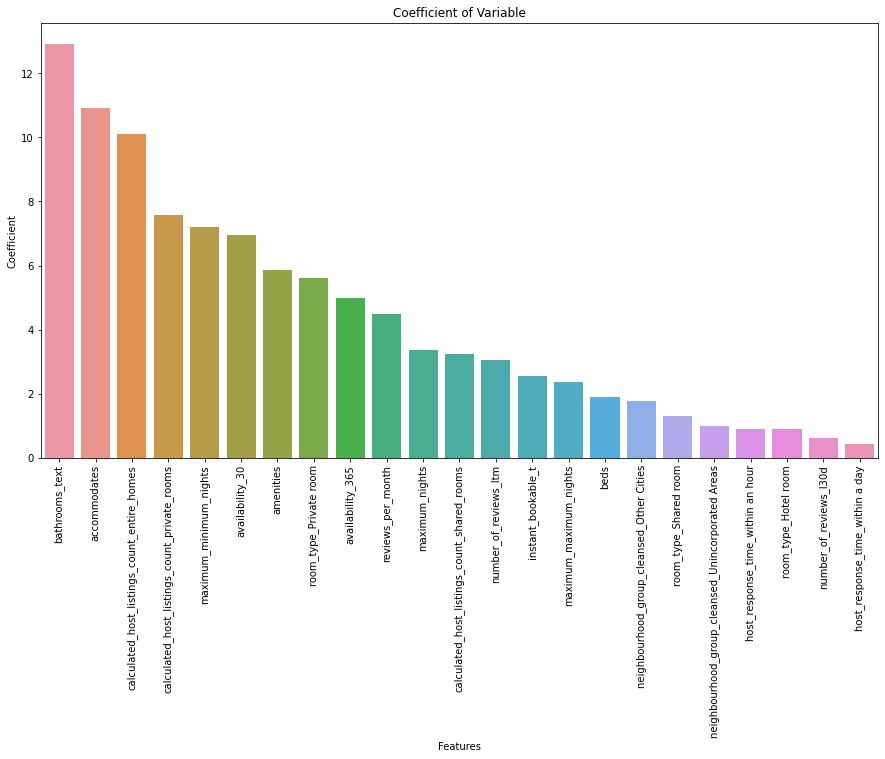

In [494]:
# Plotting the buisness importance of each variable

plt.figure(figsize=(15,8))
sns.barplot(data=df_feature,x='Features',y='Coefficient')
plt.title('Coefficient of Variable')
plt.xticks(rotation=90)
plt.savefig('1.png')
plt.show()

#### Cross Validation

In [488]:
# Decalring X and y

X = df_final[back_best]
y=df_final['price_PT']

In [495]:
cv=KFold(n_splits=5)
score=cross_val_score(estimator=cat_best,X=X,y=y,cv=cv,scoring='r2',n_jobs=-1)
print("Mean Score : ",np.mean(score))
print("Bias error : ",(1-np.mean(score))*100) 
print("Variance error : ",(np.std(score)/np.mean(score))*100,'\n')

Mean Score :  0.686833741595677
Bias error :  31.316625840432298
Variance error :  7.103604294714113 

